In [553]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import svm
from sklearn import model_selection
from sklearn import metrics
import math
import statistics

In [554]:
df = pd.read_csv("HurstExp.csv")
row_labels = df.get('MSID').values
df = df.drop(['MSID'], axis=1)
column_labels = df.columns.values

df = pd.DataFrame(data=df.values, index=row_labels, columns=column_labels)
df.head()


Left-Cerebellum-Cortex  Left-Thalamus-Proper  Left-Caudate  \
MS0001_20190107                0.721914              0.819444      0.874553   
MS0040_20180727                1.014587              1.124041      0.675102   
MS0046_20170614                0.905897              0.622727      0.821756   
MS0084_20171213                0.876768              1.064937      0.538211   
MS0087_20180822                0.882428              0.913203      0.990005   

                 Left-Putamen  Left-Pallidum  Left-Hippocampus  Left-Amygdala  \
MS0001_20190107      0.523449       0.672452          0.843963       0.871057   
MS0040_20180727      0.961736       1.122655          0.975431       0.599850   
MS0046_20170614      0.812483       0.647605          0.661367       0.787013   
MS0084_20171213      0.861743       0.895148          0.988784       0.954015   
MS0087_20180822      0.561911       0.745068          1.092247       0.747737   

                 Left-Accumbens-area  Left-VentralDC  Right-Cerebellum-Cortex  \
MS0001_20190107             0.785603        0.557484                 0.806224   
MS0040_20180727             0.890772        0.833252                 1.056401   
MS0046_20170614             0.652138        0.674354                 1.026209   
MS0084_20171213             1.243769        0.794158                 0.709511   
MS0087_20180822             0.870169        0.713600                 0.962238   

                 ...  ctx-rh-rostralmiddlefrontal  ctx-rh-superiorfrontal  \
MS0001_20190107  ...                     0.835764                0.818610   
MS0040_20180727  ...                     0.683431                0.563977   
MS0046_20170614  ...                     0.910195                0.821902   
MS0084_20171213  ...                     0.917100                0.797456   
MS0087_20180822  ...                     0.961791                0.706221   

                 ctx-rh-superiorparietal  ctx-rh-superiortemporal  \
MS0001_20190107                 0.688931                 0.866469   
MS0040_20180727                 0.690230                 0.874901   
MS0046_20170614                 0.876995                 0.668614   
MS0084_20171213                 0.598483                 1.202654   
MS0087_20180822                 1.085126                 0.800457   

                 ctx-rh-supramarginal  ctx-rh-frontalpole  \
MS0001_20190107              0.865448            0.823570   
MS0040_20180727              0.654710            0.944056   
MS0046_20170614              0.653504            0.796586   
MS0084_20171213              0.662482            1.030432   
MS0087_20180822              0.770654            0.875797   

                 ctx-rh-temporalpole  ctx-rh-transversetemporal  \
MS0001_20190107             0.955532                   0.893453   
MS0040_20180727             0.838302                   0.772025   
MS0046_20170614             0.810457                   0.638531   
MS0084_20171213             0.835092                   0.577397   
MS0087_20180822             0.661838                   0.692687   

                 ctx-rh-insula  EDSS  
MS0001_20190107       0.801363   0.0  
MS0040_20180727       0.880916   1.0  
MS0046_20170614       0.793825   0.0  
MS0084_20171213       0.590235   1.0  
MS0087_20180822       0.974985   1.5  

[5 rows x 87 columns]

In [555]:
#shuffle and clean up data
EDSS = df['EDSS']
data = df.drop(['EDSS'],axis=1)
data.head()

Left-Cerebellum-Cortex  Left-Thalamus-Proper  Left-Caudate  \
MS0001_20190107                0.721914              0.819444      0.874553   
MS0040_20180727                1.014587              1.124041      0.675102   
MS0046_20170614                0.905897              0.622727      0.821756   
MS0084_20171213                0.876768              1.064937      0.538211   
MS0087_20180822                0.882428              0.913203      0.990005   

                 Left-Putamen  Left-Pallidum  Left-Hippocampus  Left-Amygdala  \
MS0001_20190107      0.523449       0.672452          0.843963       0.871057   
MS0040_20180727      0.961736       1.122655          0.975431       0.599850   
MS0046_20170614      0.812483       0.647605          0.661367       0.787013   
MS0084_20171213      0.861743       0.895148          0.988784       0.954015   
MS0087_20180822      0.561911       0.745068          1.092247       0.747737   

                 Left-Accumbens-area  Left-VentralDC  Right-Cerebellum-Cortex  \
MS0001_20190107             0.785603        0.557484                 0.806224   
MS0040_20180727             0.890772        0.833252                 1.056401   
MS0046_20170614             0.652138        0.674354                 1.026209   
MS0084_20171213             1.243769        0.794158                 0.709511   
MS0087_20180822             0.870169        0.713600                 0.962238   

                 ...  ctx-rh-rostralanteriorcingulate  \
MS0001_20190107  ...                         0.850324   
MS0040_20180727  ...                         1.067692   
MS0046_20170614  ...                         0.913108   
MS0084_20171213  ...                         0.946002   
MS0087_20180822  ...                         0.934941   

                 ctx-rh-rostralmiddlefrontal  ctx-rh-superiorfrontal  \
MS0001_20190107                     0.835764                0.818610   
MS0040_20180727                     0.683431                0.563977   
MS0046_20170614                     0.910195                0.821902   
MS0084_20171213                     0.917100                0.797456   
MS0087_20180822                     0.961791                0.706221   

                 ctx-rh-superiorparietal  ctx-rh-superiortemporal  \
MS0001_20190107                 0.688931                 0.866469   
MS0040_20180727                 0.690230                 0.874901   
MS0046_20170614                 0.876995                 0.668614   
MS0084_20171213                 0.598483                 1.202654   
MS0087_20180822                 1.085126                 0.800457   

                 ctx-rh-supramarginal  ctx-rh-frontalpole  \
MS0001_20190107              0.865448            0.823570   
MS0040_20180727              0.654710            0.944056   
MS0046_20170614              0.653504            0.796586   
MS0084_20171213              0.662482            1.030432   
MS0087_20180822              0.770654            0.875797   

                 ctx-rh-temporalpole  ctx-rh-transversetemporal  ctx-rh-insula  
MS0001_20190107             0.955532                   0.893453       0.801363  
MS0040_20180727             0.838302                   0.772025       0.880916  
MS0046_20170614             0.810457                   0.638531       0.793825  
MS0084_20171213             0.835092                   0.577397       0.590235  
MS0087_20180822             0.661838                   0.692687       0.974985  

[5 rows x 86 columns]

Text(0.5, 1.0, 'Hurst Exponents')

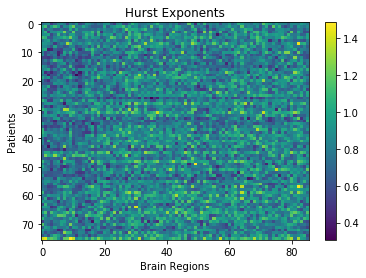

In [556]:
#map of hurst exponents of brain regions
from matplotlib import pyplot as plt
plt.imshow(data, aspect='auto')
plt.colorbar()
plt.xlabel('Brain Regions')
plt.ylabel('Patients')
plt.title('Hurst Exponents')

In [557]:
#categorize EDSS <=1.5 is low, >1.5 is high
n,d = data.shape
for i in range(n):
    if EDSS[i]<=1.5:
        EDSS[i]=0.0
    else:
        EDSS[i]=1.0

In [558]:
print(EDSS)

MS0001_20190107    0.0
MS0040_20180727    0.0
MS0046_20170614    0.0
MS0084_20171213    0.0
MS0087_20180822    0.0
                  ... 
MS1652_20181129    0.0
MS1741_20180316    0.0
MS1858_20181129    0.0
MS1973_20180613    1.0
MS2005_20180922    0.0
Name: EDSS, Length: 76, dtype: float64


In [559]:
#machine laerning starts here

In [560]:
def svm_classify(X_train, y_train, C, gamma, kf, kernel):

    _,d = X_train.shape

    tru = False
    arr = []

    for tr, va in kf.split(X_train, y_train):
        print 
#        print(X_train)
#        #print(tr)
#        x = tr[0]
#        #print(x)
#        print(X_train.iloc[tr,:])
#        X = 
#        m = len(tr)
#        n = len(va)
        X = X_train.iloc[tr, :]
        y = y_train.iloc[tr]
        Xval = X_train.iloc[va, :]
        yval = y_train.iloc[va]
      #  print(X)
      #  print(y)
#        X = np.zeros((m,d))
#        y = []
#        Xval = np.zeros((n,d))
#        yval = []
#        for i in range(len(tr)):
#            X[i] = X_train[[tr[i]]]
#            y.append(y_train[tr[i]])
#            
#       print(X)
#           
#        for i in range(len(va)):
#            Xval[i] = X_train[va[i]]
#            yval.append(y_train[tr[i]])

        for i in range(len(C)):
            for j in range(len(gamma)):
                arr2 = [0,0,[]]
                lsvm = svm.SVC(C=C[i], kernel=kernel, gamma=gamma[j], probability=True)
                lsvm.fit(X,y)
            
                pred_scores = lsvm.predict_proba(Xval)
                auc = metrics.roc_auc_score(yval, pred_scores[:,1], average=None)
                print(yval)
                print(pred_scores)
                print(auc)
                if tru:
                    arr[i*len(gamma)+j][2].append(auc)
                else:
                    arr2[0] = C[i]
                    arr2[1] = gamma[j]
                    arr2[2].append(auc)
                    arr.append(arr2)
        tru = True
        
    return arr
    

In [549]:
def find_hp(arr):
    means = np.zeros(len(arr))
    for i in range(len(arr)):
        means[i] = np.mean(arr[i][2])
    argmax = np.argmax(means)
    bestC = arr[argmax][0]
    best_gamma = arr[argmax][1]
    return bestC, best_gamma

In [550]:
def final_class(X_train, y_train, X_test, y_test, bestC, best_gamma, kernel):
    lsvm = svm.SVC(C=bestC, kernel=kernel, gamma=best_gamma, probability=True)
    #lsvm = svm.LinearSVC(C=bestC, probability=True)
    lsvm.fit(X_train,y_train)
    pred = lsvm.predict_proba(X_test)
    auc = metrics.roc_auc_score(y_test, pred[:,1], average=None)
    return [bestC, best_gamma, auc]

In [571]:
#machine learning starts here
C = []
gamma = []
for i in range(-5,6):
    C.append(10**i)
    gamma.append(10**i)

k='rbf'
all_auc = []

for p in range(5):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(data, EDSS, stratify=EDSS, test_size=0.2)
    kf = model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=17)
    arr = svm_classify(X_train, y_train, C, gamma, kf, k)
    bestC, best_gamma = find_hp(arr)
    one = final_class(X_train, y_train, X_test, y_test, bestC, best_gamma, k)
    all_auc.append(one)


MS0159_20180202    1.0
MS1194_20180323    0.0
MS0517_20180803    1.0
MS0084_20171213    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1614_20180328    0.0
MS0204_20181120    1.0
MS1361_20180618    0.0
MS1292_20180627    0.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0.70068386 0.29931614]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068387 0.29931613]
 [0.70068386 0.29931614]
 [0.70068387 0.29931613]
 [0.70068388 0.29931612]
 [0.70068388 0.29931612]
 [0.70068387 0.29931613]
 [0.70068386 0.29931614]]
0.7777777777777779
MS0159_20180202    1.0
MS1194_20180323    0.0
MS0517_20180803    1.0
MS0084_20171213    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1614_20180328    0.0
MS0204_20181120    1.0
MS1361_20180618    0.0
MS1292_20180627    0.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0

MS0159_20180202    1.0
MS1194_20180323    0.0
MS0517_20180803    1.0
MS0084_20171213    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1614_20180328    0.0
MS0204_20181120    1.0
MS1361_20180618    0.0
MS1292_20180627    0.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0.66004488 0.33995512]
 [0.69800774 0.30199226]
 [0.70289052 0.29710948]
 [0.68654457 0.31345543]
 [0.66261202 0.33738798]
 [0.68676286 0.31323714]
 [0.67100527 0.32899473]
 [0.68020632 0.31979368]
 [0.69719171 0.30280829]
 [0.72147656 0.27852344]
 [0.73748972 0.26251028]
 [0.7149737  0.2850263 ]
 [0.71284104 0.28715896]]
0.6111111111111112
MS0159_20180202    1.0
MS1194_20180323    0.0
MS0517_20180803    1.0
MS0084_20171213    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1614_20180328    0.0
MS0204_20181120    1.0
MS1361_20180618    0.0
MS1292_20180627    0.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0

MS0159_20180202    1.0
MS1194_20180323    0.0
MS0517_20180803    1.0
MS0084_20171213    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1614_20180328    0.0
MS0204_20181120    1.0
MS1361_20180618    0.0
MS1292_20180627    0.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0.6096154  0.3903846 ]
 [0.76906272 0.23093728]
 [0.68369113 0.31630887]
 [0.66064127 0.33935873]
 [0.63789011 0.36210989]
 [0.69413311 0.30586689]
 [0.66607876 0.33392124]
 [0.6811913  0.3188087 ]
 [0.69748505 0.30251495]
 [0.69953344 0.30046656]
 [0.80004702 0.19995298]
 [0.77804421 0.22195579]
 [0.77868532 0.22131468]]
0.6111111111111112
MS0159_20180202    1.0
MS1194_20180323    0.0
MS0517_20180803    1.0
MS0084_20171213    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1614_20180328    0.0
MS0204_20181120    1.0
MS1361_20180618    0.0
MS1292_20180627    0.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0

MS0159_20180202    1.0
MS1194_20180323    0.0
MS0517_20180803    1.0
MS0084_20171213    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1614_20180328    0.0
MS0204_20181120    1.0
MS1361_20180618    0.0
MS1292_20180627    0.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0.6226121  0.3773879 ]
 [0.73781618 0.26218382]
 [0.67764756 0.32235244]
 [0.66027263 0.33972737]
 [0.64426032 0.35573968]
 [0.68361282 0.31638718]
 [0.66277918 0.33722082]
 [0.67032987 0.32967013]
 [0.68776475 0.31223525]
 [0.69205355 0.30794645]
 [0.7671053  0.2328947 ]
 [0.74268096 0.25731904]
 [0.74329291 0.25670709]]
0.6111111111111112
MS0159_20180202    1.0
MS1194_20180323    0.0
MS0517_20180803    1.0
MS0084_20171213    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1614_20180328    0.0
MS0204_20181120    1.0
MS1361_20180618    0.0
MS1292_20180627    0.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0

MS0159_20180202    1.0
MS1194_20180323    0.0
MS0517_20180803    1.0
MS0084_20171213    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1614_20180328    0.0
MS0204_20181120    1.0
MS1361_20180618    0.0
MS1292_20180627    0.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0.58463233 0.41536767]
 [0.77554696 0.22445304]
 [0.6781427  0.3218573 ]
 [0.65108112 0.34891888]
 [0.62313145 0.37686855]
 [0.68821591 0.31178409]
 [0.65540373 0.34459627]
 [0.66833279 0.33166721]
 [0.69518313 0.30481687]
 [0.70233957 0.29766043]
 [0.81859028 0.18140972]
 [0.78292792 0.21707208]
 [0.78385018 0.21614982]]
0.6111111111111112
MS0159_20180202    1.0
MS1194_20180323    0.0
MS0517_20180803    1.0
MS0084_20171213    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1614_20180328    0.0
MS0204_20181120    1.0
MS1361_20180618    0.0
MS1292_20180627    0.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0

MS0288_20180615    0.0
MS0683_20170618    0.0
MS1125_20180606    1.0
MS0662_20180525    1.0
MS1022_20180308    0.0
MS1081_20181017    0.0
MS0266_20180212    1.0
MS1304_20180529    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS0853_20180718    0.0
MS1143_20190222    1.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.70068553 0.29931447]
 [0.70068726 0.29931274]
 [0.70068513 0.29931487]
 [0.70068696 0.29931304]
 [0.70068289 0.29931711]
 [0.70068737 0.29931263]
 [0.70068856 0.29931144]
 [0.70068048 0.29931952]
 [0.70068607 0.29931393]
 [0.70068616 0.29931384]
 [0.70068388 0.29931612]
 [0.70068517 0.29931483]
 [0.70068542 0.29931458]]
0.3888888888888889
MS0288_20180615    0.0
MS0683_20170618    0.0
MS1125_20180606    1.0
MS0662_20180525    1.0
MS1022_20180308    0.0
MS1081_20181017    0.0
MS0266_20180212    1.0
MS1304_20180529    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS0853_20180718    0.0
MS1143_20190222    1.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0288_20180615    0.0
MS0683_20170618    0.0
MS1125_20180606    1.0
MS0662_20180525    1.0
MS1022_20180308    0.0
MS1081_20181017    0.0
MS0266_20180212    1.0
MS1304_20180529    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS0853_20180718    0.0
MS1143_20190222    1.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]]
0.2777777777777778
MS0288_20180615    0.0
MS0683_20170618    0.0
MS1125_20180606    1.0
MS0662_20180525    1.0
MS1022_20180308    0.0
MS1081_20181017    0.0
MS0266_20180212    1.0
MS1304_20180529    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS0853_20180718    0.0
MS1143_20190222    1.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0288_20180615    0.0
MS0683_20170618    0.0
MS1125_20180606    1.0
MS0662_20180525    1.0
MS1022_20180308    0.0
MS1081_20181017    0.0
MS0266_20180212    1.0
MS1304_20180529    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS0853_20180718    0.0
MS1143_20190222    1.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.73329147 0.26670853]
 [0.77874248 0.22125752]
 [0.70140595 0.29859405]
 [0.79426506 0.20573494]
 [0.69003221 0.30996779]
 [0.70987853 0.29012147]
 [0.82785204 0.17214796]
 [0.63811207 0.36188793]
 [0.7574579  0.2425421 ]
 [0.68833105 0.31166895]
 [0.59940613 0.40059387]
 [0.68022419 0.31977581]
 [0.70169856 0.29830144]]
0.33333333333333337
MS0288_20180615    0.0
MS0683_20170618    0.0
MS1125_20180606    1.0
MS0662_20180525    1.0
MS1022_20180308    0.0
MS1081_20181017    0.0
MS0266_20180212    1.0
MS1304_20180529    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS0853_20180718    0.0
MS1143_20190222    1.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[

MS0288_20180615    0.0
MS0683_20170618    0.0
MS1125_20180606    1.0
MS0662_20180525    1.0
MS1022_20180308    0.0
MS1081_20181017    0.0
MS0266_20180212    1.0
MS1304_20180529    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS0853_20180718    0.0
MS1143_20190222    1.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.86598896 0.13401104]
 [0.94449711 0.05550289]
 [0.83641902 0.16358098]
 [0.9372476  0.0627524 ]
 [0.58076043 0.41923957]
 [0.94794035 0.05205965]
 [0.97372579 0.02627421]
 [0.25295304 0.74704696]
 [0.89847301 0.10152699]
 [0.90351239 0.09648761]
 [0.7118301  0.2881699 ]
 [0.83950075 0.16049925]
 [0.85881641 0.14118359]]
0.3888888888888889
MS0288_20180615    0.0
MS0683_20170618    0.0
MS1125_20180606    1.0
MS0662_20180525    1.0
MS1022_20180308    0.0
MS1081_20181017    0.0
MS0266_20180212    1.0
MS1304_20180529    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS0853_20180718    0.0
MS1143_20190222    1.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0288_20180615    0.0
MS0683_20170618    0.0
MS1125_20180606    1.0
MS0662_20180525    1.0
MS1022_20180308    0.0
MS1081_20181017    0.0
MS0266_20180212    1.0
MS1304_20180529    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS0853_20180718    0.0
MS1143_20190222    1.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.70221748 0.29778252]
 [0.70221748 0.29778252]
 [0.70221748 0.29778252]
 [0.70221748 0.29778252]
 [0.70221748 0.29778252]
 [0.70221748 0.29778252]
 [0.70221748 0.29778252]
 [0.70221748 0.29778252]
 [0.70221748 0.29778252]
 [0.70221748 0.29778252]
 [0.70221748 0.29778252]
 [0.70221748 0.29778252]
 [0.70221748 0.29778252]]
0.5
MS0288_20180615    0.0
MS0683_20170618    0.0
MS1125_20180606    1.0
MS0662_20180525    1.0
MS1022_20180308    0.0
MS1081_20181017    0.0
MS0266_20180212    1.0
MS1304_20180529    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS0853_20180718    0.0
MS1143_20190222    1.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.7188706 0.2811

MS0771_20180421    0.0
MS0105_20170927    1.0
MS1311_20180608    0.0
MS2005_20180922    0.0
MS0422_20170708    0.0
MS1741_20180316    0.0
MS0657_20180724    0.0
MS1291_20180615    1.0
MS0040_20180727    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0.70688658 0.29311342]
 [0.70688658 0.29311342]
 [0.70688658 0.29311342]
 [0.70688658 0.29311342]
 [0.70688658 0.29311342]
 [0.70688658 0.29311342]
 [0.70688658 0.29311342]
 [0.70688658 0.29311342]
 [0.70688658 0.29311342]
 [0.70688658 0.29311342]
 [0.70688658 0.29311342]
 [0.70688658 0.29311342]]
0.5
MS0771_20180421    0.0
MS0105_20170927    1.0
MS1311_20180608    0.0
MS2005_20180922    0.0
MS0422_20170708    0.0
MS1741_20180316    0.0
MS0657_20180724    0.0
MS1291_20180615    1.0
MS0040_20180727    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0.70688658 0.29311342]
 [0.70688658 0.29311342]
 [0.70688658 0.29311342]
 [0.70688658 0

MS0771_20180421    0.0
MS0105_20170927    1.0
MS1311_20180608    0.0
MS2005_20180922    0.0
MS0422_20170708    0.0
MS1741_20180316    0.0
MS0657_20180724    0.0
MS1291_20180615    1.0
MS0040_20180727    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0.70742071 0.29257929]
 [0.70729425 0.29270575]
 [0.70619515 0.29380485]
 [0.7051419  0.2948581 ]
 [0.70736435 0.29263565]
 [0.70632418 0.29367582]
 [0.70839956 0.29160044]
 [0.70585155 0.29414845]
 [0.7070741  0.2929259 ]
 [0.70675437 0.29324563]
 [0.7090272  0.2909728 ]
 [0.70506735 0.29493265]]
0.75
MS0771_20180421    0.0
MS0105_20170927    1.0
MS1311_20180608    0.0
MS2005_20180922    0.0
MS0422_20170708    0.0
MS1741_20180316    0.0
MS0657_20180724    0.0
MS1291_20180615    1.0
MS0040_20180727    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0.70603954 0.29396046]
 [0.70946623 0.29053377]
 [0.65736865 0.34263135]
 [0.5943134  

 [0.71733118 0.28266882]]
0.0625
MS0771_20180421    0.0
MS0105_20170927    1.0
MS1311_20180608    0.0
MS2005_20180922    0.0
MS0422_20170708    0.0
MS1741_20180316    0.0
MS0657_20180724    0.0
MS1291_20180615    1.0
MS0040_20180727    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0.71729821 0.28270179]
 [0.71729821 0.28270179]
 [0.71729821 0.28270179]
 [0.71729821 0.28270179]
 [0.71729821 0.28270179]
 [0.71729821 0.28270179]
 [0.71729821 0.28270179]
 [0.71729821 0.28270179]
 [0.71729821 0.28270179]
 [0.71729821 0.28270179]
 [0.71729821 0.28270179]
 [0.71729821 0.28270179]]
0.90625
MS0771_20180421    0.0
MS0105_20170927    1.0
MS1311_20180608    0.0
MS2005_20180922    0.0
MS0422_20170708    0.0
MS1741_20180316    0.0
MS0657_20180724    0.0
MS1291_20180615    1.0
MS0040_20180727    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0.74769066 0.25230934]
 [0.74769066 0.25230934]
 [

MS0771_20180421    0.0
MS0105_20170927    1.0
MS1311_20180608    0.0
MS2005_20180922    0.0
MS0422_20170708    0.0
MS1741_20180316    0.0
MS0657_20180724    0.0
MS1291_20180615    1.0
MS0040_20180727    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0.7421531 0.2578469]
 [0.7421531 0.2578469]
 [0.7421531 0.2578469]
 [0.7421531 0.2578469]
 [0.7421531 0.2578469]
 [0.7421531 0.2578469]
 [0.7421531 0.2578469]
 [0.7421531 0.2578469]
 [0.7421531 0.2578469]
 [0.7421531 0.2578469]
 [0.7421531 0.2578469]
 [0.7421531 0.2578469]]
0.5
MS0771_20180421    0.0
MS0105_20170927    1.0
MS1311_20180608    0.0
MS2005_20180922    0.0
MS0422_20170708    0.0
MS1741_20180316    0.0
MS0657_20180724    0.0
MS1291_20180615    1.0
MS0040_20180727    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0.75432963 0.24567037]
 [0.75432963 0.24567037]
 [0.75432963 0.24567037]
 [0.75432963 0.24567037]
 [0.75432963 

MS0771_20180421    0.0
MS0105_20170927    1.0
MS1311_20180608    0.0
MS2005_20180922    0.0
MS0422_20170708    0.0
MS1741_20180316    0.0
MS0657_20180724    0.0
MS1291_20180615    1.0
MS0040_20180727    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0.70608505 0.29391495]
 [0.67193419 0.32806581]
 [0.63391982 0.36608018]
 [0.68653551 0.31346449]
 [0.74948862 0.25051138]
 [0.63779214 0.36220786]
 [0.78198808 0.21801192]
 [0.60730847 0.39269153]
 [0.70891593 0.29108407]
 [0.69096431 0.30903569]
 [0.76394231 0.23605769]
 [0.46150128 0.53849872]]
0.84375
MS0771_20180421    0.0
MS0105_20170927    1.0
MS1311_20180608    0.0
MS2005_20180922    0.0
MS0422_20170708    0.0
MS1741_20180316    0.0
MS0657_20180724    0.0
MS1291_20180615    1.0
MS0040_20180727    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0.7013684  0.2986316 ]
 [0.68167785 0.31832215]
 [0.65207765 0.34792235]
 [0.697841

MS0087_20180822    0.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0967_20180203    0.0
MS0046_20170614    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0762_20180328    0.0
MS0531_20190220    0.0
MS1502_20190227    1.0
MS0190_20180606    0.0
Name: EDSS, dtype: float64
[[0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]]
0.5
MS0087_20180822    0.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0967_20180203    0.0
MS0046_20170614    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0762_20180328    0.0
MS0531_20190220    0.0
MS1502_20190227    1.0
MS0190_20180606    0.0
Name: EDSS, dtype: float64
[[0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896

MS0087_20180822    0.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0967_20180203    0.0
MS0046_20170614    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0762_20180328    0.0
MS0531_20190220    0.0
MS1502_20190227    1.0
MS0190_20180606    0.0
Name: EDSS, dtype: float64
[[0.67704559 0.32295441]
 [0.66829105 0.33170895]
 [0.73514534 0.26485466]
 [0.75408959 0.24591041]
 [0.73806436 0.26193564]
 [0.86985256 0.13014744]
 [0.69891594 0.30108406]
 [0.53137722 0.46862278]
 [0.73819265 0.26180735]
 [0.70394499 0.29605501]
 [0.75040777 0.24959223]]
0.3333333333333333
MS0087_20180822    0.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0967_20180203    0.0
MS0046_20170614    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0762_20180328    0.0
MS0531_20190220    0.0
MS1502_20190227    1.0
MS0190_20180606    0.0
Name: EDSS, dtype: float64
[[0.70766769 0.29233231]
 [0.70766769 0.29233231]
 [0.70766769 0.29233231]
 [0.70766769 0.29233231]
 [0.70766769 0.29233231]
 [0.70766769 0.29233

MS0087_20180822    0.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0967_20180203    0.0
MS0046_20170614    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0762_20180328    0.0
MS0531_20190220    0.0
MS1502_20190227    1.0
MS0190_20180606    0.0
Name: EDSS, dtype: float64
[[0.70110362 0.29889638]
 [0.70110362 0.29889638]
 [0.70110362 0.29889638]
 [0.70110362 0.29889638]
 [0.70110362 0.29889638]
 [0.70110362 0.29889638]
 [0.70110362 0.29889638]
 [0.70110362 0.29889638]
 [0.70110362 0.29889638]
 [0.70110362 0.29889638]
 [0.70110362 0.29889638]]
0.5
MS0087_20180822    0.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0967_20180203    0.0
MS0046_20170614    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0762_20180328    0.0
MS0531_20190220    0.0
MS1502_20190227    1.0
MS0190_20180606    0.0
Name: EDSS, dtype: float64
[[0.80962392 0.19037608]
 [0.51887661 0.48112339]
 [0.87346021 0.12653979]
 [0.71842828 0.28157172]
 [0.78296108 0.21703892]
 [0.88304236 0.11695764]
 [0.606158

MS0087_20180822    0.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0967_20180203    0.0
MS0046_20170614    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0762_20180328    0.0
MS0531_20190220    0.0
MS1502_20190227    1.0
MS0190_20180606    0.0
Name: EDSS, dtype: float64
[[0.73938368 0.26061632]
 [0.55116154 0.44883846]
 [0.75983043 0.24016957]
 [0.71031021 0.28968979]
 [0.74118233 0.25881767]
 [0.7904269  0.2095731 ]
 [0.60169364 0.39830636]
 [0.63846468 0.36153532]
 [0.75025942 0.24974058]
 [0.73681146 0.26318854]
 [0.78392046 0.21607954]]
0.20833333333333331
MS0087_20180822    0.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0967_20180203    0.0
MS0046_20170614    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0762_20180328    0.0
MS0531_20190220    0.0
MS1502_20190227    1.0
MS0190_20180606    0.0
Name: EDSS, dtype: float64
[[0.86880371 0.13119629]
 [0.35155743 0.64844257]
 [0.82525624 0.17474376]
 [0.72603013 0.27396987]
 [0.78432782 0.21567218]
 [0.85266555 0.1473

MS0087_20180822    0.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0967_20180203    0.0
MS0046_20170614    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0762_20180328    0.0
MS0531_20190220    0.0
MS1502_20190227    1.0
MS0190_20180606    0.0
Name: EDSS, dtype: float64
[[0.86313599 0.13686401]
 [0.39266707 0.60733293]
 [0.82392521 0.17607479]
 [0.73307467 0.26692533]
 [0.78500314 0.21499686]
 [0.84790971 0.15209029]
 [0.56989103 0.43010897]
 [0.55367758 0.44632242]
 [0.75949953 0.24050047]
 [0.81716239 0.18283761]
 [0.86235891 0.13764109]]
0.25
MS0087_20180822    0.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0967_20180203    0.0
MS0046_20170614    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0762_20180328    0.0
MS0531_20190220    0.0
MS1502_20190227    1.0
MS0190_20180606    0.0
Name: EDSS, dtype: float64
[[0.80637581 0.19362419]
 [0.60224305 0.39775695]
 [0.7635016  0.2364984 ]
 [0.70193232 0.29806768]
 [0.73318849 0.26681151]
 [0.76495389 0.23504611]
 [0.65836

MS1652_20181129    0.0
MS1858_20181129    0.0
MS0101_20190109    0.0
MS0921_20180912    0.0
MS0623_20180110    0.0
MS1405_20180530    0.0
MS0949_20180915    0.0
MS0618_20180711    1.0
MS0597_20170806    1.0
MS0514_20180608    1.0
MS0448_20180302    0.0
Name: EDSS, dtype: float64
[[0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]]
0.5
MS1652_20181129    0.0
MS1858_20181129    0.0
MS0101_20190109    0.0
MS0921_20180912    0.0
MS0623_20180110    0.0
MS1405_20180530    0.0
MS0949_20180915    0.0
MS0618_20180711    1.0
MS0597_20170806    1.0
MS0514_20180608    1.0
MS0448_20180302    0.0
Name: EDSS, dtype: float64
[[0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.692610

MS1652_20181129    0.0
MS1858_20181129    0.0
MS0101_20190109    0.0
MS0921_20180912    0.0
MS0623_20180110    0.0
MS1405_20180530    0.0
MS0949_20180915    0.0
MS0618_20180711    1.0
MS0597_20170806    1.0
MS0514_20180608    1.0
MS0448_20180302    0.0
Name: EDSS, dtype: float64
[[0.7266157  0.2733843 ]
 [0.72149895 0.27850105]
 [0.61390389 0.38609611]
 [0.5745114  0.4254886 ]
 [0.69198214 0.30801786]
 [0.54268579 0.45731421]
 [0.71850204 0.28149796]
 [0.54886375 0.45113625]
 [0.64886774 0.35113226]
 [0.72546951 0.27453049]
 [0.73363791 0.26636209]]
0.5833333333333333
MS1652_20181129    0.0
MS1858_20181129    0.0
MS0101_20190109    0.0
MS0921_20180912    0.0
MS0623_20180110    0.0
MS1405_20180530    0.0
MS0949_20180915    0.0
MS0618_20180711    1.0
MS0597_20170806    1.0
MS0514_20180608    1.0
MS0448_20180302    0.0
Name: EDSS, dtype: float64
[[0.71982954 0.28017046]
 [0.71490832 0.28509168]
 [0.61218739 0.38781261]
 [0.57480895 0.42519105]
 [0.68658949 0.31341051]
 [0.54467518 0.45532

MS1652_20181129    0.0
MS1858_20181129    0.0
MS0101_20190109    0.0
MS0921_20180912    0.0
MS0623_20180110    0.0
MS1405_20180530    0.0
MS0949_20180915    0.0
MS0618_20180711    1.0
MS0597_20170806    1.0
MS0514_20180608    1.0
MS0448_20180302    0.0
Name: EDSS, dtype: float64
[[0.69724648 0.30275352]
 [0.68753164 0.31246836]
 [0.67975448 0.32024552]
 [0.67805522 0.32194478]
 [0.69195789 0.30804211]
 [0.68126073 0.31873927]
 [0.69293612 0.30706388]
 [0.66956268 0.33043732]
 [0.68540669 0.31459331]
 [0.69599285 0.30400715]
 [0.69083811 0.30916189]]
0.5833333333333333
MS1652_20181129    0.0
MS1858_20181129    0.0
MS0101_20190109    0.0
MS0921_20180912    0.0
MS0623_20180110    0.0
MS1405_20180530    0.0
MS0949_20180915    0.0
MS0618_20180711    1.0
MS0597_20170806    1.0
MS0514_20180608    1.0
MS0448_20180302    0.0
Name: EDSS, dtype: float64
[[0.7512668  0.2487332 ]
 [0.65634544 0.34365456]
 [0.63910413 0.36089587]
 [0.58534538 0.41465462]
 [0.72615486 0.27384514]
 [0.68228616 0.31771

MS0771_20180421    0.0
MS1652_20181129    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1125_20180606    1.0
MS1022_20180308    0.0
MS0084_20171213    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
MS0500_20180729    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0.70054283 0.29945717]
 [0.70144319 0.29855681]
 [0.70042147 0.29957853]
 [0.70154483 0.29845517]
 [0.70072052 0.29927948]
 [0.70148065 0.29851935]
 [0.7018801  0.2981199 ]
 [0.70078011 0.29921989]
 [0.70090825 0.29909175]
 [0.70202218 0.29797782]
 [0.70175549 0.29824451]
 [0.70136993 0.29863007]
 [0.70029073 0.29970927]]
0.6666666666666667
MS0771_20180421    0.0
MS1652_20181129    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1125_20180606    1.0
MS1022_20180308    0.0
MS0084_20171213    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
MS0500_20180729    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0

MS0771_20180421    0.0
MS1652_20181129    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1125_20180606    1.0
MS1022_20180308    0.0
MS0084_20171213    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
MS0500_20180729    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0.6704393  0.3295607 ]
 [0.73351142 0.26648858]
 [0.66247592 0.33752408]
 [0.73983998 0.26016002]
 [0.68624211 0.31375789]
 [0.73580493 0.26419507]
 [0.75988453 0.24011547]
 [0.69008691 0.30991309]
 [0.69907217 0.30092783]
 [0.76803728 0.23196272]
 [0.75253735 0.24746265]
 [0.72902909 0.27097091]
 [0.65356924 0.34643076]]
0.6666666666666667
MS0771_20180421    0.0
MS1652_20181129    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1125_20180606    1.0
MS1022_20180308    0.0
MS0084_20171213    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
MS0500_20180729    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0

MS0771_20180421    0.0
MS1652_20181129    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1125_20180606    1.0
MS1022_20180308    0.0
MS0084_20171213    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
MS0500_20180729    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0.61878721 0.38121279]
 [0.72087168 0.27912832]
 [0.64126889 0.35873111]
 [0.77885121 0.22114879]
 [0.69966423 0.30033577]
 [0.76832997 0.23167003]
 [0.66446249 0.33553751]
 [0.64089542 0.35910458]
 [0.66240366 0.33759634]
 [0.73972347 0.26027653]
 [0.71627361 0.28372639]
 [0.78131302 0.21868698]
 [0.5577538  0.4422462 ]]
0.6944444444444444
MS0771_20180421    0.0
MS1652_20181129    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1125_20180606    1.0
MS1022_20180308    0.0
MS0084_20171213    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
MS0500_20180729    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0

MS0771_20180421    0.0
MS1652_20181129    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1125_20180606    1.0
MS1022_20180308    0.0
MS0084_20171213    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
MS0500_20180729    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0.61005959 0.38994041]
 [0.72731493 0.27268507]
 [0.63895087 0.36104913]
 [0.78975278 0.21024722]
 [0.68260404 0.31739596]
 [0.78307614 0.21692386]
 [0.6832823  0.3167177 ]
 [0.66589701 0.33410299]
 [0.67226017 0.32773983]
 [0.74785988 0.25214012]
 [0.72566262 0.27433738]
 [0.80990856 0.19009144]
 [0.51040057 0.48959943]]
0.7222222222222222
MS0771_20180421    0.0
MS1652_20181129    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1125_20180606    1.0
MS1022_20180308    0.0
MS0084_20171213    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
MS0500_20180729    0.0
MS0428_20170725    1.0
MS0877_20180615    0.0
MS1024_20180208    1.0
Name: EDSS, dtype: float64
[[0

MS0105_20170927    1.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0288_20180615    0.0
MS0278_20180420    0.0
MS0949_20180915    0.0
MS0040_20180727    0.0
MS1292_20180627    0.0
MS1143_20190222    1.0
MS0597_20170806    1.0
MS0448_20180302    0.0
MS0190_20180606    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.70068715 0.29931285]
 [0.7006843  0.2993157 ]
 [0.70068975 0.29931025]
 [0.70069145 0.29930855]
 [0.70068874 0.29931126]
 [0.70068879 0.29931121]
 [0.70068616 0.29931384]
 [0.70068665 0.29931335]
 [0.70068767 0.29931233]
 [0.70068484 0.29931516]
 [0.70068739 0.29931261]
 [0.70069243 0.29930757]
 [0.70068825 0.29931175]]
0.5833333333333334
MS0105_20170927    1.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0288_20180615    0.0
MS0278_20180420    0.0
MS0949_20180915    0.0
MS0040_20180727    0.0
MS1292_20180627    0.0
MS1143_20190222    1.0
MS0597_20170806    1.0
MS0448_20180302    0.0
MS0190_20180606    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0105_20170927    1.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0288_20180615    0.0
MS0278_20180420    0.0
MS0949_20180915    0.0
MS0040_20180727    0.0
MS1292_20180627    0.0
MS1143_20190222    1.0
MS0597_20170806    1.0
MS0448_20180302    0.0
MS0190_20180606    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.71089785 0.28910215]
 [0.71089785 0.28910215]
 [0.71089785 0.28910215]
 [0.71089785 0.28910215]
 [0.71089785 0.28910215]
 [0.71089785 0.28910215]
 [0.71089785 0.28910215]
 [0.71089785 0.28910215]
 [0.71089785 0.28910215]
 [0.71089785 0.28910215]
 [0.71089785 0.28910215]
 [0.71089785 0.28910215]
 [0.71089785 0.28910215]]
0.5
MS0105_20170927    1.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0288_20180615    0.0
MS0278_20180420    0.0
MS0949_20180915    0.0
MS0040_20180727    0.0
MS1292_20180627    0.0
MS1143_20190222    1.0
MS0597_20170806    1.0
MS0448_20180302    0.0
MS0190_20180606    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.70279009 0.297

MS0105_20170927    1.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0288_20180615    0.0
MS0278_20180420    0.0
MS0949_20180915    0.0
MS0040_20180727    0.0
MS1292_20180627    0.0
MS1143_20190222    1.0
MS0597_20170806    1.0
MS0448_20180302    0.0
MS0190_20180606    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.72903555 0.27096445]
 [0.72903555 0.27096445]
 [0.72903555 0.27096445]
 [0.72903555 0.27096445]
 [0.72903555 0.27096445]
 [0.72903555 0.27096445]
 [0.72903555 0.27096445]
 [0.72903555 0.27096445]
 [0.72903555 0.27096445]
 [0.72903555 0.27096445]
 [0.72903555 0.27096445]
 [0.72903555 0.27096445]
 [0.72903555 0.27096445]]
0.6527777777777778
MS0105_20170927    1.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0288_20180615    0.0
MS0278_20180420    0.0
MS0949_20180915    0.0
MS0040_20180727    0.0
MS1292_20180627    0.0
MS1143_20190222    1.0
MS0597_20170806    1.0
MS0448_20180302    0.0
MS0190_20180606    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0105_20170927    1.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0288_20180615    0.0
MS0278_20180420    0.0
MS0949_20180915    0.0
MS0040_20180727    0.0
MS1292_20180627    0.0
MS1143_20190222    1.0
MS0597_20170806    1.0
MS0448_20180302    0.0
MS0190_20180606    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.68396103 0.31603897]
 [0.69853249 0.30146751]
 [0.71457931 0.28542069]
 [0.70602164 0.29397836]
 [0.69804414 0.30195586]
 [0.69552812 0.30447188]
 [0.6954689  0.3045311 ]
 [0.70833486 0.29166514]
 [0.70673648 0.29326352]
 [0.69137888 0.30862112]
 [0.69734049 0.30265951]
 [0.71799869 0.28200131]
 [0.69945493 0.30054507]]
0.5833333333333334
MS0105_20170927    1.0
MS1009_20180406    0.0
MS0831_20180609    1.0
MS0288_20180615    0.0
MS0278_20180420    0.0
MS0949_20180915    0.0
MS0040_20180727    0.0
MS1292_20180627    0.0
MS1143_20190222    1.0
MS0597_20170806    1.0
MS0448_20180302    0.0
MS0190_20180606    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS1858_20181129    0.0
MS1194_20180323    0.0
MS0422_20170708    0.0
MS0921_20180912    0.0
MS0662_20180525    1.0
MS0531_20190220    0.0
MS0266_20180212    1.0
MS0657_20180724    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0.66289767 0.33710233]
 [0.69887146 0.30112854]
 [0.648437   0.351563  ]
 [0.65878502 0.34121498]
 [0.75428746 0.24571254]
 [0.74341131 0.25658869]
 [0.70569517 0.29430483]
 [0.7666844  0.2333156 ]
 [0.61404929 0.38595071]
 [0.82271709 0.17728291]
 [0.75457653 0.24542347]
 [0.64355443 0.35644557]]
0.71875
MS1858_20181129    0.0
MS1194_20180323    0.0
MS0422_20170708    0.0
MS0921_20180912    0.0
MS0662_20180525    1.0
MS0531_20190220    0.0
MS0266_20180212    1.0
MS0657_20180724    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0.79423487 0.20576513]
 [0.6461929  0.3538071 ]
 [0.71781737 0.28218263]
 [0.737988

MS1858_20181129    0.0
MS1194_20180323    0.0
MS0422_20170708    0.0
MS0921_20180912    0.0
MS0662_20180525    1.0
MS0531_20190220    0.0
MS0266_20180212    1.0
MS0657_20180724    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0.61833412 0.38166588]
 [0.76452343 0.23547657]
 [0.69617593 0.30382407]
 [0.62417398 0.37582602]
 [0.90568931 0.09431069]
 [0.8482613  0.1517387 ]
 [0.80827024 0.19172976]
 [0.89688345 0.10311655]
 [0.533439   0.466561  ]
 [0.92761204 0.07238796]
 [0.82340753 0.17659247]
 [0.75209471 0.24790529]]
0.5625
MS1858_20181129    0.0
MS1194_20180323    0.0
MS0422_20170708    0.0
MS0921_20180912    0.0
MS0662_20180525    1.0
MS0531_20190220    0.0
MS0266_20180212    1.0
MS0657_20180724    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0.66835066 0.33164934]
 [0.77321093 0.22678907]
 [0.75372688 0.24627312]
 [0.6163478

MS1858_20181129    0.0
MS1194_20180323    0.0
MS0422_20170708    0.0
MS0921_20180912    0.0
MS0662_20180525    1.0
MS0531_20190220    0.0
MS0266_20180212    1.0
MS0657_20180724    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0.67990113 0.32009887]
 [0.77399359 0.22600641]
 [0.72604789 0.27395211]
 [0.51517047 0.48482953]
 [0.93193572 0.06806428]
 [0.81934276 0.18065724]
 [0.87375831 0.12624169]
 [0.95928856 0.04071144]
 [0.26070493 0.73929507]
 [0.9231878  0.0768122 ]
 [0.85547851 0.14452149]
 [0.787516   0.212484  ]]
0.46875
MS1858_20181129    0.0
MS1194_20180323    0.0
MS0422_20170708    0.0
MS0921_20180912    0.0
MS0662_20180525    1.0
MS0531_20190220    0.0
MS0266_20180212    1.0
MS0657_20180724    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0.69890075 0.30109925]
 [0.71171239 0.28828761]
 [0.70661228 0.29338772]
 [0.679653

MS1858_20181129    0.0
MS1194_20180323    0.0
MS0422_20170708    0.0
MS0921_20180912    0.0
MS0662_20180525    1.0
MS0531_20190220    0.0
MS0266_20180212    1.0
MS0657_20180724    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0.69890044 0.30109956]
 [0.76959891 0.23040109]
 [0.7158842  0.2841158 ]
 [0.52939359 0.47060641]
 [0.89220084 0.10779916]
 [0.73711223 0.26288777]
 [0.82365248 0.17634752]
 [0.92595624 0.07404376]
 [0.36557349 0.63442651]
 [0.85450901 0.14549099]
 [0.81104751 0.18895249]
 [0.77426444 0.22573556]]
0.4375
MS1858_20181129    0.0
MS1194_20180323    0.0
MS0422_20170708    0.0
MS0921_20180912    0.0
MS0662_20180525    1.0
MS0531_20190220    0.0
MS0266_20180212    1.0
MS0657_20180724    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1225_20180125    0.0
MS0160_20180601    1.0
Name: EDSS, dtype: float64
[[0.68600246 0.31399754]
 [0.77629013 0.22370987]
 [0.71276028 0.28723972]
 [0.4729128

MS0087_20180822    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0623_20180110    0.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS1291_20180615    1.0
MS1614_20180328    0.0
MS1502_20190227    1.0
MS1361_20180618    0.0
Name: EDSS, dtype: float64
[[0.68381096 0.31618904]
 [0.69258686 0.30741314]
 [0.68606568 0.31393432]
 [0.69549928 0.30450072]
 [0.69882587 0.30117413]
 [0.69631509 0.30368491]
 [0.68843979 0.31156021]
 [0.70077105 0.29922895]
 [0.68532189 0.31467811]
 [0.69805641 0.30194359]
 [0.69171831 0.30828169]]
0.29166666666666663
MS0087_20180822    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0623_20180110    0.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS1291_20180615    1.0
MS1614_20180328    0.0
MS1502_20190227    1.0
MS1361_20180618    0.0
Name: EDSS, dtype: float64
[[0.77835861 0.22164139]
 [0.68878678 0.31121322]
 [0.75731433 0.24268567]
 [0.65514954 0.34485046]
 [0.61459028 0.38540972]
 [0.64500789 0.3549

MS0087_20180822    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0623_20180110    0.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS1291_20180615    1.0
MS1614_20180328    0.0
MS1502_20190227    1.0
MS1361_20180618    0.0
Name: EDSS, dtype: float64
[[0.77883678 0.22116322]
 [0.6829876  0.3170124 ]
 [0.78696005 0.21303995]
 [0.58459341 0.41540659]
 [0.5333551  0.4666449 ]
 [0.65768659 0.34231341]
 [0.75323777 0.24676223]
 [0.4283488  0.5716512 ]
 [0.72611985 0.27388015]
 [0.61359775 0.38640225]
 [0.70370643 0.29629357]]
0.5833333333333334
MS0087_20180822    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0623_20180110    0.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS1291_20180615    1.0
MS1614_20180328    0.0
MS1502_20190227    1.0
MS1361_20180618    0.0
Name: EDSS, dtype: float64
[[0.7403837  0.2596163 ]
 [0.70411205 0.29588795]
 [0.74597794 0.25402206]
 [0.66702908 0.33297092]
 [0.65128162 0.34871838]
 [0.699862   0.30013

MS0087_20180822    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0623_20180110    0.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS1291_20180615    1.0
MS1614_20180328    0.0
MS1502_20190227    1.0
MS1361_20180618    0.0
Name: EDSS, dtype: float64
[[0.70814491 0.29185509]
 [0.70814491 0.29185509]
 [0.70814491 0.29185509]
 [0.70814491 0.29185509]
 [0.70814491 0.29185509]
 [0.70814491 0.29185509]
 [0.70814491 0.29185509]
 [0.70814491 0.29185509]
 [0.70814491 0.29185509]
 [0.70814491 0.29185509]
 [0.70814491 0.29185509]]
0.5
MS0087_20180822    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0623_20180110    0.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS1291_20180615    1.0
MS1614_20180328    0.0
MS1502_20190227    1.0
MS1361_20180618    0.0
Name: EDSS, dtype: float64
[[0.76891628 0.23108372]
 [0.70816032 0.29183968]
 [0.77594699 0.22405301]
 [0.64520662 0.35479338]
 [0.62072048 0.37927952]
 [0.69843226 0.30156774]
 [0.752585

MS0087_20180822    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0623_20180110    0.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS1291_20180615    1.0
MS1614_20180328    0.0
MS1502_20190227    1.0
MS1361_20180618    0.0
Name: EDSS, dtype: float64
[[0.73010199 0.26989801]
 [0.73010199 0.26989801]
 [0.73010199 0.26989801]
 [0.73010199 0.26989801]
 [0.73010199 0.26989801]
 [0.73010199 0.26989801]
 [0.73010199 0.26989801]
 [0.73010199 0.26989801]
 [0.73010199 0.26989801]
 [0.73010199 0.26989801]
 [0.73010199 0.26989801]]
0.5
MS0087_20180822    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0623_20180110    0.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS1291_20180615    1.0
MS1614_20180328    0.0
MS1502_20190227    1.0
MS1361_20180618    0.0
Name: EDSS, dtype: float64
[[0.70106735 0.29893265]
 [0.70106735 0.29893265]
 [0.70106735 0.29893265]
 [0.70106735 0.29893265]
 [0.70106735 0.29893265]
 [0.70106735 0.29893265]
 [0.701067

MS0101_20190109    0.0
MS0159_20180202    1.0
MS0683_20170618    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
MS0762_20180328    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1304_20180529    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]]
0.5
MS0101_20190109    0.0
MS0159_20180202    1.0
MS0683_20170618    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
MS0762_20180328    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1304_20180529    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.69261042 0.30738958]
 [0.69261042 0.30738958]
 [0.69261042 0.30738958]
 [0.69261042 0.30738958]
 [0.69261042 0.30738958]
 [0.69261042 0.30738958]
 [0.692610

MS0101_20190109    0.0
MS0159_20180202    1.0
MS0683_20170618    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
MS0762_20180328    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1304_20180529    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.70591936 0.29408064]
 [0.70591936 0.29408064]
 [0.70591936 0.29408064]
 [0.70591936 0.29408064]
 [0.70591936 0.29408064]
 [0.70591936 0.29408064]
 [0.70591936 0.29408064]
 [0.70591936 0.29408064]
 [0.70591936 0.29408064]
 [0.70591936 0.29408064]
 [0.70591936 0.29408064]]
0.5
MS0101_20190109    0.0
MS0159_20180202    1.0
MS0683_20170618    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
MS0762_20180328    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1304_20180529    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.69981488 0.30018512]
 [0.69981488 0.30018512]
 [0.69981488 0.30018512]
 [0.69981488 0.30018512]
 [0.69981488 0.30018512]
 [0.69981488 0.30018512]
 [0.699814

MS0101_20190109    0.0
MS0159_20180202    1.0
MS0683_20170618    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
MS0762_20180328    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1304_20180529    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.70784361 0.29215639]
 [0.70784361 0.29215639]
 [0.70784361 0.29215639]
 [0.70784361 0.29215639]
 [0.70784361 0.29215639]
 [0.70784361 0.29215639]
 [0.70784361 0.29215639]
 [0.70784361 0.29215639]
 [0.70784361 0.29215639]
 [0.70784361 0.29215639]
 [0.70784361 0.29215639]]
0.5
MS0101_20190109    0.0
MS0159_20180202    1.0
MS0683_20170618    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
MS0762_20180328    0.0
MS0397_20171213    0.0
MS0857_20171213    0.0
MS1304_20180529    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.72031373 0.27968627]
 [0.72031373 0.27968627]
 [0.72031373 0.27968627]
 [0.72031373 0.27968627]
 [0.72031373 0.27968627]
 [0.72031373 0.27968627]
 [0.720313

MS0428_20170725    1.0
MS0159_20180202    1.0
MS0288_20180615    0.0
MS0106_20180912    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0831_20180609    1.0
MS0762_20180328    0.0
MS0101_20190109    0.0
MS1190_20180307    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0.70068373 0.29931627]
 [0.700684   0.299316  ]
 [0.70068462 0.29931538]
 [0.70068426 0.29931574]
 [0.70068385 0.29931615]
 [0.70068461 0.29931539]
 [0.70068424 0.29931576]
 [0.70068384 0.29931616]
 [0.700684   0.299316  ]
 [0.70068418 0.29931582]
 [0.70068396 0.29931604]
 [0.70068478 0.29931522]
 [0.70068316 0.29931684]]
0.7777777777777778
MS0428_20170725    1.0
MS0159_20180202    1.0
MS0288_20180615    0.0
MS0106_20180912    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0831_20180609    1.0
MS0762_20180328    0.0
MS0101_20190109    0.0
MS1190_20180307    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0

MS0428_20170725    1.0
MS0159_20180202    1.0
MS0288_20180615    0.0
MS0106_20180912    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0831_20180609    1.0
MS0762_20180328    0.0
MS0101_20190109    0.0
MS1190_20180307    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0.69672269 0.30327731]
 [0.70292537 0.29707463]
 [0.71722729 0.28277271]
 [0.70893228 0.29106772]
 [0.69941378 0.30058622]
 [0.71703172 0.28296828]
 [0.70848096 0.29151904]
 [0.69920742 0.30079258]
 [0.70305831 0.29694169]
 [0.70708468 0.29291532]
 [0.70215292 0.29784708]
 [0.7209402  0.2790598 ]
 [0.68302028 0.31697972]]
0.7777777777777778
MS0428_20170725    1.0
MS0159_20180202    1.0
MS0288_20180615    0.0
MS0106_20180912    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0831_20180609    1.0
MS0762_20180328    0.0
MS0101_20190109    0.0
MS1190_20180307    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0

MS0428_20170725    1.0
MS0159_20180202    1.0
MS0288_20180615    0.0
MS0106_20180912    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0831_20180609    1.0
MS0762_20180328    0.0
MS0101_20190109    0.0
MS1190_20180307    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0.71787536 0.28212464]
 [0.71787536 0.28212464]
 [0.71787536 0.28212464]
 [0.71787536 0.28212464]
 [0.71787536 0.28212464]
 [0.71787536 0.28212464]
 [0.71787536 0.28212464]
 [0.71787536 0.28212464]
 [0.71787536 0.28212464]
 [0.71787536 0.28212464]
 [0.71787536 0.28212464]
 [0.71787536 0.28212464]
 [0.71787536 0.28212464]]
0.5
MS0428_20170725    1.0
MS0159_20180202    1.0
MS0288_20180615    0.0
MS0106_20180912    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0831_20180609    1.0
MS0762_20180328    0.0
MS0101_20190109    0.0
MS1190_20180307    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0.71325826 0.286

MS0428_20170725    1.0
MS0159_20180202    1.0
MS0288_20180615    0.0
MS0106_20180912    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0831_20180609    1.0
MS0762_20180328    0.0
MS0101_20190109    0.0
MS1190_20180307    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0.7322084 0.2677916]
 [0.7322084 0.2677916]
 [0.7322084 0.2677916]
 [0.7322084 0.2677916]
 [0.7322084 0.2677916]
 [0.7322084 0.2677916]
 [0.7322084 0.2677916]
 [0.7322084 0.2677916]
 [0.7322084 0.2677916]
 [0.7322084 0.2677916]
 [0.7322084 0.2677916]
 [0.7322084 0.2677916]
 [0.7322084 0.2677916]]
0.5
MS0428_20170725    1.0
MS0159_20180202    1.0
MS0288_20180615    0.0
MS0106_20180912    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0831_20180609    1.0
MS0762_20180328    0.0
MS0101_20190109    0.0
MS1190_20180307    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0.70555336 0.29444664]
 [0.70555336 0.2944

MS0618_20180711    1.0
MS0796_20180509    1.0
MS0108_20180410    0.0
MS0517_20180803    1.0
MS0448_20180302    0.0
MS0397_20171213    0.0
MS1225_20180125    0.0
MS0422_20170708    0.0
MS0190_20180606    0.0
MS0657_20180724    0.0
MS1024_20180208    1.0
MS0087_20180822    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.73202412 0.26797588]
 [0.52879532 0.47120468]
 [0.54069252 0.45930748]
 [0.7360548  0.2639452 ]
 [0.51270641 0.48729359]
 [0.61414175 0.38585825]
 [0.80579629 0.19420371]
 [0.51954333 0.48045667]
 [0.52487058 0.47512942]
 [0.83914243 0.16085757]
 [0.41383186 0.58616814]
 [0.5        0.5       ]
 [0.69510453 0.30489547]]
0.5
MS0618_20180711    1.0
MS0796_20180509    1.0
MS0108_20180410    0.0
MS0517_20180803    1.0
MS0448_20180302    0.0
MS0397_20171213    0.0
MS1225_20180125    0.0
MS0422_20170708    0.0
MS0190_20180606    0.0
MS0657_20180724    0.0
MS1024_20180208    1.0
MS0087_20180822    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.70068386 0.299

MS0618_20180711    1.0
MS0796_20180509    1.0
MS0108_20180410    0.0
MS0517_20180803    1.0
MS0448_20180302    0.0
MS0397_20171213    0.0
MS1225_20180125    0.0
MS0422_20170708    0.0
MS0190_20180606    0.0
MS0657_20180724    0.0
MS1024_20180208    1.0
MS0087_20180822    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.68259742 0.31740258]
 [0.6313223  0.3686777 ]
 [0.58679051 0.41320949]
 [0.7732049  0.2267951 ]
 [0.72718003 0.27281997]
 [0.62461915 0.37538085]
 [0.7759954  0.2240046 ]
 [0.65850029 0.34149971]
 [0.72185972 0.27814028]
 [0.80062375 0.19937625]
 [0.56883523 0.43116477]
 [0.62188575 0.37811425]
 [0.67637815 0.32362185]]
0.5833333333333333
MS0618_20180711    1.0
MS0796_20180509    1.0
MS0108_20180410    0.0
MS0517_20180803    1.0
MS0448_20180302    0.0
MS0397_20171213    0.0
MS1225_20180125    0.0
MS0422_20170708    0.0
MS0190_20180606    0.0
MS0657_20180724    0.0
MS1024_20180208    1.0
MS0087_20180822    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0618_20180711    1.0
MS0796_20180509    1.0
MS0108_20180410    0.0
MS0517_20180803    1.0
MS0448_20180302    0.0
MS0397_20171213    0.0
MS1225_20180125    0.0
MS0422_20170708    0.0
MS0190_20180606    0.0
MS0657_20180724    0.0
MS1024_20180208    1.0
MS0087_20180822    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.64927154 0.35072846]
 [0.69557447 0.30442553]
 [0.62766994 0.37233006]
 [0.64709537 0.35290463]
 [0.67167261 0.32832739]
 [0.60213985 0.39786015]
 [0.65216824 0.34783176]
 [0.65666427 0.34333573]
 [0.78399184 0.21600816]
 [0.82555979 0.17444021]
 [0.56878109 0.43121891]
 [0.61981778 0.38018222]
 [0.77607539 0.22392461]]
0.6666666666666667
MS0618_20180711    1.0
MS0796_20180509    1.0
MS0108_20180410    0.0
MS0517_20180803    1.0
MS0448_20180302    0.0
MS0397_20171213    0.0
MS1225_20180125    0.0
MS0422_20170708    0.0
MS0190_20180606    0.0
MS0657_20180724    0.0
MS1024_20180208    1.0
MS0087_20180822    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0618_20180711    1.0
MS0796_20180509    1.0
MS0108_20180410    0.0
MS0517_20180803    1.0
MS0448_20180302    0.0
MS0397_20171213    0.0
MS1225_20180125    0.0
MS0422_20170708    0.0
MS0190_20180606    0.0
MS0657_20180724    0.0
MS1024_20180208    1.0
MS0087_20180822    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.69607604 0.30392396]
 [0.70392738 0.29607262]
 [0.68769582 0.31230418]
 [0.6925104  0.3074896 ]
 [0.69287554 0.30712446]
 [0.68216005 0.31783995]
 [0.6963802  0.3036198 ]
 [0.69923986 0.30076014]
 [0.71551233 0.28448767]
 [0.72847707 0.27152293]
 [0.66840788 0.33159212]
 [0.68567685 0.31432315]
 [0.71800515 0.28199485]]
0.6388888888888888
MS0618_20180711    1.0
MS0796_20180509    1.0
MS0108_20180410    0.0
MS0517_20180803    1.0
MS0448_20180302    0.0
MS0397_20171213    0.0
MS1225_20180125    0.0
MS0422_20170708    0.0
MS0190_20180606    0.0
MS0657_20180724    0.0
MS1024_20180208    1.0
MS0087_20180822    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0800_20180910    1.0
MS0131_20180719    0.0
MS1196_20180314    0.0
MS1081_20181017    0.0
MS1405_20180530    0.0
MS0266_20180212    1.0
MS0949_20180915    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
MS0877_20180615    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0.70689384 0.29310616]
 [0.7068861  0.2931139 ]
 [0.70688993 0.29311007]
 [0.70688637 0.29311363]
 [0.70689842 0.29310158]
 [0.70688499 0.29311501]
 [0.70688972 0.29311028]
 [0.70689063 0.29310937]
 [0.70688529 0.29311471]
 [0.70689835 0.29310165]
 [0.70688869 0.29311131]
 [0.70688925 0.29311075]]
0.71875
MS0800_20180910    1.0
MS0131_20180719    0.0
MS1196_20180314    0.0
MS1081_20181017    0.0
MS1405_20180530    0.0
MS0266_20180212    1.0
MS0949_20180915    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
MS0877_20180615    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0.70844882 0.29155118]
 [0.70682438 0.29317562]
 [0.70762853 0.29237147]
 [0.706881

MS0800_20180910    1.0
MS0131_20180719    0.0
MS1196_20180314    0.0
MS1081_20181017    0.0
MS1405_20180530    0.0
MS0266_20180212    1.0
MS0949_20180915    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
MS0877_20180615    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0.69362686 0.30637314]
 [0.6505944  0.3494056 ]
 [0.73033819 0.26966181]
 [0.59123683 0.40876317]
 [0.87265689 0.12734311]
 [0.63896489 0.36103511]
 [0.76878036 0.23121964]
 [0.82104995 0.17895005]
 [0.62565784 0.37434216]
 [0.91470157 0.08529843]
 [0.56813142 0.43186858]
 [0.73103884 0.26896116]]
0.65625
MS0800_20180910    1.0
MS0131_20180719    0.0
MS1196_20180314    0.0
MS1081_20181017    0.0
MS1405_20180530    0.0
MS0266_20180212    1.0
MS0949_20180915    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
MS0877_20180615    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0.75568365 0.24431635]
 [0.62544136 0.37455864]
 [0.73618583 0.26381417]
 [0.644748

MS0800_20180910    1.0
MS0131_20180719    0.0
MS1196_20180314    0.0
MS1081_20181017    0.0
MS1405_20180530    0.0
MS0266_20180212    1.0
MS0949_20180915    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
MS0877_20180615    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0.72332992 0.27667008]
 [0.59769381 0.40230619]
 [0.64763644 0.35236356]
 [0.53593953 0.46406047]
 [0.90220793 0.09779207]
 [0.58155121 0.41844879]
 [0.85737233 0.14262767]
 [0.84149432 0.15850568]
 [0.550816   0.449184  ]
 [0.90919661 0.09080339]
 [0.66478574 0.33521426]
 [0.69514204 0.30485796]]
0.6875
MS0800_20180910    1.0
MS0131_20180719    0.0
MS1196_20180314    0.0
MS1081_20181017    0.0
MS1405_20180530    0.0
MS0266_20180212    1.0
MS0949_20180915    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
MS0877_20180615    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0.8011694  0.1988306 ]
 [0.53315002 0.46684998]
 [0.65775508 0.34224492]
 [0.5508549

MS0800_20180910    1.0
MS0131_20180719    0.0
MS1196_20180314    0.0
MS1081_20181017    0.0
MS1405_20180530    0.0
MS0266_20180212    1.0
MS0949_20180915    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
MS0877_20180615    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0.75454803 0.24545197]
 [0.57291711 0.42708289]
 [0.58533174 0.41466826]
 [0.47969551 0.52030449]
 [0.94090336 0.05909664]
 [0.5519821  0.4480179 ]
 [0.91245217 0.08754783]
 [0.87144231 0.12855769]
 [0.53018831 0.46981169]
 [0.93090534 0.06909466]
 [0.70339468 0.29660532]
 [0.658919   0.341081  ]]
0.71875
MS0800_20180910    1.0
MS0131_20180719    0.0
MS1196_20180314    0.0
MS1081_20181017    0.0
MS1405_20180530    0.0
MS0266_20180212    1.0
MS0949_20180915    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
MS0877_20180615    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0.72450961 0.27549039]
 [0.64775435 0.35224565]
 [0.65248084 0.34751916]
 [0.613382

MS0597_20170806    1.0
MS0563_20171007    1.0
MS1022_20180308    0.0
MS0771_20180421    0.0
MS0282_20170519    0.0
MS0528_20181013    0.0
MS1292_20180627    0.0
MS0531_20190220    0.0
MS0204_20181120    1.0
MS0084_20171213    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.74771865 0.25228135]
 [0.82232286 0.17767714]
 [0.77907458 0.22092542]
 [0.72449311 0.27550689]
 [0.81631918 0.18368082]
 [0.86073135 0.13926865]
 [0.76457954 0.23542046]
 [0.76594202 0.23405798]
 [0.82143255 0.17856745]
 [0.73661906 0.26338094]
 [0.79256705 0.20743295]]
0.3333333333333333
MS0597_20170806    1.0
MS0563_20171007    1.0
MS1022_20180308    0.0
MS0771_20180421    0.0
MS0282_20170519    0.0
MS0528_20181013    0.0
MS1292_20180627    0.0
MS0531_20190220    0.0
MS0204_20181120    1.0
MS0084_20171213    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.74888464 0.25111536]
 [0.79811349 0.20188651]
 [0.72804441 0.27195559]
 [0.69240033 0.30759967]
 [0.73721767 0.26278233]
 [0.73631875 0.26368

MS0597_20170806    1.0
MS0563_20171007    1.0
MS1022_20180308    0.0
MS0771_20180421    0.0
MS0282_20170519    0.0
MS0528_20181013    0.0
MS1292_20180627    0.0
MS0531_20190220    0.0
MS0204_20181120    1.0
MS0084_20171213    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.80178386 0.19821614]
 [0.80975283 0.19024717]
 [0.763983   0.236017  ]
 [0.72134754 0.27865246]
 [0.82767204 0.17232796]
 [0.82747345 0.17252655]
 [0.7812575  0.2187425 ]
 [0.75291498 0.24708502]
 [0.79188211 0.20811789]
 [0.70254336 0.29745664]
 [0.77318365 0.22681635]]
0.25
MS0597_20170806    1.0
MS0563_20171007    1.0
MS1022_20180308    0.0
MS0771_20180421    0.0
MS0282_20170519    0.0
MS0528_20181013    0.0
MS1292_20180627    0.0
MS0531_20190220    0.0
MS0204_20181120    1.0
MS0084_20171213    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.89765667 0.10234333]
 [0.91323911 0.08676089]
 [0.79796457 0.20203543]
 [0.63761605 0.36238395]
 [0.93936056 0.06063944]
 [0.9389742  0.0610258 ]
 [0.84890

MS0597_20170806    1.0
MS0563_20171007    1.0
MS1022_20180308    0.0
MS0771_20180421    0.0
MS0282_20170519    0.0
MS0528_20181013    0.0
MS1292_20180627    0.0
MS0531_20190220    0.0
MS0204_20181120    1.0
MS0084_20171213    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]]
0.5
MS0597_20170806    1.0
MS0563_20171007    1.0
MS1022_20180308    0.0
MS0771_20180421    0.0
MS0282_20170519    0.0
MS0528_20181013    0.0
MS1292_20180627    0.0
MS0531_20190220    0.0
MS0204_20181120    1.0
MS0084_20171213    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.71663136 0.28336864]
 [0.71663136 0.28336864]
 [0.71663136 0.28336864]
 [0.71663136 0.28336864]
 [0.71663136 0.28336864]
 [0.71663136 0.28336864]
 [0.716631

MS0597_20170806    1.0
MS0563_20171007    1.0
MS1022_20180308    0.0
MS0771_20180421    0.0
MS0282_20170519    0.0
MS0528_20181013    0.0
MS1292_20180627    0.0
MS0531_20190220    0.0
MS0204_20181120    1.0
MS0084_20171213    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.69372895 0.30627105]
 [0.69372895 0.30627105]
 [0.69372895 0.30627105]
 [0.69372895 0.30627105]
 [0.69372895 0.30627105]
 [0.69372895 0.30627105]
 [0.69372895 0.30627105]
 [0.69372895 0.30627105]
 [0.69372895 0.30627105]
 [0.69372895 0.30627105]
 [0.69372895 0.30627105]]
0.7083333333333333
MS0597_20170806    1.0
MS0563_20171007    1.0
MS1022_20180308    0.0
MS0771_20180421    0.0
MS0282_20170519    0.0
MS0528_20181013    0.0
MS1292_20180627    0.0
MS0531_20190220    0.0
MS0204_20181120    1.0
MS0084_20171213    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.70587597 0.29412403]
 [0.70587597 0.29412403]
 [0.70587597 0.29412403]
 [0.70587597 0.29412403]
 [0.70587597 0.29412403]
 [0.70587597 0.29412

MS1387_20171129    0.0
MS0001_20190107    0.0
MS1652_20181129    0.0
MS2005_20180922    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
MS1614_20180328    0.0
MS1741_20180316    0.0
MS1291_20180615    1.0
MS1464_20180420    1.0
MS0046_20170614    0.0
Name: EDSS, dtype: float64
[[0.91105819 0.08894181]
 [0.60909995 0.39090005]
 [0.76685103 0.23314897]
 [0.66246425 0.33753575]
 [0.41897923 0.58102077]
 [0.91260677 0.08739323]
 [0.73793262 0.26206738]
 [0.42255772 0.57744228]
 [0.68430402 0.31569598]
 [0.86013214 0.13986786]
 [0.83821452 0.16178548]]
0.20833333333333331
MS1387_20171129    0.0
MS0001_20190107    0.0
MS1652_20181129    0.0
MS2005_20180922    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
MS1614_20180328    0.0
MS1741_20180316    0.0
MS1291_20180615    1.0
MS1464_20180420    1.0
MS0046_20170614    0.0
Name: EDSS, dtype: float64
[[0.69261038 0.30738962]
 [0.69261038 0.30738962]
 [0.69261038 0.30738962]
 [0.69261038 0.30738962]
 [0.69261038 0.30738962]
 [0.69261038 0.3073

MS1387_20171129    0.0
MS0001_20190107    0.0
MS1652_20181129    0.0
MS2005_20180922    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
MS1614_20180328    0.0
MS1741_20180316    0.0
MS1291_20180615    1.0
MS1464_20180420    1.0
MS0046_20170614    0.0
Name: EDSS, dtype: float64
[[0.85329638 0.14670362]
 [0.60959382 0.39040618]
 [0.57465669 0.42534331]
 [0.8864373  0.1135627 ]
 [0.59691111 0.40308889]
 [0.83528252 0.16471748]
 [0.80950848 0.19049152]
 [0.26220436 0.73779564]
 [0.70866635 0.29133365]
 [0.83839368 0.16160632]
 [0.7989811  0.2010189 ]]
0.3333333333333333
MS1387_20171129    0.0
MS0001_20190107    0.0
MS1652_20181129    0.0
MS2005_20180922    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
MS1614_20180328    0.0
MS1741_20180316    0.0
MS1291_20180615    1.0
MS1464_20180420    1.0
MS0046_20170614    0.0
Name: EDSS, dtype: float64
[[0.86238701 0.13761299]
 [0.56780592 0.43219408]
 [0.57944427 0.42055573]
 [0.71378922 0.28621078]
 [0.52759574 0.47240426]
 [0.83996358 0.16003

MS1387_20171129    0.0
MS0001_20190107    0.0
MS1652_20181129    0.0
MS2005_20180922    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
MS1614_20180328    0.0
MS1741_20180316    0.0
MS1291_20180615    1.0
MS1464_20180420    1.0
MS0046_20170614    0.0
Name: EDSS, dtype: float64
[[0.84052996 0.15947004]
 [0.55982546 0.44017454]
 [0.5135818  0.4864182 ]
 [0.90052822 0.09947178]
 [0.54703907 0.45296093]
 [0.81954434 0.18045566]
 [0.78904644 0.21095356]
 [0.19756277 0.80243723]
 [0.6653532  0.3346468 ]
 [0.82074697 0.17925303]
 [0.77435233 0.22564767]]
0.3333333333333333
MS1387_20171129    0.0
MS0001_20190107    0.0
MS1652_20181129    0.0
MS2005_20180922    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
MS1614_20180328    0.0
MS1741_20180316    0.0
MS1291_20180615    1.0
MS1464_20180420    1.0
MS0046_20170614    0.0
Name: EDSS, dtype: float64
[[0.85557612 0.14442388]
 [0.60759724 0.39240276]
 [0.56513799 0.43486201]
 [0.91065608 0.08934392]
 [0.59608342 0.40391658]
 [0.84125504 0.15874

MS1387_20171129    0.0
MS0001_20190107    0.0
MS1652_20181129    0.0
MS2005_20180922    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
MS1614_20180328    0.0
MS1741_20180316    0.0
MS1291_20180615    1.0
MS1464_20180420    1.0
MS0046_20170614    0.0
Name: EDSS, dtype: float64
[[0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.69211781 0.30788219]]
0.5
MS1387_20171129    0.0
MS0001_20190107    0.0
MS1652_20181129    0.0
MS2005_20180922    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
MS1614_20180328    0.0
MS1741_20180316    0.0
MS1291_20180615    1.0
MS1464_20180420    1.0
MS0046_20170614    0.0
Name: EDSS, dtype: float64
[[0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.700024

MS0131_20180719    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1196_20180314    0.0
MS0528_20181013    0.0
MS0397_20171213    0.0
MS0106_20180912    0.0
MS0831_20180609    1.0
MS1614_20180328    0.0
MS0105_20170927    1.0
MS0657_20180724    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0.6402493  0.3597507 ]
 [0.63460742 0.36539258]
 [0.83465    0.16535   ]
 [0.77247361 0.22752639]
 [0.60166606 0.39833394]
 [0.7160428  0.2839572 ]
 [0.72045143 0.27954857]
 [0.80234349 0.19765651]
 [0.81858702 0.18141298]
 [0.6624376  0.3375624 ]
 [0.74833259 0.25166741]
 [0.70190822 0.29809178]
 [0.73104054 0.26895946]]
0.5833333333333334
MS0131_20180719    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1196_20180314    0.0
MS0528_20181013    0.0
MS0397_20171213    0.0
MS0106_20180912    0.0
MS0831_20180609    1.0
MS1614_20180328    0.0
MS0105_20170927    1.0
MS0657_20180724    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0

MS0131_20180719    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1196_20180314    0.0
MS0528_20181013    0.0
MS0397_20171213    0.0
MS0106_20180912    0.0
MS0831_20180609    1.0
MS1614_20180328    0.0
MS0105_20170927    1.0
MS0657_20180724    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0.6176214  0.3823786 ]
 [0.46071769 0.53928231]
 [0.87664822 0.12335178]
 [0.66472059 0.33527941]
 [0.74765869 0.25234131]
 [0.55485772 0.44514228]
 [0.60107543 0.39892457]
 [0.73029415 0.26970585]
 [0.73786971 0.26213029]
 [0.71077586 0.28922414]
 [0.83593006 0.16406994]
 [0.57321801 0.42678199]
 [0.68737202 0.31262798]]
0.5833333333333333
MS0131_20180719    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1196_20180314    0.0
MS0528_20181013    0.0
MS0397_20171213    0.0
MS0106_20180912    0.0
MS0831_20180609    1.0
MS1614_20180328    0.0
MS0105_20170927    1.0
MS0657_20180724    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0

MS0131_20180719    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1196_20180314    0.0
MS0528_20181013    0.0
MS0397_20171213    0.0
MS0106_20180912    0.0
MS0831_20180609    1.0
MS1614_20180328    0.0
MS0105_20170927    1.0
MS0657_20180724    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0.70080253 0.29919747]
 [0.70080253 0.29919747]
 [0.70080253 0.29919747]
 [0.70080253 0.29919747]
 [0.70080253 0.29919747]
 [0.70080253 0.29919747]
 [0.70080253 0.29919747]
 [0.70080253 0.29919747]
 [0.70080253 0.29919747]
 [0.70080253 0.29919747]
 [0.70080253 0.29919747]
 [0.70080253 0.29919747]
 [0.70080253 0.29919747]]
0.5
MS0131_20180719    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1196_20180314    0.0
MS0528_20181013    0.0
MS0397_20171213    0.0
MS0106_20180912    0.0
MS0831_20180609    1.0
MS1614_20180328    0.0
MS0105_20170927    1.0
MS0657_20180724    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0.71509981 0.284

MS0131_20180719    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1196_20180314    0.0
MS0528_20181013    0.0
MS0397_20171213    0.0
MS0106_20180912    0.0
MS0831_20180609    1.0
MS1614_20180328    0.0
MS0105_20170927    1.0
MS0657_20180724    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0.71667266 0.28332734]
 [0.71667266 0.28332734]
 [0.71667266 0.28332734]
 [0.71667266 0.28332734]
 [0.71667266 0.28332734]
 [0.71667266 0.28332734]
 [0.71667266 0.28332734]
 [0.71667266 0.28332734]
 [0.71667266 0.28332734]
 [0.71667266 0.28332734]
 [0.71667266 0.28332734]
 [0.71667266 0.28332734]
 [0.71667266 0.28332734]]
0.5
MS0131_20180719    0.0
MS0618_20180711    1.0
MS1387_20171129    0.0
MS1196_20180314    0.0
MS0528_20181013    0.0
MS0397_20171213    0.0
MS0106_20180912    0.0
MS0831_20180609    1.0
MS1614_20180328    0.0
MS0105_20170927    1.0
MS0657_20180724    0.0
MS1025_20180722    0.0
MS1502_20190227    1.0
Name: EDSS, dtype: float64
[[0.70375092 0.296

MS0800_20180910    1.0
MS0597_20170806    1.0
MS0771_20180421    0.0
MS0108_20180410    0.0
MS0190_20180606    0.0
MS1741_20180316    0.0
MS1024_20180208    1.0
MS0877_20180615    0.0
MS1190_20180307    0.0
MS1291_20180615    1.0
MS0046_20170614    0.0
MS1311_20180608    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.87908001 0.12091999]
 [0.80754347 0.19245653]
 [0.79917187 0.20082813]
 [0.82213782 0.17786218]
 [0.81986335 0.18013665]
 [0.57522973 0.42477027]
 [0.57009338 0.42990662]
 [0.8321678  0.1678322 ]
 [0.79634273 0.20365727]
 [0.82938263 0.17061737]
 [0.84342684 0.15657316]
 [0.8098518  0.1901482 ]
 [0.92459285 0.07540715]]
0.5277777777777778
MS0800_20180910    1.0
MS0597_20170806    1.0
MS0771_20180421    0.0
MS0108_20180410    0.0
MS0190_20180606    0.0
MS1741_20180316    0.0
MS1024_20180208    1.0
MS0877_20180615    0.0
MS1190_20180307    0.0
MS1291_20180615    1.0
MS0046_20170614    0.0
MS1311_20180608    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0800_20180910    1.0
MS0597_20170806    1.0
MS0771_20180421    0.0
MS0108_20180410    0.0
MS0190_20180606    0.0
MS1741_20180316    0.0
MS1024_20180208    1.0
MS0877_20180615    0.0
MS1190_20180307    0.0
MS1291_20180615    1.0
MS0046_20170614    0.0
MS1311_20180608    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.73713802 0.26286198]
 [0.73713802 0.26286198]
 [0.73713802 0.26286198]
 [0.73713802 0.26286198]
 [0.73713802 0.26286198]
 [0.73713802 0.26286198]
 [0.73713802 0.26286198]
 [0.73713802 0.26286198]
 [0.73713802 0.26286198]
 [0.73713802 0.26286198]
 [0.73713802 0.26286198]
 [0.73713802 0.26286198]
 [0.73713802 0.26286198]]
0.5
MS0800_20180910    1.0
MS0597_20170806    1.0
MS0771_20180421    0.0
MS0108_20180410    0.0
MS0190_20180606    0.0
MS1741_20180316    0.0
MS1024_20180208    1.0
MS0877_20180615    0.0
MS1190_20180307    0.0
MS1291_20180615    1.0
MS0046_20170614    0.0
MS1311_20180608    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.73906973 0.260

MS0800_20180910    1.0
MS0597_20170806    1.0
MS0771_20180421    0.0
MS0108_20180410    0.0
MS0190_20180606    0.0
MS1741_20180316    0.0
MS1024_20180208    1.0
MS0877_20180615    0.0
MS1190_20180307    0.0
MS1291_20180615    1.0
MS0046_20170614    0.0
MS1311_20180608    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.71304919 0.28695081]
 [0.71304919 0.28695081]
 [0.71304919 0.28695081]
 [0.71304919 0.28695081]
 [0.71304919 0.28695081]
 [0.71304919 0.28695081]
 [0.71304919 0.28695081]
 [0.71304919 0.28695081]
 [0.71304919 0.28695081]
 [0.71304919 0.28695081]
 [0.71304919 0.28695081]
 [0.71304919 0.28695081]
 [0.71304919 0.28695081]]
0.5
MS0800_20180910    1.0
MS0597_20170806    1.0
MS0771_20180421    0.0
MS0108_20180410    0.0
MS0190_20180606    0.0
MS1741_20180316    0.0
MS1024_20180208    1.0
MS0877_20180615    0.0
MS1190_20180307    0.0
MS1291_20180615    1.0
MS0046_20170614    0.0
MS1311_20180608    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.72123376 0.278

MS0800_20180910    1.0
MS0597_20170806    1.0
MS0771_20180421    0.0
MS0108_20180410    0.0
MS0190_20180606    0.0
MS1741_20180316    0.0
MS1024_20180208    1.0
MS0877_20180615    0.0
MS1190_20180307    0.0
MS1291_20180615    1.0
MS0046_20170614    0.0
MS1311_20180608    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0.81218266 0.18781734]
 [0.76321921 0.23678079]
 [0.77536219 0.22463781]
 [0.66811776 0.33188224]
 [0.76926649 0.23073351]
 [0.47779972 0.52220028]
 [0.48899799 0.51100201]
 [0.73401356 0.26598644]
 [0.61329655 0.38670345]
 [0.59858681 0.40141319]
 [0.80243922 0.19756078]
 [0.69249867 0.30750133]
 [0.83868861 0.16131139]]
0.5833333333333334
MS0800_20180910    1.0
MS0597_20170806    1.0
MS0771_20180421    0.0
MS0108_20180410    0.0
MS0190_20180606    0.0
MS1741_20180316    0.0
MS1024_20180208    1.0
MS0877_20180615    0.0
MS1190_20180307    0.0
MS1291_20180615    1.0
MS0046_20170614    0.0
MS1311_20180608    0.0
MS0549_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0001_20190107    0.0
MS0796_20180509    1.0
MS0288_20180615    0.0
MS0517_20180803    1.0
MS1405_20180530    0.0
MS2005_20180922    0.0
MS0514_20180608    1.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0.70688656 0.29311344]
 [0.70688656 0.29311344]
 [0.70688656 0.29311344]
 [0.70688656 0.29311344]
 [0.70688656 0.29311344]
 [0.70688656 0.29311344]
 [0.70688656 0.29311344]
 [0.70688656 0.29311344]
 [0.70688656 0.29311344]
 [0.70688656 0.29311344]
 [0.70688656 0.29311344]
 [0.70688656 0.29311344]]
0.5
MS0001_20190107    0.0
MS0796_20180509    1.0
MS0288_20180615    0.0
MS0517_20180803    1.0
MS1405_20180530    0.0
MS2005_20180922    0.0
MS0514_20180608    1.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0.70688658 0.29311342]
 [0.70688658 0.29311342]
 [0.70688658 0.29311342]
 [0.70688658 0

MS0001_20190107    0.0
MS0796_20180509    1.0
MS0288_20180615    0.0
MS0517_20180803    1.0
MS1405_20180530    0.0
MS2005_20180922    0.0
MS0514_20180608    1.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0.70688652 0.29311348]
 [0.70688652 0.29311348]
 [0.70688652 0.29311348]
 [0.70688652 0.29311348]
 [0.70688652 0.29311348]
 [0.70688652 0.29311348]
 [0.70688652 0.29311348]
 [0.70688652 0.29311348]
 [0.70688652 0.29311348]
 [0.70688652 0.29311348]
 [0.70688652 0.29311348]
 [0.70688652 0.29311348]]
0.5
MS0001_20190107    0.0
MS0796_20180509    1.0
MS0288_20180615    0.0
MS0517_20180803    1.0
MS1405_20180530    0.0
MS2005_20180922    0.0
MS0514_20180608    1.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0.70688656 0.29311344]
 [0.70688656 0.29311344]
 [0.70688656 0.29311344]
 [0.70688656 0

MS0001_20190107    0.0
MS0796_20180509    1.0
MS0288_20180615    0.0
MS0517_20180803    1.0
MS1405_20180530    0.0
MS2005_20180922    0.0
MS0514_20180608    1.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0.70887911 0.29112089]
 [0.70887911 0.29112089]
 [0.70887911 0.29112089]
 [0.70887911 0.29112089]
 [0.70887911 0.29112089]
 [0.70887911 0.29112089]
 [0.70887911 0.29112089]
 [0.70887911 0.29112089]
 [0.70887911 0.29112089]
 [0.70887911 0.29112089]
 [0.70887911 0.29112089]
 [0.70887911 0.29112089]]
0.5
MS0001_20190107    0.0
MS0796_20180509    1.0
MS0288_20180615    0.0
MS0517_20180803    1.0
MS1405_20180530    0.0
MS2005_20180922    0.0
MS0514_20180608    1.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0.73966353 0.26033647]
 [0.73966353 0.26033647]
 [0.73966353 0.26033647]
 [0.73966353 0

Name: EDSS, dtype: float64
[[0.74286258 0.25713742]
 [0.67655094 0.32344906]
 [0.76554965 0.23445035]
 [0.68305453 0.31694547]
 [0.75430921 0.24569079]
 [0.69174105 0.30825895]
 [0.76664267 0.23335733]
 [0.57593923 0.42406077]
 [0.8467413  0.1532587 ]
 [0.78818151 0.21181849]
 [0.76998126 0.23001874]
 [0.59291781 0.40708219]]
0.75
MS0001_20190107    0.0
MS0796_20180509    1.0
MS0288_20180615    0.0
MS0517_20180803    1.0
MS1405_20180530    0.0
MS2005_20180922    0.0
MS0514_20180608    1.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0.80983581 0.19016419]
 [0.69420472 0.30579528]
 [0.68333971 0.31666029]
 [0.79840848 0.20159152]
 [0.76225478 0.23774522]
 [0.71442569 0.28557431]
 [0.79376498 0.20623502]
 [0.65099218 0.34900782]
 [0.90426862 0.09573138]
 [0.81530177 0.18469823]
 [0.73078657 0.26921343]
 [0.69641077 0.30358923]]
0.5625
MS0001_20190107    0.0
MS0796_20180509    1.0
MS0288_201

MS0001_20190107    0.0
MS0796_20180509    1.0
MS0288_20180615    0.0
MS0517_20180803    1.0
MS1405_20180530    0.0
MS2005_20180922    0.0
MS0514_20180608    1.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0.80052621 0.19947379]
 [0.68415545 0.31584455]
 [0.87822412 0.12177588]
 [0.69843189 0.30156811]
 [0.75396947 0.24603053]
 [0.86937632 0.13062368]
 [0.83513225 0.16486775]
 [0.5428873  0.4571127 ]
 [0.92676681 0.07323319]
 [0.81965611 0.18034389]
 [0.8443018  0.1556982 ]
 [0.51253096 0.48746904]]
0.8125
MS0001_20190107    0.0
MS0796_20180509    1.0
MS0288_20180615    0.0
MS0517_20180803    1.0
MS1405_20180530    0.0
MS2005_20180922    0.0
MS0514_20180608    1.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0278_20180420    0.0
MS0500_20180729    0.0
MS1143_20190222    1.0
Name: EDSS, dtype: float64
[[0.75670893 0.24329107]
 [0.62586669 0.37413331]
 [0.85741379 0.14258621]
 [0.6809871

MS0563_20171007    1.0
MS1022_20180308    0.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS0266_20180212    1.0
MS0853_20180718    0.0
MS0204_20181120    1.0
MS0949_20180915    0.0
MS1225_20180125    0.0
MS0762_20180328    0.0
MS0101_20190109    0.0
Name: EDSS, dtype: float64
[[0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]]
0.5
MS0563_20171007    1.0
MS1022_20180308    0.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS0266_20180212    1.0
MS0853_20180718    0.0
MS0204_20181120    1.0
MS0949_20180915    0.0
MS1225_20180125    0.0
MS0762_20180328    0.0
MS0101_20190109    0.0
Name: EDSS, dtype: float64
[[0.69260899 0.30739101]
 [0.69260988 0.30739012]
 [0.69260817 0.30739183]
 [0.69260757 0.30739243]
 [0.69261016 0.30738984]
 [0.69260861 0.30739139]
 [0.69260961 0.30739039]
 [0.692

MS0563_20171007    1.0
MS1022_20180308    0.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS0266_20180212    1.0
MS0853_20180718    0.0
MS0204_20181120    1.0
MS0949_20180915    0.0
MS1225_20180125    0.0
MS0762_20180328    0.0
MS0101_20190109    0.0
Name: EDSS, dtype: float64
[[0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]]
0.5
MS0563_20171007    1.0
MS1022_20180308    0.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS0266_20180212    1.0
MS0853_20180718    0.0
MS0204_20181120    1.0
MS0949_20180915    0.0
MS1225_20180125    0.0
MS0762_20180328    0.0
MS0101_20190109    0.0
Name: EDSS, dtype: float64
[[0.72587686 0.27412314]
 [0.70675367 0.29324633]
 [0.7426316  0.2573684 ]
 [0.75445171 0.24554829]
 [0.70062473 0.29937527]
 [0.73365221 0.26634779]
 [0.712577

MS0563_20171007    1.0
MS1022_20180308    0.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS0266_20180212    1.0
MS0853_20180718    0.0
MS0204_20181120    1.0
MS0949_20180915    0.0
MS1225_20180125    0.0
MS0762_20180328    0.0
MS0101_20190109    0.0
Name: EDSS, dtype: float64
[[0.70250019 0.29749981]
 [0.68484907 0.31515093]
 [0.71809666 0.28190334]
 [0.72918163 0.27081837]
 [0.67922275 0.32077725]
 [0.70972183 0.29027817]
 [0.69020837 0.30979163]
 [0.69148882 0.30851118]
 [0.69083529 0.30916471]
 [0.6944069  0.3055931 ]
 [0.71356981 0.28643019]]
0.7916666666666667
MS0563_20171007    1.0
MS1022_20180308    0.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS0266_20180212    1.0
MS0853_20180718    0.0
MS0204_20181120    1.0
MS0949_20180915    0.0
MS1225_20180125    0.0
MS0762_20180328    0.0
MS0101_20190109    0.0
Name: EDSS, dtype: float64
[[0.90644787 0.09355213]
 [0.61599086 0.38400914]
 [0.88885882 0.11114118]
 [0.90514789 0.09485211]
 [0.6526926  0.3473074 ]
 [0.77044847 0.22955

MS0563_20171007    1.0
MS1022_20180308    0.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS0266_20180212    1.0
MS0853_20180718    0.0
MS0204_20181120    1.0
MS0949_20180915    0.0
MS1225_20180125    0.0
MS0762_20180328    0.0
MS0101_20190109    0.0
Name: EDSS, dtype: float64
[[0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]]
0.5
MS0563_20171007    1.0
MS1022_20180308    0.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS0266_20180212    1.0
MS0853_20180718    0.0
MS0204_20181120    1.0
MS0949_20180915    0.0
MS1225_20180125    0.0
MS0762_20180328    0.0
MS0101_20190109    0.0
Name: EDSS, dtype: float64
[[0.69543428 0.30456572]
 [0.69543428 0.30456572]
 [0.69543428 0.30456572]
 [0.69543428 0.30456572]
 [0.69543428 0.30456572]
 [0.69543428 0.30456572]
 [0.695434

MS0563_20171007    1.0
MS1022_20180308    0.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS0266_20180212    1.0
MS0853_20180718    0.0
MS0204_20181120    1.0
MS0949_20180915    0.0
MS1225_20180125    0.0
MS0762_20180328    0.0
MS0101_20190109    0.0
Name: EDSS, dtype: float64
[[0.711085   0.288915  ]
 [0.711085   0.288915  ]
 [0.711085   0.288915  ]
 [0.711085   0.288915  ]
 [0.711085   0.288915  ]
 [0.711085   0.288915  ]
 [0.711085   0.288915  ]
 [0.711085   0.288915  ]
 [0.71108501 0.28891499]
 [0.711085   0.288915  ]
 [0.711085   0.288915  ]]
0.9583333333333334
MS0563_20171007    1.0
MS1022_20180308    0.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS0266_20180212    1.0
MS0853_20180718    0.0
MS0204_20181120    1.0
MS0949_20180915    0.0
MS1225_20180125    0.0
MS0762_20180328    0.0
MS0101_20190109    0.0
Name: EDSS, dtype: float64
[[0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997

MS0428_20170725    1.0
MS1652_20181129    0.0
MS0159_20180202    1.0
MS0448_20180302    0.0
MS1081_20181017    0.0
MS0531_20190220    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0422_20170708    0.0
MS0087_20180822    0.0
MS1464_20180420    1.0
Name: EDSS, dtype: float64
[[0.69421813 0.30578187]
 [0.69234908 0.30765092]
 [0.637424   0.362576  ]
 [0.74656747 0.25343253]
 [0.69910153 0.30089847]
 [0.74610093 0.25389907]
 [0.70177331 0.29822669]
 [0.69868125 0.30131875]
 [0.69998129 0.30001871]
 [0.73446312 0.26553688]
 [0.73518033 0.26481967]]
0.7083333333333333
MS0428_20170725    1.0
MS1652_20181129    0.0
MS0159_20180202    1.0
MS0448_20180302    0.0
MS1081_20181017    0.0
MS0531_20190220    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0422_20170708    0.0
MS0087_20180822    0.0
MS1464_20180420    1.0
Name: EDSS, dtype: float64
[[0.81050251 0.18949749]
 [0.77946277 0.22053723]
 [0.67863726 0.32136274]
 [0.87853416 0.12146584]
 [0.81685009 0.18314991]
 [0.84934223 0.15065

MS0428_20170725    1.0
MS1652_20181129    0.0
MS0159_20180202    1.0
MS0448_20180302    0.0
MS1081_20181017    0.0
MS0531_20190220    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0422_20170708    0.0
MS0087_20180822    0.0
MS1464_20180420    1.0
Name: EDSS, dtype: float64
[[0.71795287 0.28204713]
 [0.60920109 0.39079891]
 [0.3909277  0.6090723 ]
 [0.72681823 0.27318177]
 [0.70902796 0.29097204]
 [0.79542271 0.20457729]
 [0.64642048 0.35357952]
 [0.6205516  0.3794484 ]
 [0.56436269 0.43563731]
 [0.75465853 0.24534147]
 [0.71237757 0.28762243]]
0.5833333333333333
MS0428_20170725    1.0
MS1652_20181129    0.0
MS0159_20180202    1.0
MS0448_20180302    0.0
MS1081_20181017    0.0
MS0531_20190220    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0422_20170708    0.0
MS0087_20180822    0.0
MS1464_20180420    1.0
Name: EDSS, dtype: float64
[[0.79021087 0.20978913]
 [0.79464132 0.20535868]
 [0.47983106 0.52016894]
 [0.75172751 0.24827249]
 [0.79263321 0.20736679]
 [0.88730176 0.11269

[[0.6843596  0.3156404 ]
 [0.61582885 0.38417115]
 [0.38457816 0.61542184]
 [0.75834729 0.24165271]
 [0.70514214 0.29485786]
 [0.79942564 0.20057436]
 [0.62773831 0.37226169]
 [0.63035973 0.36964027]
 [0.60864867 0.39135133]
 [0.76212459 0.23787541]
 [0.69957932 0.30042068]]
0.6666666666666666
MS0428_20170725    1.0
MS1652_20181129    0.0
MS0159_20180202    1.0
MS0448_20180302    0.0
MS1081_20181017    0.0
MS0531_20190220    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0422_20170708    0.0
MS0087_20180822    0.0
MS1464_20180420    1.0
Name: EDSS, dtype: float64
[[0.68401405 0.31598595]
 [0.60280545 0.39719455]
 [0.38854621 0.61145379]
 [0.75129961 0.24870039]
 [0.70297659 0.29702341]
 [0.79501868 0.20498132]
 [0.62485918 0.37514082]
 [0.6236857  0.3763143 ]
 [0.58771835 0.41228165]
 [0.7483101  0.2516899 ]
 [0.70067707 0.29932293]]
0.6666666666666666
MS0428_20170725    1.0
MS1652_20181129    0.0
MS0159_20180202    1.0
MS0448_20180302    0.0
MS1081_20181017    0.0
MS0531_20190220

MS0428_20170725    1.0
MS1652_20181129    0.0
MS0159_20180202    1.0
MS0448_20180302    0.0
MS1081_20181017    0.0
MS0531_20190220    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0422_20170708    0.0
MS0087_20180822    0.0
MS1464_20180420    1.0
Name: EDSS, dtype: float64
[[0.67237589 0.32762411]
 [0.6352265  0.3647735 ]
 [0.5        0.5       ]
 [0.72391127 0.27608873]
 [0.68948425 0.31051575]
 [0.75206177 0.24793823]
 [0.64187138 0.35812862]
 [0.6434049  0.3565951 ]
 [0.6329017  0.3670983 ]
 [0.72825565 0.27174435]
 [0.68636664 0.31363336]]
0.6666666666666666
MS0428_20170725    1.0
MS1652_20181129    0.0
MS0159_20180202    1.0
MS0448_20180302    0.0
MS1081_20181017    0.0
MS0531_20190220    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0422_20170708    0.0
MS0087_20180822    0.0
MS1464_20180420    1.0
Name: EDSS, dtype: float64
[[0.64978471 0.35021529]
 [0.56345166 0.43654834]
 [0.28934073 0.71065927]
 [0.74725157 0.25274843]
 [0.68000439 0.31999561]
 [0.79784248 0.20215

MS0428_20170725    1.0
MS1652_20181129    0.0
MS0159_20180202    1.0
MS0448_20180302    0.0
MS1081_20181017    0.0
MS0531_20190220    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0422_20170708    0.0
MS0087_20180822    0.0
MS1464_20180420    1.0
Name: EDSS, dtype: float64
[[0.76605274 0.23394726]
 [0.77582691 0.22417309]
 [0.50766537 0.49233463]
 [0.73260846 0.26739154]
 [0.76952533 0.23047467]
 [0.85202572 0.14797428]
 [0.71144836 0.28855164]
 [0.68277793 0.31722207]
 [0.60594784 0.39405216]
 [0.75172815 0.24827185]
 [0.70018863 0.29981137]]
0.7083333333333333
MS0428_20170725    1.0
MS1652_20181129    0.0
MS0159_20180202    1.0
MS0448_20180302    0.0
MS1081_20181017    0.0
MS0531_20190220    0.0
MS0623_20180110    0.0
MS0857_20171213    0.0
MS0422_20170708    0.0
MS0087_20180822    0.0
MS1464_20180420    1.0
Name: EDSS, dtype: float64
[[0.70784361 0.29215639]
 [0.70784361 0.29215639]
 [0.70784361 0.29215639]
 [0.70784361 0.29215639]
 [0.70784361 0.29215639]
 [0.70784361 0.29215

MS1024_20180208    1.0
MS1022_20180308    0.0
MS0618_20180711    1.0
MS0448_20180302    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1464_20180420    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
MS0853_20180718    0.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.70119859 0.29880141]
 [0.70040969 0.29959031]
 [0.69938277 0.30061723]
 [0.70211462 0.29788538]
 [0.70063476 0.29936524]
 [0.70090649 0.29909351]
 [0.7014865  0.2985135 ]
 [0.69831159 0.30168841]
 [0.70068675 0.29931325]
 [0.70154758 0.29845242]
 [0.70151979 0.29848021]
 [0.70301448 0.29698552]
 [0.70300928 0.29699072]]
0.4722222222222222
MS1024_20180208    1.0
MS1022_20180308    0.0
MS0618_20180711    1.0
MS0448_20180302    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1464_20180420    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
MS0853_20180718    0.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0

MS1024_20180208    1.0
MS1022_20180308    0.0
MS0618_20180711    1.0
MS0448_20180302    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1464_20180420    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
MS0853_20180718    0.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.70597614 0.29402386]
 [0.70597614 0.29402386]
 [0.70597614 0.29402386]
 [0.70597614 0.29402386]
 [0.70597614 0.29402386]
 [0.70597614 0.29402386]
 [0.70597614 0.29402386]
 [0.70597614 0.29402386]
 [0.70597614 0.29402386]
 [0.70597614 0.29402386]
 [0.70597614 0.29402386]
 [0.70597614 0.29402386]
 [0.70597614 0.29402386]]
0.5
MS1024_20180208    1.0
MS1022_20180308    0.0
MS0618_20180711    1.0
MS0448_20180302    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1464_20180420    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
MS0853_20180718    0.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.69962066 0.300

MS1024_20180208    1.0
MS1022_20180308    0.0
MS0618_20180711    1.0
MS0448_20180302    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1464_20180420    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
MS0853_20180718    0.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.72720044 0.27279956]
 [0.72720044 0.27279956]
 [0.72720044 0.27279956]
 [0.72720044 0.27279956]
 [0.72720044 0.27279956]
 [0.72720044 0.27279956]
 [0.72720044 0.27279956]
 [0.72720044 0.27279956]
 [0.72720044 0.27279956]
 [0.72720044 0.27279956]
 [0.72720044 0.27279956]
 [0.72720044 0.27279956]
 [0.72720044 0.27279956]]
0.5
MS1024_20180208    1.0
MS1022_20180308    0.0
MS0618_20180711    1.0
MS0448_20180302    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1464_20180420    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
MS0853_20180718    0.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.73903678 0.260

MS1024_20180208    1.0
MS1022_20180308    0.0
MS0618_20180711    1.0
MS0448_20180302    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1464_20180420    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
MS0853_20180718    0.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.69925683 0.30074317]
 [0.63968993 0.36031007]
 [0.62167305 0.37832695]
 [0.76671679 0.23328321]
 [0.60052265 0.39947735]
 [0.66927693 0.33072307]
 [0.69006961 0.30993039]
 [0.5988614  0.4011386 ]
 [0.66068595 0.33931405]
 [0.70096948 0.29903052]
 [0.72123465 0.27876535]
 [0.77342288 0.22657712]
 [0.87175887 0.12824113]]
0.41666666666666663
MS1024_20180208    1.0
MS1022_20180308    0.0
MS0618_20180711    1.0
MS0448_20180302    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1464_20180420    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
MS0853_20180718    0.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[

MS1405_20180530    0.0
MS0428_20170725    1.0
MS0500_20180729    0.0
MS0662_20180525    1.0
MS1361_20180618    0.0
MS0831_20180609    1.0
MS0422_20170708    0.0
MS1196_20180314    0.0
MS1081_20181017    0.0
MS1741_20180316    0.0
MS0967_20180203    0.0
MS0160_20180601    1.0
MS1652_20181129    0.0
Name: EDSS, dtype: float64
[[0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]
 [0.70068386 0.29931614]]
0.5
MS1405_20180530    0.0
MS0428_20170725    1.0
MS0500_20180729    0.0
MS0662_20180525    1.0
MS1361_20180618    0.0
MS0831_20180609    1.0
MS0422_20170708    0.0
MS1196_20180314    0.0
MS1081_20181017    0.0
MS1741_20180316    0.0
MS0967_20180203    0.0
MS0160_20180601    1.0
MS1652_20181129    0.0
Name: EDSS, dtype: float64
[[0.70068385 0.299

MS1405_20180530    0.0
MS0428_20170725    1.0
MS0500_20180729    0.0
MS0662_20180525    1.0
MS1361_20180618    0.0
MS0831_20180609    1.0
MS0422_20170708    0.0
MS1196_20180314    0.0
MS1081_20181017    0.0
MS1741_20180316    0.0
MS0967_20180203    0.0
MS0160_20180601    1.0
MS1652_20181129    0.0
Name: EDSS, dtype: float64
[[0.59282558 0.40717442]
 [0.79984742 0.20015258]
 [0.81487933 0.18512067]
 [0.78023269 0.21976731]
 [0.25212429 0.74787571]
 [0.97055478 0.02944522]
 [0.66953366 0.33046634]
 [0.4539636  0.5460364 ]
 [0.68692957 0.31307043]
 [0.29366246 0.70633754]
 [0.83040734 0.16959266]
 [0.50735365 0.49264635]
 [0.50822001 0.49177999]]
0.2777777777777778
MS1405_20180530    0.0
MS0428_20170725    1.0
MS0500_20180729    0.0
MS0662_20180525    1.0
MS1361_20180618    0.0
MS0831_20180609    1.0
MS0422_20170708    0.0
MS1196_20180314    0.0
MS1081_20181017    0.0
MS1741_20180316    0.0
MS0967_20180203    0.0
MS0160_20180601    1.0
MS1652_20181129    0.0
Name: EDSS, dtype: float64
[[0

MS1405_20180530    0.0
MS0428_20170725    1.0
MS0500_20180729    0.0
MS0662_20180525    1.0
MS1361_20180618    0.0
MS0831_20180609    1.0
MS0422_20170708    0.0
MS1196_20180314    0.0
MS1081_20181017    0.0
MS1741_20180316    0.0
MS0967_20180203    0.0
MS0160_20180601    1.0
MS1652_20181129    0.0
Name: EDSS, dtype: float64
[[0.86156619 0.13843381]
 [0.86517269 0.13482731]
 [0.77521463 0.22478537]
 [0.9808673  0.0191327 ]
 [0.75514416 0.24485584]
 [0.95771744 0.04228256]
 [0.77907206 0.22092794]
 [0.78490806 0.21509194]
 [0.8597267  0.1402733 ]
 [0.69535387 0.30464613]
 [0.86445672 0.13554328]
 [0.87608156 0.12391844]
 [0.9036668  0.0963332 ]]
0.05555555555555558
MS1405_20180530    0.0
MS0428_20170725    1.0
MS0500_20180729    0.0
MS0662_20180525    1.0
MS1361_20180618    0.0
MS0831_20180609    1.0
MS0422_20170708    0.0
MS1196_20180314    0.0
MS1081_20181017    0.0
MS1741_20180316    0.0
MS0967_20180203    0.0
MS0160_20180601    1.0
MS1652_20181129    0.0
Name: EDSS, dtype: float64
[[

MS0101_20190109    0.0
MS1125_20180606    1.0
MS0001_20190107    0.0
MS0623_20180110    0.0
MS0657_20180724    0.0
MS1304_20180529    0.0
MS0105_20170927    1.0
MS0108_20180410    0.0
MS1025_20180722    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]]
0.5
MS0101_20190109    0.0
MS1125_20180606    1.0
MS0001_20190107    0.0
MS0623_20180110    0.0
MS0657_20180724    0.0
MS1304_20180529    0.0
MS0105_20170927    1.0
MS0108_20180410    0.0
MS1025_20180722    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0.70739608 0.29260392]
 [0.70826755 0.29173245]
 [0.70775663 0.29224337]
 [0.70773237 0

MS0101_20190109    0.0
MS1125_20180606    1.0
MS0001_20190107    0.0
MS0623_20180110    0.0
MS0657_20180724    0.0
MS1304_20180529    0.0
MS0105_20170927    1.0
MS0108_20180410    0.0
MS1025_20180722    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0.73970953 0.26029047]
 [0.73862044 0.26137956]
 [0.70626861 0.29373139]
 [0.76964389 0.23035611]
 [0.80232947 0.19767053]
 [0.72955845 0.27044155]
 [0.71263251 0.28736749]
 [0.75920821 0.24079179]
 [0.80294342 0.19705658]
 [0.74593045 0.25406955]
 [0.77517532 0.22482468]
 [0.69445965 0.30554035]]
0.71875
MS0101_20190109    0.0
MS1125_20180606    1.0
MS0001_20190107    0.0
MS0623_20180110    0.0
MS0657_20180724    0.0
MS1304_20180529    0.0
MS0105_20170927    1.0
MS0108_20180410    0.0
MS1025_20180722    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0.72676537 0.27323463]
 [0.72757476 0.27242524]
 [0.70628569 0.29371431]
 [0.753888

MS0101_20190109    0.0
MS1125_20180606    1.0
MS0001_20190107    0.0
MS0623_20180110    0.0
MS0657_20180724    0.0
MS1304_20180529    0.0
MS0105_20170927    1.0
MS0108_20180410    0.0
MS1025_20180722    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0.71657711 0.28342289]
 [0.71657711 0.28342289]
 [0.71657711 0.28342289]
 [0.71657711 0.28342289]
 [0.71657711 0.28342289]
 [0.71657711 0.28342289]
 [0.71657711 0.28342289]
 [0.71657711 0.28342289]
 [0.71657711 0.28342289]
 [0.71657711 0.28342289]
 [0.71657711 0.28342289]
 [0.71657711 0.28342289]]
0.34375
MS0101_20190109    0.0
MS1125_20180606    1.0
MS0001_20190107    0.0
MS0623_20180110    0.0
MS0657_20180724    0.0
MS1304_20180529    0.0
MS0105_20170927    1.0
MS0108_20180410    0.0
MS1025_20180722    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0.72252044 0.27747956]
 [0.72252044 0.27747956]
 [0.72252044 0.27747956]
 [0.722520

MS0101_20190109    0.0
MS1125_20180606    1.0
MS0001_20190107    0.0
MS0623_20180110    0.0
MS0657_20180724    0.0
MS1304_20180529    0.0
MS0105_20170927    1.0
MS0108_20180410    0.0
MS1025_20180722    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0.66963742 0.33036258]
 [0.76719976 0.23280024]
 [0.69581605 0.30418395]
 [0.71788595 0.28211405]
 [0.69308335 0.30691665]
 [0.70539104 0.29460896]
 [0.72090004 0.27909996]
 [0.65603062 0.34396938]
 [0.68145168 0.31854832]
 [0.73053788 0.26946212]
 [0.72943209 0.27056791]
 [0.67786337 0.32213663]]
0.25
MS0101_20190109    0.0
MS1125_20180606    1.0
MS0001_20190107    0.0
MS0623_20180110    0.0
MS0657_20180724    0.0
MS1304_20180529    0.0
MS0105_20170927    1.0
MS0108_20180410    0.0
MS1025_20180722    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0.71023143 0.28976857]
 [0.71023143 0.28976857]
 [0.71023143 0.28976857]
 [0.71023143 

MS1614_20180328    0.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS1225_20180125    0.0
MS0528_20181013    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0159_20180202    1.0
MS0131_20180719    0.0
Name: EDSS, dtype: float64
[[0.7030472  0.2969528 ]
 [0.63062583 0.36937417]
 [0.77481868 0.22518132]
 [0.60492451 0.39507549]
 [0.69307456 0.30692544]
 [0.73517372 0.26482628]
 [0.74274636 0.25725364]
 [0.84320844 0.15679156]
 [0.67214945 0.32785055]
 [0.68698102 0.31301898]
 [0.762176   0.237824  ]]
0.4583333333333333
MS1614_20180328    0.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS1225_20180125    0.0
MS0528_20181013    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0159_20180202    1.0
MS0131_20180719    0.0
Name: EDSS, dtype: float64
[[0.69734227 0.30265773]
 [0.70731774 0.29268226]
 [0.64591288 0.35408712]
 [0.70815488 0.29184512]
 [0.69132363 0.30867637]
 [0.66318375 0.33681

 [0.71080108 0.28919892]]
0.4583333333333333
MS1614_20180328    0.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS1225_20180125    0.0
MS0528_20181013    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0159_20180202    1.0
MS0131_20180719    0.0
Name: EDSS, dtype: float64
[[0.74105279 0.25894721]
 [0.56653194 0.43346806]
 [0.87486    0.12514   ]
 [0.49380856 0.50619144]
 [0.71557202 0.28442798]
 [0.80360844 0.19639156]
 [0.81900701 0.18099299]
 [0.95147317 0.04852683]
 [0.67054091 0.32945909]
 [0.70513598 0.29486402]
 [0.85351766 0.14648234]]
0.4583333333333333
MS1614_20180328    0.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS1225_20180125    0.0
MS0528_20181013    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0159_20180202    1.0
MS0131_20180719    0.0
Name: EDSS, dtype: float64
[[0.71432444 0.28567556]
 [0.62536347 0.37463653]
 [0.79766924 0.20233076]
 [0.59099317 0.40900683]


MS1614_20180328    0.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS1225_20180125    0.0
MS0528_20181013    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0159_20180202    1.0
MS0131_20180719    0.0
Name: EDSS, dtype: float64
[[0.69766177 0.30233823]
 [0.69766177 0.30233823]
 [0.69766177 0.30233823]
 [0.69766177 0.30233823]
 [0.69766177 0.30233823]
 [0.69766177 0.30233823]
 [0.69766177 0.30233823]
 [0.69766177 0.30233823]
 [0.69766177 0.30233823]
 [0.69766177 0.30233823]
 [0.69766177 0.30233823]]
0.375
MS1614_20180328    0.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS1225_20180125    0.0
MS0528_20181013    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0159_20180202    1.0
MS0131_20180719    0.0
Name: EDSS, dtype: float64
[[0.70151093 0.29848907]
 [0.70151093 0.29848907]
 [0.70151093 0.29848907]
 [0.70151093 0.29848907]
 [0.70151093 0.29848907]
 [0.70151093 0.29848907]
 [0.7015

MS1614_20180328    0.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS1225_20180125    0.0
MS0528_20181013    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0159_20180202    1.0
MS0131_20180719    0.0
Name: EDSS, dtype: float64
[[0.74115649 0.25884351]
 [0.74115649 0.25884351]
 [0.74115649 0.25884351]
 [0.74115649 0.25884351]
 [0.74115649 0.25884351]
 [0.74115649 0.25884351]
 [0.74115649 0.25884351]
 [0.74115649 0.25884351]
 [0.74115649 0.25884351]
 [0.74115649 0.25884351]
 [0.74115649 0.25884351]]
0.375
MS1614_20180328    0.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS1225_20180125    0.0
MS0528_20181013    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0159_20180202    1.0
MS0131_20180719    0.0
Name: EDSS, dtype: float64
[[0.70985608 0.29014392]
 [0.70985608 0.29014392]
 [0.70985608 0.29014392]
 [0.70985608 0.29014392]
 [0.70985608 0.29014392]
 [0.70985608 0.29014392]
 [0.7098

MS0241_20180221    0.0
MS0288_20180615    0.0
MS0046_20170614    0.0
MS0949_20180915    0.0
MS0877_20180615    0.0
MS1441_20180120    0.0
MS1387_20171129    0.0
MS1291_20180615    1.0
MS0549_20180912    0.0
MS1502_20190227    1.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]]
0.5
MS0241_20180221    0.0
MS0288_20180615    0.0
MS0046_20170614    0.0
MS0949_20180915    0.0
MS0877_20180615    0.0
MS1441_20180120    0.0
MS1387_20171129    0.0
MS1291_20180615    1.0
MS0549_20180912    0.0
MS1502_20190227    1.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896

MS0241_20180221    0.0
MS0288_20180615    0.0
MS0046_20170614    0.0
MS0949_20180915    0.0
MS0877_20180615    0.0
MS1441_20180120    0.0
MS1387_20171129    0.0
MS1291_20180615    1.0
MS0549_20180912    0.0
MS1502_20190227    1.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.71856479 0.28143521]
 [0.73450149 0.26549851]
 [0.73938797 0.26061203]
 [0.7058167  0.2941833 ]
 [0.76021781 0.23978219]
 [0.75652561 0.24347439]
 [0.79330254 0.20669746]
 [0.63299121 0.36700879]
 [0.7975734  0.2024266 ]
 [0.71693726 0.28306274]
 [0.79506136 0.20493864]]
0.6666666666666666
MS0241_20180221    0.0
MS0288_20180615    0.0
MS0046_20170614    0.0
MS0949_20180915    0.0
MS0877_20180615    0.0
MS1441_20180120    0.0
MS1387_20171129    0.0
MS1291_20180615    1.0
MS0549_20180912    0.0
MS1502_20190227    1.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.71807407 0.28192593]
 [0.7461585  0.2538415 ]
 [0.75464047 0.24535953]
 [0.69496147 0.30503853]
 [0.78932208 0.21067792]
 [0.78356549 0.21643

MS0241_20180221    0.0
MS0288_20180615    0.0
MS0046_20170614    0.0
MS0949_20180915    0.0
MS0877_20180615    0.0
MS1441_20180120    0.0
MS1387_20171129    0.0
MS1291_20180615    1.0
MS0549_20180912    0.0
MS1502_20190227    1.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.68518307 0.31481693]
 [0.70635874 0.29364126]
 [0.74104825 0.25895175]
 [0.69321581 0.30678419]
 [0.73156017 0.26843983]
 [0.74480977 0.25519023]
 [0.71078181 0.28921819]
 [0.58272564 0.41727436]
 [0.81137165 0.18862835]
 [0.6500209  0.3499791 ]
 [0.73972464 0.26027536]]
0.7916666666666666
MS0241_20180221    0.0
MS0288_20180615    0.0
MS0046_20170614    0.0
MS0949_20180915    0.0
MS0877_20180615    0.0
MS1441_20180120    0.0
MS1387_20171129    0.0
MS1291_20180615    1.0
MS0549_20180912    0.0
MS1502_20190227    1.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.61382196 0.38617804]
 [0.62503707 0.37496293]
 [0.78688096 0.21311904]
 [0.64833802 0.35166198]
 [0.62227038 0.37772962]
 [0.76520311 0.23479

MS0241_20180221    0.0
MS0288_20180615    0.0
MS0046_20170614    0.0
MS0949_20180915    0.0
MS0877_20180615    0.0
MS1441_20180120    0.0
MS1387_20171129    0.0
MS1291_20180615    1.0
MS0549_20180912    0.0
MS1502_20190227    1.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.73958495 0.26041505]
 [0.73958495 0.26041505]
 [0.73958495 0.26041505]
 [0.73958495 0.26041505]
 [0.73958495 0.26041505]
 [0.73958495 0.26041505]
 [0.73958495 0.26041505]
 [0.73958495 0.26041505]
 [0.73958495 0.26041505]
 [0.73958495 0.26041505]
 [0.73958495 0.26041505]]
0.7083333333333333
MS0241_20180221    0.0
MS0288_20180615    0.0
MS0046_20170614    0.0
MS0949_20180915    0.0
MS0877_20180615    0.0
MS1441_20180120    0.0
MS1387_20171129    0.0
MS1291_20180615    1.0
MS0549_20180912    0.0
MS1502_20190227    1.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.70193524 0.29806476]
 [0.70193524 0.29806476]
 [0.70193524 0.29806476]
 [0.70193524 0.29806476]
 [0.70193524 0.29806476]
 [0.70193524 0.29806

MS0101_20190109    0.0
MS0241_20180221    0.0
MS0001_20190107    0.0
MS1225_20180125    0.0
MS0428_20170725    1.0
MS1361_20180618    0.0
MS0448_20180302    0.0
MS1441_20180120    0.0
MS1464_20180420    1.0
MS1741_20180316    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0.691128   0.308872  ]
 [0.70925539 0.29074461]
 [0.77824062 0.22175938]
 [0.78392236 0.21607764]
 [0.74928779 0.25071221]
 [0.6796353  0.3203647 ]
 [0.80914544 0.19085456]
 [0.64146742 0.35853258]
 [0.77151695 0.22848305]
 [0.64288574 0.35711426]
 [0.81973546 0.18026454]
 [0.81894918 0.18105082]
 [0.74501482 0.25498518]]
0.3611111111111111
MS0101_20190109    0.0
MS0241_20180221    0.0
MS0001_20190107    0.0
MS1225_20180125    0.0
MS0428_20170725    1.0
MS1361_20180618    0.0
MS0448_20180302    0.0
MS1441_20180120    0.0
MS1464_20180420    1.0
MS1741_20180316    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0

MS0101_20190109    0.0
MS0241_20180221    0.0
MS0001_20190107    0.0
MS1225_20180125    0.0
MS0428_20170725    1.0
MS1361_20180618    0.0
MS0448_20180302    0.0
MS1441_20180120    0.0
MS1464_20180420    1.0
MS1741_20180316    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0.73131641 0.26868359]
 [0.73131641 0.26868359]
 [0.73131641 0.26868359]
 [0.73131641 0.26868359]
 [0.73131641 0.26868359]
 [0.73131641 0.26868359]
 [0.73131641 0.26868359]
 [0.73131641 0.26868359]
 [0.73131641 0.26868359]
 [0.73131641 0.26868359]
 [0.73131641 0.26868359]
 [0.73131641 0.26868359]
 [0.73131641 0.26868359]]
0.5
MS0101_20190109    0.0
MS0241_20180221    0.0
MS0001_20190107    0.0
MS1225_20180125    0.0
MS0428_20170725    1.0
MS1361_20180618    0.0
MS0448_20180302    0.0
MS1441_20180120    0.0
MS1464_20180420    1.0
MS1741_20180316    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0.7046325 0.2953

MS0101_20190109    0.0
MS0241_20180221    0.0
MS0001_20190107    0.0
MS1225_20180125    0.0
MS0428_20170725    1.0
MS1361_20180618    0.0
MS0448_20180302    0.0
MS1441_20180120    0.0
MS1464_20180420    1.0
MS1741_20180316    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0.62928855 0.37071145]
 [0.67095482 0.32904518]
 [0.69322081 0.30677919]
 [0.72857948 0.27142052]
 [0.69126458 0.30873542]
 [0.66416748 0.33583252]
 [0.72686848 0.27313152]
 [0.64799246 0.35200754]
 [0.70288148 0.29711852]
 [0.65628584 0.34371416]
 [0.70343002 0.29656998]
 [0.68136378 0.31863622]
 [0.65552396 0.34447604]]
0.5
MS0101_20190109    0.0
MS0241_20180221    0.0
MS0001_20190107    0.0
MS1225_20180125    0.0
MS0428_20170725    1.0
MS1361_20180618    0.0
MS0448_20180302    0.0
MS1441_20180120    0.0
MS1464_20180420    1.0
MS1741_20180316    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0.59511311 0.404

MS0101_20190109    0.0
MS0241_20180221    0.0
MS0001_20190107    0.0
MS1225_20180125    0.0
MS0428_20170725    1.0
MS1361_20180618    0.0
MS0448_20180302    0.0
MS1441_20180120    0.0
MS1464_20180420    1.0
MS1741_20180316    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0.70682483 0.29317517]
 [0.70682483 0.29317517]
 [0.70682483 0.29317517]
 [0.70682483 0.29317517]
 [0.70682483 0.29317517]
 [0.70682483 0.29317517]
 [0.70682483 0.29317517]
 [0.70682483 0.29317517]
 [0.70682483 0.29317517]
 [0.70682483 0.29317517]
 [0.70682483 0.29317517]
 [0.70682483 0.29317517]
 [0.70682483 0.29317517]]
0.5
MS0101_20190109    0.0
MS0241_20180221    0.0
MS0001_20190107    0.0
MS1225_20180125    0.0
MS0428_20170725    1.0
MS1361_20180618    0.0
MS0448_20180302    0.0
MS1441_20180120    0.0
MS1464_20180420    1.0
MS1741_20180316    0.0
MS0857_20171213    0.0
MS0800_20180910    1.0
MS1973_20180613    1.0
Name: EDSS, dtype: float64
[[0.71824264 0.281

MS1125_20180606    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS1405_20180530    0.0
MS1081_20181017    0.0
MS1387_20171129    0.0
MS1025_20180722    0.0
MS0853_20180718    0.0
MS0549_20180912    0.0
MS0160_20180601    1.0
MS0131_20180719    0.0
MS1502_20190227    1.0
MS1652_20181129    0.0
Name: EDSS, dtype: float64
[[0.69650476 0.30349524]
 [0.60087343 0.39912657]
 [0.67655918 0.32344082]
 [0.76359671 0.23640329]
 [0.69087154 0.30912846]
 [0.82178522 0.17821478]
 [0.76254518 0.23745482]
 [0.76245544 0.23754456]
 [0.83484532 0.16515468]
 [0.60301812 0.39698188]
 [0.72048955 0.27951045]
 [0.72506719 0.27493281]
 [0.56934735 0.43065265]]
0.6944444444444445
MS1125_20180606    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS1405_20180530    0.0
MS1081_20181017    0.0
MS1387_20171129    0.0
MS1025_20180722    0.0
MS0853_20180718    0.0
MS0549_20180912    0.0
MS0160_20180601    1.0
MS0131_20180719    0.0
MS1502_20190227    1.0
MS1652_20181129    0.0
Name: EDSS, dtype: float64
[[0

MS1125_20180606    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS1405_20180530    0.0
MS1081_20181017    0.0
MS1387_20171129    0.0
MS1025_20180722    0.0
MS0853_20180718    0.0
MS0549_20180912    0.0
MS0160_20180601    1.0
MS0131_20180719    0.0
MS1502_20190227    1.0
MS1652_20181129    0.0
Name: EDSS, dtype: float64
[[0.73443767 0.26556233]
 [0.38619726 0.61380274]
 [0.75486538 0.24513462]
 [0.61073798 0.38926202]
 [0.60574954 0.39425046]
 [0.81089467 0.18910533]
 [0.71766737 0.28233263]
 [0.64921402 0.35078598]
 [0.85952878 0.14047122]
 [0.53231325 0.46768675]
 [0.69802469 0.30197531]
 [0.71900616 0.28099384]
 [0.56733647 0.43266353]]
0.3888888888888889
MS1125_20180606    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS1405_20180530    0.0
MS1081_20181017    0.0
MS1387_20171129    0.0
MS1025_20180722    0.0
MS0853_20180718    0.0
MS0549_20180912    0.0
MS0160_20180601    1.0
MS0131_20180719    0.0
MS1502_20190227    1.0
MS1652_20181129    0.0
Name: EDSS, dtype: float64
[[0

MS1125_20180606    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS1405_20180530    0.0
MS1081_20181017    0.0
MS1387_20171129    0.0
MS1025_20180722    0.0
MS0853_20180718    0.0
MS0549_20180912    0.0
MS0160_20180601    1.0
MS0131_20180719    0.0
MS1502_20190227    1.0
MS1652_20181129    0.0
Name: EDSS, dtype: float64
[[0.73324858 0.26675142]
 [0.73324858 0.26675142]
 [0.73324858 0.26675142]
 [0.73324858 0.26675142]
 [0.73324858 0.26675142]
 [0.73324858 0.26675142]
 [0.73324858 0.26675142]
 [0.73324858 0.26675142]
 [0.73324858 0.26675142]
 [0.73324858 0.26675142]
 [0.73324858 0.26675142]
 [0.73324858 0.26675142]
 [0.73324858 0.26675142]]
0.5
MS1125_20180606    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS1405_20180530    0.0
MS1081_20181017    0.0
MS1387_20171129    0.0
MS1025_20180722    0.0
MS0853_20180718    0.0
MS0549_20180912    0.0
MS0160_20180601    1.0
MS0131_20180719    0.0
MS1502_20190227    1.0
MS1652_20181129    0.0
Name: EDSS, dtype: float64
[[0.70682483 0.293

MS1125_20180606    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS1405_20180530    0.0
MS1081_20181017    0.0
MS1387_20171129    0.0
MS1025_20180722    0.0
MS0853_20180718    0.0
MS0549_20180912    0.0
MS0160_20180601    1.0
MS0131_20180719    0.0
MS1502_20190227    1.0
MS1652_20181129    0.0
Name: EDSS, dtype: float64
[[0.70375092 0.29624908]
 [0.70375092 0.29624908]
 [0.70375092 0.29624908]
 [0.70375092 0.29624908]
 [0.70375092 0.29624908]
 [0.70375092 0.29624908]
 [0.70375092 0.29624908]
 [0.70375092 0.29624908]
 [0.70375092 0.29624908]
 [0.70375092 0.29624908]
 [0.70375092 0.29624908]
 [0.70375092 0.29624908]
 [0.70375092 0.29624908]]
0.4861111111111111
MS1125_20180606    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS1405_20180530    0.0
MS1081_20181017    0.0
MS1387_20171129    0.0
MS1025_20180722    0.0
MS0853_20180718    0.0
MS0549_20180912    0.0
MS0160_20180601    1.0
MS0131_20180719    0.0
MS1502_20190227    1.0
MS1652_20181129    0.0
Name: EDSS, dtype: float64
[[0

MS0288_20180615    0.0
MS1022_20180308    0.0
MS0657_20180724    0.0
MS0662_20180525    1.0
MS0949_20180915    0.0
MS0831_20180609    1.0
MS1292_20180627    0.0
MS0108_20180410    0.0
MS1291_20180615    1.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.76861312 0.23138688]
 [0.5        0.5       ]
 [0.78299293 0.21700707]
 [0.73252514 0.26747486]
 [0.64536858 0.35463142]
 [0.89986094 0.10013906]
 [0.77275339 0.22724661]
 [0.84818466 0.15181534]
 [0.64814912 0.35185088]
 [0.62053152 0.37946848]
 [0.78911265 0.21088735]
 [0.75128459 0.24871541]]
0.46875
MS0288_20180615    0.0
MS1022_20180308    0.0
MS0657_20180724    0.0
MS0662_20180525    1.0
MS0949_20180915    0.0
MS0831_20180609    1.0
MS1292_20180627    0.0
MS0108_20180410    0.0
MS1291_20180615    1.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.77145208 0.22854792]
 [0.58162843 0.41837157]
 [0.77040703 0.22959297]
 [0.760242

MS0288_20180615    0.0
MS1022_20180308    0.0
MS0657_20180724    0.0
MS0662_20180525    1.0
MS0949_20180915    0.0
MS0831_20180609    1.0
MS1292_20180627    0.0
MS0108_20180410    0.0
MS1291_20180615    1.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.73689413 0.26310587]
 [0.48592517 0.51407483]
 [0.75266572 0.24733428]
 [0.70058282 0.29941718]
 [0.62394891 0.37605109]
 [0.86847397 0.13152603]
 [0.7394475  0.2605525 ]
 [0.81544978 0.18455022]
 [0.628375   0.371625  ]
 [0.5993143  0.4006857 ]
 [0.75572132 0.24427868]
 [0.72032993 0.27967007]]
0.46875
MS0288_20180615    0.0
MS1022_20180308    0.0
MS0657_20180724    0.0
MS0662_20180525    1.0
MS0949_20180915    0.0
MS0831_20180609    1.0
MS1292_20180627    0.0
MS0108_20180410    0.0
MS1291_20180615    1.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.72508063 0.27491937]
 [0.52313897 0.47686103]
 [0.73679441 0.26320559]
 [0.696516

MS0288_20180615    0.0
MS1022_20180308    0.0
MS0657_20180724    0.0
MS0662_20180525    1.0
MS0949_20180915    0.0
MS0831_20180609    1.0
MS1292_20180627    0.0
MS0108_20180410    0.0
MS1291_20180615    1.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.72139113 0.27860887]
 [0.72139113 0.27860887]
 [0.72139113 0.27860887]
 [0.72139113 0.27860887]
 [0.72139113 0.27860887]
 [0.72139113 0.27860887]
 [0.72139113 0.27860887]
 [0.72139113 0.27860887]
 [0.72139113 0.27860887]
 [0.72139113 0.27860887]
 [0.72139113 0.27860887]
 [0.72139113 0.27860887]]
0.5
MS0288_20180615    0.0
MS1022_20180308    0.0
MS0657_20180724    0.0
MS0662_20180525    1.0
MS0949_20180915    0.0
MS0831_20180609    1.0
MS1292_20180627    0.0
MS0108_20180410    0.0
MS1291_20180615    1.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.71729821 0.28270179]
 [0.71729821 0.28270179]
 [0.71729821 0.28270179]
 [0.71729821 0

MS0288_20180615    0.0
MS1022_20180308    0.0
MS0657_20180724    0.0
MS0662_20180525    1.0
MS0949_20180915    0.0
MS0831_20180609    1.0
MS1292_20180627    0.0
MS0108_20180410    0.0
MS1291_20180615    1.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.7119231 0.2880769]
 [0.7119231 0.2880769]
 [0.7119231 0.2880769]
 [0.7119231 0.2880769]
 [0.7119231 0.2880769]
 [0.7119231 0.2880769]
 [0.7119231 0.2880769]
 [0.7119231 0.2880769]
 [0.7119231 0.2880769]
 [0.7119231 0.2880769]
 [0.7119231 0.2880769]
 [0.7119231 0.2880769]]
0.5
MS0288_20180615    0.0
MS1022_20180308    0.0
MS0657_20180724    0.0
MS0662_20180525    1.0
MS0949_20180915    0.0
MS0831_20180609    1.0
MS1292_20180627    0.0
MS0108_20180410    0.0
MS1291_20180615    1.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.68733562 0.31266438]
 [0.52099844 0.47900156]
 [0.87124178 0.12875822]
 [0.7569936  0.2430064 ]
 [0.76227475 

MS0288_20180615    0.0
MS1022_20180308    0.0
MS0657_20180724    0.0
MS0662_20180525    1.0
MS0949_20180915    0.0
MS0831_20180609    1.0
MS1292_20180627    0.0
MS0108_20180410    0.0
MS1291_20180615    1.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.64606209 0.35393791]
 [0.68784302 0.31215698]
 [0.87914283 0.12085717]
 [0.95680615 0.04319385]
 [0.73367936 0.26632064]
 [0.96591083 0.03408917]
 [0.85320535 0.14679465]
 [0.62508427 0.37491573]
 [0.57665463 0.42334537]
 [0.73236809 0.26763191]
 [0.83255009 0.16744991]
 [0.92576214 0.07423786]]
0.25
MS0288_20180615    0.0
MS1022_20180308    0.0
MS0657_20180724    0.0
MS0662_20180525    1.0
MS0949_20180915    0.0
MS0831_20180609    1.0
MS1292_20180627    0.0
MS0108_20180410    0.0
MS1291_20180615    1.0
MS0278_20180420    0.0
MS0683_20170618    0.0
MS0266_20180212    1.0
Name: EDSS, dtype: float64
[[0.72317945 0.27682055]
 [0.72317945 0.27682055]
 [0.72317945 0.27682055]
 [0.72317945 

MS1614_20180328    0.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS0528_20181013    0.0
MS0877_20180615    0.0
MS1304_20180529    0.0
MS0422_20170708    0.0
MS0105_20170927    1.0
MS0159_20180202    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
Name: EDSS, dtype: float64
[[0.6929812  0.3070188 ]
 [0.69254809 0.30745191]
 [0.69285202 0.30714798]
 [0.69292809 0.30707191]
 [0.69323644 0.30676356]
 [0.6930198  0.3069802 ]
 [0.69311661 0.30688339]
 [0.69251085 0.30748915]
 [0.69303452 0.30696548]
 [0.69211784 0.30788216]
 [0.69272896 0.30727104]]
0.5833333333333333
MS1614_20180328    0.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS0528_20181013    0.0
MS0877_20180615    0.0
MS1304_20180529    0.0
MS0422_20170708    0.0
MS0105_20170927    1.0
MS0159_20180202    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
Name: EDSS, dtype: float64
[[0.79856526 0.20143474]
 [0.64804225 0.35195775]
 [0.75973325 0.24026675]
 [0.78425044 0.21574956]
 [0.86121596 0.13878404]
 [0.80930436 0.19069

MS1614_20180328    0.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS0528_20181013    0.0
MS0877_20180615    0.0
MS1304_20180529    0.0
MS0422_20170708    0.0
MS0105_20170927    1.0
MS0159_20180202    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
Name: EDSS, dtype: float64
[[0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]
 [0.69402133 0.30597867]]
0.5
MS1614_20180328    0.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS0528_20181013    0.0
MS0877_20180615    0.0
MS1304_20180529    0.0
MS0422_20170708    0.0
MS0105_20170927    1.0
MS0159_20180202    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
Name: EDSS, dtype: float64
[[0.70694391 0.29305609]
 [0.68513273 0.31486727]
 [0.70053054 0.29946946]
 [0.70429888 0.29570112]
 [0.71937731 0.28062269]
 [0.70884337 0.29115663]
 [0.713575

MS1614_20180328    0.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS0528_20181013    0.0
MS0877_20180615    0.0
MS1304_20180529    0.0
MS0422_20170708    0.0
MS0105_20170927    1.0
MS0159_20180202    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
Name: EDSS, dtype: float64
[[0.70405091 0.29594909]
 [0.70405091 0.29594909]
 [0.70405091 0.29594909]
 [0.70405091 0.29594909]
 [0.70405091 0.29594909]
 [0.70405091 0.29594909]
 [0.70405091 0.29594909]
 [0.70405091 0.29594909]
 [0.70405091 0.29594909]
 [0.70405091 0.29594909]
 [0.70405091 0.29594909]]
0.625
MS1614_20180328    0.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS0528_20181013    0.0
MS0877_20180615    0.0
MS1304_20180529    0.0
MS0422_20170708    0.0
MS0105_20170927    1.0
MS0159_20180202    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
Name: EDSS, dtype: float64
[[0.71235663 0.28764337]
 [0.71235663 0.28764337]
 [0.71235663 0.28764337]
 [0.71235663 0.28764337]
 [0.71235663 0.28764337]
 [0.71235663 0.28764337]
 [0.7123

MS1614_20180328    0.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS0528_20181013    0.0
MS0877_20180615    0.0
MS1304_20180529    0.0
MS0422_20170708    0.0
MS0105_20170927    1.0
MS0159_20180202    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
Name: EDSS, dtype: float64
[[0.6649501  0.3350499 ]
 [0.45724864 0.54275136]
 [0.65713924 0.34286076]
 [0.69466782 0.30533218]
 [0.78470677 0.21529323]
 [0.64078204 0.35921796]
 [0.69887892 0.30112108]
 [0.65062896 0.34937104]
 [0.65496546 0.34503454]
 [0.40434656 0.59565344]
 [0.68073678 0.31926322]]
0.625
MS1614_20180328    0.0
MS0921_20180912    0.0
MS0514_20180608    1.0
MS0528_20181013    0.0
MS0877_20180615    0.0
MS1304_20180529    0.0
MS0422_20170708    0.0
MS0105_20170927    1.0
MS0159_20180202    1.0
MS2005_20180922    0.0
MS0087_20180822    0.0
Name: EDSS, dtype: float64
[[0.69467211 0.30532789]
 [0.56412955 0.43587045]
 [0.68521679 0.31478321]
 [0.66065124 0.33934876]
 [0.77114531 0.22885469]
 [0.66150481 0.33849519]
 [0.6849

MS1024_20180208    1.0
MS0046_20170614    0.0
MS0500_20180729    0.0
MS0623_20180110    0.0
MS0618_20180711    1.0
MS0190_20180606    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1196_20180314    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]]
0.5
MS1024_20180208    1.0
MS0046_20170614    0.0
MS0500_20180729    0.0
MS0623_20180110    0.0
MS0618_20180711    1.0
MS0190_20180606    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1196_20180314    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]

MS1024_20180208    1.0
MS0046_20170614    0.0
MS0500_20180729    0.0
MS0623_20180110    0.0
MS0618_20180711    1.0
MS0190_20180606    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1196_20180314    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.69206382 0.30793618]
 [0.69206382 0.30793618]
 [0.69206382 0.30793618]
 [0.69206382 0.30793618]
 [0.69206382 0.30793618]
 [0.69206382 0.30793618]
 [0.69206382 0.30793618]
 [0.69206382 0.30793618]
 [0.69206382 0.30793618]
 [0.69206382 0.30793618]
 [0.69206382 0.30793618]]
0.5
MS1024_20180208    1.0
MS0046_20170614    0.0
MS0500_20180729    0.0
MS0623_20180110    0.0
MS0618_20180711    1.0
MS0190_20180606    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1196_20180314    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.69766177 0.30233823]
 [0.69766177 0.30233823]
 [0.69766177 0.30233823]
 [0.69766177 0.30233823]
 [0.69766177 0.30233823]
 [0.69766177 0.30233823]
 [0.697661

MS1024_20180208    1.0
MS0046_20170614    0.0
MS0500_20180729    0.0
MS0623_20180110    0.0
MS0618_20180711    1.0
MS0190_20180606    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1196_20180314    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.72123537 0.27876463]
 [0.72123537 0.27876463]
 [0.72123537 0.27876463]
 [0.72123537 0.27876463]
 [0.72123537 0.27876463]
 [0.72123537 0.27876463]
 [0.72123537 0.27876463]
 [0.72123537 0.27876463]
 [0.72123537 0.27876463]
 [0.72123537 0.27876463]
 [0.72123537 0.27876463]]
0.5
MS1024_20180208    1.0
MS0046_20170614    0.0
MS0500_20180729    0.0
MS0623_20180110    0.0
MS0618_20180711    1.0
MS0190_20180606    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1196_20180314    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.70595001 0.29404999]
 [0.70595001 0.29404999]
 [0.70595001 0.29404999]
 [0.70595001 0.29404999]
 [0.70595001 0.29404999]
 [0.70595001 0.29404999]
 [0.705950

MS1024_20180208    1.0
MS0046_20170614    0.0
MS0500_20180729    0.0
MS0623_20180110    0.0
MS0618_20180711    1.0
MS0190_20180606    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1196_20180314    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.63479946 0.36520054]
 [0.76651726 0.23348274]
 [0.60997638 0.39002362]
 [0.71769591 0.28230409]
 [0.59679342 0.40320658]
 [0.84609481 0.15390519]
 [0.59354339 0.40645661]
 [0.59767572 0.40232428]
 [0.58439457 0.41560543]
 [0.69660169 0.30339831]
 [0.72934972 0.27065028]]
0.49999999999999994
MS1024_20180208    1.0
MS0046_20170614    0.0
MS0500_20180729    0.0
MS0623_20180110    0.0
MS0618_20180711    1.0
MS0190_20180606    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1196_20180314    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.63696817 0.36303183]
 [0.83148313 0.16851687]
 [0.61182491 0.38817509]
 [0.74454954 0.25545046]
 [0.58959346 0.41040654]
 [0.87194491 0.1280

MS1024_20180208    1.0
MS0046_20170614    0.0
MS0500_20180729    0.0
MS0623_20180110    0.0
MS0618_20180711    1.0
MS0190_20180606    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1196_20180314    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.711085 0.288915]
 [0.711085 0.288915]
 [0.711085 0.288915]
 [0.711085 0.288915]
 [0.711085 0.288915]
 [0.711085 0.288915]
 [0.711085 0.288915]
 [0.711085 0.288915]
 [0.711085 0.288915]
 [0.711085 0.288915]
 [0.711085 0.288915]]
0.5
MS1024_20180208    1.0
MS0046_20170614    0.0
MS0500_20180729    0.0
MS0623_20180110    0.0
MS0618_20180711    1.0
MS0190_20180606    0.0
MS1311_20180608    0.0
MS1190_20180307    0.0
MS1196_20180314    0.0
MS0967_20180203    0.0
MS0563_20171007    1.0
Name: EDSS, dtype: float64
[[0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.69211781 0.30788219]
 [0.

MS0428_20170725    1.0
MS1024_20180208    1.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0397_20171213    0.0
MS0084_20171213    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
MS0531_20190220    0.0
MS0046_20170614    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
Name: EDSS, dtype: float64
[[0.69347502 0.30652498]
 [0.67804574 0.32195426]
 [0.70767121 0.29232879]
 [0.70095456 0.29904544]
 [0.6715488  0.3284512 ]
 [0.66141089 0.33858911]
 [0.69465649 0.30534351]
 [0.70182387 0.29817613]
 [0.68102204 0.31897796]
 [0.71216825 0.28783175]
 [0.70966695 0.29033305]
 [0.64692176 0.35307824]
 [0.69720111 0.30279889]]
0.6944444444444445
MS0428_20170725    1.0
MS1024_20180208    1.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0397_20171213    0.0
MS0084_20171213    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
MS0531_20190220    0.0
MS0046_20170614    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
Name: EDSS, dtype: float64
[[0

MS0428_20170725    1.0
MS1024_20180208    1.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0397_20171213    0.0
MS0084_20171213    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
MS0531_20190220    0.0
MS0046_20170614    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
Name: EDSS, dtype: float64
[[0.6714809  0.3285191 ]
 [0.64588182 0.35411818]
 [0.70011326 0.29988674]
 [0.68815092 0.31184908]
 [0.64171441 0.35828559]
 [0.62355214 0.37644786]
 [0.67872834 0.32127166]
 [0.68958432 0.31041568]
 [0.65153113 0.34846887]
 [0.70687449 0.29312551]
 [0.70286548 0.29713452]
 [0.59727598 0.40272402]
 [0.68237622 0.31762378]]
0.6944444444444445
MS0428_20170725    1.0
MS1024_20180208    1.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0397_20171213    0.0
MS0084_20171213    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
MS0531_20190220    0.0
MS0046_20170614    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
Name: EDSS, dtype: float64
[[0

MS0428_20170725    1.0
MS1024_20180208    1.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0397_20171213    0.0
MS0084_20171213    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
MS0531_20190220    0.0
MS0046_20170614    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
Name: EDSS, dtype: float64
[[0.71824264 0.28175736]
 [0.71824264 0.28175736]
 [0.71824264 0.28175736]
 [0.71824264 0.28175736]
 [0.71824264 0.28175736]
 [0.71824264 0.28175736]
 [0.71824264 0.28175736]
 [0.71824264 0.28175736]
 [0.71824264 0.28175736]
 [0.71824264 0.28175736]
 [0.71824264 0.28175736]
 [0.71824264 0.28175736]
 [0.71824264 0.28175736]]
0.5
MS0428_20170725    1.0
MS1024_20180208    1.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0397_20171213    0.0
MS0084_20171213    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
MS0531_20190220    0.0
MS0046_20170614    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
Name: EDSS, dtype: float64
[[0.66860146 0.331

MS0428_20170725    1.0
MS1024_20180208    1.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0397_20171213    0.0
MS0084_20171213    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
MS0531_20190220    0.0
MS0046_20170614    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
Name: EDSS, dtype: float64
[[0.74452284 0.25547716]
 [0.74452284 0.25547716]
 [0.74452284 0.25547716]
 [0.74452284 0.25547716]
 [0.74452284 0.25547716]
 [0.74452284 0.25547716]
 [0.74452284 0.25547716]
 [0.74452284 0.25547716]
 [0.74452284 0.25547716]
 [0.74452284 0.25547716]
 [0.74452284 0.25547716]
 [0.74452284 0.25547716]
 [0.74452284 0.25547716]]
0.5
MS0428_20170725    1.0
MS1024_20180208    1.0
MS1741_20180316    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0397_20171213    0.0
MS0084_20171213    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
MS0531_20190220    0.0
MS0046_20170614    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
Name: EDSS, dtype: float64
[[0.71134607 0.288

MS0266_20180212    1.0
MS1125_20180606    1.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS1464_20180420    1.0
MS1194_20180323    0.0
MS0500_20180729    0.0
MS0921_20180912    0.0
MS0528_20181013    0.0
MS0190_20180606    0.0
MS0514_20180608    1.0
MS0106_20180912    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]]
0.5
MS0266_20180212    1.0
MS1125_20180606    1.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS1464_20180420    1.0
MS1194_20180323    0.0
MS0500_20180729    0.0
MS0921_20180912    0.0
MS0528_20181013    0.0
MS0190_20180606    0.0
MS0514_20180608    1.0
MS0106_20180912    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.70065975 0.299

MS0266_20180212    1.0
MS1125_20180606    1.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS1464_20180420    1.0
MS1194_20180323    0.0
MS0500_20180729    0.0
MS0921_20180912    0.0
MS0528_20181013    0.0
MS0190_20180606    0.0
MS0514_20180608    1.0
MS0106_20180912    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.69886071 0.30113929]
 [0.69225135 0.30774865]
 [0.68591392 0.31408608]
 [0.70383613 0.29616387]
 [0.6978444  0.3021556 ]
 [0.69650989 0.30349011]
 [0.70006599 0.29993401]
 [0.70422854 0.29577146]
 [0.69776267 0.30223733]
 [0.68879661 0.31120339]
 [0.70186768 0.29813232]
 [0.70349024 0.29650976]
 [0.70264618 0.29735382]]
0.5833333333333334
MS0266_20180212    1.0
MS1125_20180606    1.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS1464_20180420    1.0
MS1194_20180323    0.0
MS0500_20180729    0.0
MS0921_20180912    0.0
MS0528_20181013    0.0
MS0190_20180606    0.0
MS0514_20180608    1.0
MS0106_20180912    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0

MS0266_20180212    1.0
MS1125_20180606    1.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS1464_20180420    1.0
MS1194_20180323    0.0
MS0500_20180729    0.0
MS0921_20180912    0.0
MS0528_20181013    0.0
MS0190_20180606    0.0
MS0514_20180608    1.0
MS0106_20180912    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.68606252 0.31393748]
 [0.69016239 0.30983761]
 [0.62304257 0.37695743]
 [0.68365717 0.31634283]
 [0.70538957 0.29461043]
 [0.68485191 0.31514809]
 [0.68788163 0.31211837]
 [0.71264646 0.28735354]
 [0.70153629 0.29846371]
 [0.63468773 0.36531227]
 [0.69336055 0.30663945]
 [0.71272286 0.28727714]
 [0.719542   0.280458  ]]
0.4444444444444444
MS0266_20180212    1.0
MS1125_20180606    1.0
MS0282_20170519    0.0
MS1292_20180627    0.0
MS1464_20180420    1.0
MS1194_20180323    0.0
MS0500_20180729    0.0
MS0921_20180912    0.0
MS0528_20181013    0.0
MS0190_20180606    0.0
MS0514_20180608    1.0
MS0106_20180912    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0

MS1304_20180529    0.0
MS1502_20190227    1.0
MS1441_20180120    0.0
MS1025_20180722    0.0
MS1225_20180125    0.0
MS1291_20180615    1.0
MS0623_20180110    0.0
MS0853_20180718    0.0
MS0105_20170927    1.0
MS1858_20181129    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[0.70688654 0.29311346]
 [0.70688654 0.29311346]
 [0.70688654 0.29311346]
 [0.70688654 0.29311346]
 [0.70688654 0.29311346]
 [0.70688655 0.29311345]
 [0.70688654 0.29311346]
 [0.70688654 0.29311346]
 [0.70688653 0.29311347]
 [0.70688655 0.29311345]
 [0.70688653 0.29311347]
 [0.70688652 0.29311348]]
0.53125
MS1304_20180529    0.0
MS1502_20190227    1.0
MS1441_20180120    0.0
MS1025_20180722    0.0
MS1225_20180125    0.0
MS1291_20180615    1.0
MS0623_20180110    0.0
MS0853_20180718    0.0
MS0105_20170927    1.0
MS1858_20181129    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[0.70688711 0.29311289]
 [0.70688678 0.29311322]
 [0.70688682 0.29311318]
 [0.706886

MS1304_20180529    0.0
MS1502_20190227    1.0
MS1441_20180120    0.0
MS1025_20180722    0.0
MS1225_20180125    0.0
MS1291_20180615    1.0
MS0623_20180110    0.0
MS0853_20180718    0.0
MS0105_20170927    1.0
MS1858_20181129    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[0.77239624 0.22760376]
 [0.68579658 0.31420342]
 [0.72037394 0.27962606]
 [0.77336005 0.22663995]
 [0.76846788 0.23153212]
 [0.65588536 0.34411464]
 [0.7050841  0.2949159 ]
 [0.82051723 0.17948277]
 [0.78909937 0.21090063]
 [0.77814425 0.22185575]
 [0.79904021 0.20095979]
 [0.87505328 0.12494672]]
0.5625
MS1304_20180529    0.0
MS1502_20190227    1.0
MS1441_20180120    0.0
MS1025_20180722    0.0
MS1225_20180125    0.0
MS1291_20180615    1.0
MS0623_20180110    0.0
MS0853_20180718    0.0
MS0105_20170927    1.0
MS1858_20181129    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[0.71158724 0.28841276]
 [0.66716456 0.33283544]
 [0.70561155 0.29438845]
 [0.6930313

MS1304_20180529    0.0
MS1502_20190227    1.0
MS1441_20180120    0.0
MS1025_20180722    0.0
MS1225_20180125    0.0
MS1291_20180615    1.0
MS0623_20180110    0.0
MS0853_20180718    0.0
MS0105_20170927    1.0
MS1858_20181129    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[0.70016667 0.29983333]
 [0.69798164 0.30201836]
 [0.71145585 0.28854415]
 [0.70120703 0.29879297]
 [0.70766187 0.29233813]
 [0.6867098  0.3132902 ]
 [0.70464155 0.29535845]
 [0.70444372 0.29555628]
 [0.71179924 0.28820076]
 [0.6972248  0.3027752 ]
 [0.71545374 0.28454626]
 [0.72901447 0.27098553]]
0.5
MS1304_20180529    0.0
MS1502_20190227    1.0
MS1441_20180120    0.0
MS1025_20180722    0.0
MS1225_20180125    0.0
MS1291_20180615    1.0
MS0623_20180110    0.0
MS0853_20180718    0.0
MS0105_20170927    1.0
MS1858_20181129    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[0.72884914 0.27115086]
 [0.66737953 0.33262047]
 [0.71287584 0.28712416]
 [0.69946411 0

MS1304_20180529    0.0
MS1502_20190227    1.0
MS1441_20180120    0.0
MS1025_20180722    0.0
MS1225_20180125    0.0
MS1291_20180615    1.0
MS0623_20180110    0.0
MS0853_20180718    0.0
MS0105_20170927    1.0
MS1858_20181129    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[0.66654865 0.33345135]
 [0.65448684 0.34551316]
 [0.73237824 0.26762176]
 [0.67220538 0.32779462]
 [0.712073   0.287927  ]
 [0.58853592 0.41146408]
 [0.69538593 0.30461407]
 [0.69427765 0.30572235]
 [0.73417812 0.26582188]
 [0.65025143 0.34974857]
 [0.75292497 0.24707503]
 [0.81549071 0.18450929]]
0.5
MS1304_20180529    0.0
MS1502_20190227    1.0
MS1441_20180120    0.0
MS1025_20180722    0.0
MS1225_20180125    0.0
MS1291_20180615    1.0
MS0623_20180110    0.0
MS0853_20180718    0.0
MS0105_20170927    1.0
MS1858_20181129    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[0.79646035 0.20353965]
 [0.60315569 0.39684431]
 [0.74916523 0.25083477]
 [0.70562139 0

MS0278_20180420    0.0
MS0877_20180615    0.0
MS0662_20180525    1.0
MS0131_20180719    0.0
MS0597_20170806    1.0
MS0288_20180615    0.0
MS0549_20180912    0.0
MS1387_20171129    0.0
MS0889_20180315    1.0
MS0448_20180302    0.0
MS0683_20170618    0.0
Name: EDSS, dtype: float64
[[0.69261036 0.30738964]
 [0.69261036 0.30738964]
 [0.69261036 0.30738964]
 [0.69261036 0.30738964]
 [0.69261036 0.30738964]
 [0.69261036 0.30738964]
 [0.69261036 0.30738964]
 [0.69261036 0.30738964]
 [0.69261036 0.30738964]
 [0.69261036 0.30738964]
 [0.69261036 0.30738964]]
0.5625
MS0278_20180420    0.0
MS0877_20180615    0.0
MS0662_20180525    1.0
MS0131_20180719    0.0
MS0597_20170806    1.0
MS0288_20180615    0.0
MS0549_20180912    0.0
MS1387_20171129    0.0
MS0889_20180315    1.0
MS0448_20180302    0.0
MS0683_20170618    0.0
Name: EDSS, dtype: float64
[[0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.69261037 0.30738963]
 [0.692

MS0278_20180420    0.0
MS0877_20180615    0.0
MS0662_20180525    1.0
MS0131_20180719    0.0
MS0597_20170806    1.0
MS0288_20180615    0.0
MS0549_20180912    0.0
MS1387_20171129    0.0
MS0889_20180315    1.0
MS0448_20180302    0.0
MS0683_20170618    0.0
Name: EDSS, dtype: float64
[[0.69159782 0.30840218]
 [0.69159782 0.30840218]
 [0.69159782 0.30840218]
 [0.69159782 0.30840218]
 [0.69159782 0.30840218]
 [0.69159782 0.30840218]
 [0.69159782 0.30840218]
 [0.69159782 0.30840218]
 [0.69159782 0.30840218]
 [0.69159782 0.30840218]
 [0.69159782 0.30840218]]
0.5
MS0278_20180420    0.0
MS0877_20180615    0.0
MS0662_20180525    1.0
MS0131_20180719    0.0
MS0597_20170806    1.0
MS0288_20180615    0.0
MS0549_20180912    0.0
MS1387_20171129    0.0
MS0889_20180315    1.0
MS0448_20180302    0.0
MS0683_20170618    0.0
Name: EDSS, dtype: float64
[[0.70173146 0.29826854]
 [0.70173146 0.29826854]
 [0.70173146 0.29826854]
 [0.70173146 0.29826854]
 [0.70173146 0.29826854]
 [0.70173146 0.29826854]
 [0.701731

MS0278_20180420    0.0
MS0877_20180615    0.0
MS0662_20180525    1.0
MS0131_20180719    0.0
MS0597_20170806    1.0
MS0288_20180615    0.0
MS0549_20180912    0.0
MS1387_20171129    0.0
MS0889_20180315    1.0
MS0448_20180302    0.0
MS0683_20170618    0.0
Name: EDSS, dtype: float64
[[0.71723542 0.28276458]
 [0.81227415 0.18772585]
 [0.44465222 0.55534778]
 [0.6121867  0.3878133 ]
 [0.95989256 0.04010744]
 [0.29414599 0.70585401]
 [0.57829735 0.42170265]
 [0.01235125 0.98764875]
 [0.65871925 0.34128075]
 [0.8429757  0.1570243 ]
 [0.25918524 0.74081476]]
0.3333333333333333
MS0278_20180420    0.0
MS0877_20180615    0.0
MS0662_20180525    1.0
MS0131_20180719    0.0
MS0597_20170806    1.0
MS0288_20180615    0.0
MS0549_20180912    0.0
MS1387_20171129    0.0
MS0889_20180315    1.0
MS0448_20180302    0.0
MS0683_20170618    0.0
Name: EDSS, dtype: float64
[[0.68253482 0.31746518]
 [0.76161017 0.23838983]
 [0.60595276 0.39404724]
 [0.67957334 0.32042666]
 [0.86626715 0.13373285]
 [0.56176344 0.43823

MS0108_20180410    0.0
MS1275_20180207    0.0
MS1009_20180406    0.0
MS2005_20180922    0.0
MS0762_20180328    0.0
MS0517_20180803    1.0
MS0087_20180822    0.0
MS0949_20180915    0.0
MS0563_20171007    1.0
MS0796_20180509    1.0
MS1196_20180314    0.0
Name: EDSS, dtype: float64
[[0.69260328 0.30739672]
 [0.69260638 0.30739362]
 [0.69260457 0.30739543]
 [0.69260942 0.30739058]
 [0.69260467 0.30739533]
 [0.69261159 0.30738841]
 [0.69261116 0.30738884]
 [0.69261047 0.30738953]
 [0.69261464 0.30738536]
 [0.69261137 0.30738863]
 [0.69260789 0.30739211]]
0.0
MS0108_20180410    0.0
MS1275_20180207    0.0
MS1009_20180406    0.0
MS2005_20180922    0.0
MS0762_20180328    0.0
MS0517_20180803    1.0
MS0087_20180822    0.0
MS0949_20180915    0.0
MS0563_20171007    1.0
MS0796_20180509    1.0
MS1196_20180314    0.0
Name: EDSS, dtype: float64
[[0.69206702 0.30793298]
 [0.6923059  0.3076941 ]
 [0.69216652 0.30783348]
 [0.69253809 0.30746191]
 [0.69217498 0.30782502]
 [0.69271049 0.30728951]
 [0.692676

MS0108_20180410    0.0
MS1275_20180207    0.0
MS1009_20180406    0.0
MS2005_20180922    0.0
MS0762_20180328    0.0
MS0517_20180803    1.0
MS0087_20180822    0.0
MS0949_20180915    0.0
MS0563_20171007    1.0
MS0796_20180509    1.0
MS1196_20180314    0.0
Name: EDSS, dtype: float64
[[0.64441686 0.35558314]
 [0.58338543 0.41661457]
 [0.58885234 0.41114766]
 [0.64233078 0.35766922]
 [0.57957571 0.42042429]
 [0.69235246 0.30764754]
 [0.72360519 0.27639481]
 [0.74487155 0.25512845]
 [0.78519039 0.21480961]
 [0.65200979 0.34799021]
 [0.65636053 0.34363947]]
0.20833333333333331
MS0108_20180410    0.0
MS1275_20180207    0.0
MS1009_20180406    0.0
MS2005_20180922    0.0
MS0762_20180328    0.0
MS0517_20180803    1.0
MS0087_20180822    0.0
MS0949_20180915    0.0
MS0563_20171007    1.0
MS0796_20180509    1.0
MS1196_20180314    0.0
Name: EDSS, dtype: float64
[[0.46934941 0.53065059]
 [0.62842418 0.37157582]
 [0.73794249 0.26205751]
 [0.67187773 0.32812227]
 [0.41458506 0.58541494]
 [0.74137719 0.2586

MS0108_20180410    0.0
MS1275_20180207    0.0
MS1009_20180406    0.0
MS2005_20180922    0.0
MS0762_20180328    0.0
MS0517_20180803    1.0
MS0087_20180822    0.0
MS0949_20180915    0.0
MS0563_20171007    1.0
MS0796_20180509    1.0
MS1196_20180314    0.0
Name: EDSS, dtype: float64
[[0.71108501 0.28891499]
 [0.71108501 0.28891499]
 [0.71108501 0.28891499]
 [0.71108501 0.28891499]
 [0.71108501 0.28891499]
 [0.71108501 0.28891499]
 [0.71108501 0.28891499]
 [0.71108501 0.28891499]
 [0.711085   0.288915  ]
 [0.71108501 0.28891499]
 [0.71108501 0.28891499]]
0.5416666666666666
MS0108_20180410    0.0
MS1275_20180207    0.0
MS1009_20180406    0.0
MS2005_20180922    0.0
MS0762_20180328    0.0
MS0517_20180803    1.0
MS0087_20180822    0.0
MS0949_20180915    0.0
MS0563_20171007    1.0
MS0796_20180509    1.0
MS1196_20180314    0.0
Name: EDSS, dtype: float64
[[0.72530593 0.27469407]
 [0.72530593 0.27469407]
 [0.72530593 0.27469407]
 [0.72530593 0.27469407]
 [0.72530593 0.27469407]
 [0.72530593 0.27469

MS0108_20180410    0.0
MS1275_20180207    0.0
MS1009_20180406    0.0
MS2005_20180922    0.0
MS0762_20180328    0.0
MS0517_20180803    1.0
MS0087_20180822    0.0
MS0949_20180915    0.0
MS0563_20171007    1.0
MS0796_20180509    1.0
MS1196_20180314    0.0
Name: EDSS, dtype: float64
[[0.68092921 0.31907079]
 [0.65678601 0.34321399]
 [0.65371856 0.34628144]
 [0.69021894 0.30978106]
 [0.62893931 0.37106069]
 [0.68468648 0.31531352]
 [0.69827998 0.30172002]
 [0.77900131 0.22099869]
 [0.70869761 0.29130239]
 [0.6668515  0.3331485 ]
 [0.65816912 0.34183088]]
0.3333333333333333
MS0108_20180410    0.0
MS1275_20180207    0.0
MS1009_20180406    0.0
MS2005_20180922    0.0
MS0762_20180328    0.0
MS0517_20180803    1.0
MS0087_20180822    0.0
MS0949_20180915    0.0
MS0563_20171007    1.0
MS0796_20180509    1.0
MS1196_20180314    0.0
Name: EDSS, dtype: float64
[[0.67165394 0.32834606]
 [0.66518395 0.33481605]
 [0.67077801 0.32922199]
 [0.68479255 0.31520745]
 [0.63801343 0.36198657]
 [0.68464006 0.31535

MS1304_20180529    0.0
MS0108_20180410    0.0
MS1441_20180120    0.0
MS0266_20180212    1.0
MS0288_20180615    0.0
MS1194_20180323    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0087_20180822    0.0
MS0105_20170927    1.0
MS0190_20180606    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[0.76170228 0.23829772]
 [0.731423   0.268577  ]
 [0.70509691 0.29490309]
 [0.794816   0.205184  ]
 [0.76610006 0.23389994]
 [0.7829018  0.2170982 ]
 [0.78308873 0.21691127]
 [0.7498924  0.2501076 ]
 [0.7451241  0.2548759 ]
 [0.77646098 0.22353902]
 [0.82127118 0.17872882]
 [0.78688362 0.21311638]
 [0.82039183 0.17960817]]
0.33333333333333337
MS1304_20180529    0.0
MS0108_20180410    0.0
MS1441_20180120    0.0
MS0266_20180212    1.0
MS0288_20180615    0.0
MS1194_20180323    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0087_20180822    0.0
MS0105_20170927    1.0
MS0190_20180606    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[

MS1304_20180529    0.0
MS0108_20180410    0.0
MS1441_20180120    0.0
MS0266_20180212    1.0
MS0288_20180615    0.0
MS1194_20180323    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0087_20180822    0.0
MS0105_20170927    1.0
MS0190_20180606    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[0.70354445 0.29645555]
 [0.63897689 0.36102311]
 [0.70693556 0.29306444]
 [0.78167946 0.21832054]
 [0.70248414 0.29751586]
 [0.73399715 0.26600285]
 [0.74184379 0.25815621]
 [0.69285308 0.30714692]
 [0.68459993 0.31540007]
 [0.72067856 0.27932144]
 [0.77214211 0.22785789]
 [0.74664142 0.25335858]
 [0.7907273  0.2092727 ]]
0.3055555555555556
MS1304_20180529    0.0
MS0108_20180410    0.0
MS1441_20180120    0.0
MS0266_20180212    1.0
MS0288_20180615    0.0
MS1194_20180323    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0087_20180822    0.0
MS0105_20170927    1.0
MS0190_20180606    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[0

MS1304_20180529    0.0
MS0108_20180410    0.0
MS1441_20180120    0.0
MS0266_20180212    1.0
MS0288_20180615    0.0
MS1194_20180323    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0087_20180822    0.0
MS0105_20170927    1.0
MS0190_20180606    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[0.63603543 0.36396457]
 [0.65542574 0.34457426]
 [0.6696636  0.3303364 ]
 [0.74469791 0.25530209]
 [0.71187583 0.28812417]
 [0.65889849 0.34110151]
 [0.74388882 0.25611118]
 [0.70760847 0.29239153]
 [0.67178397 0.32821603]
 [0.6970909  0.3029091 ]
 [0.78270845 0.21729155]
 [0.75294631 0.24705369]
 [0.75663405 0.24336595]]
0.3055555555555556
MS1304_20180529    0.0
MS0108_20180410    0.0
MS1441_20180120    0.0
MS0266_20180212    1.0
MS0288_20180615    0.0
MS1194_20180323    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0087_20180822    0.0
MS0105_20170927    1.0
MS0190_20180606    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[0

MS1304_20180529    0.0
MS0108_20180410    0.0
MS1441_20180120    0.0
MS0266_20180212    1.0
MS0288_20180615    0.0
MS1194_20180323    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0087_20180822    0.0
MS0105_20170927    1.0
MS0190_20180606    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[0.70641573 0.29358427]
 [0.70641573 0.29358427]
 [0.70641573 0.29358427]
 [0.70641573 0.29358427]
 [0.70641573 0.29358427]
 [0.70641573 0.29358427]
 [0.70641573 0.29358427]
 [0.70641573 0.29358427]
 [0.70641573 0.29358427]
 [0.70641573 0.29358427]
 [0.70641573 0.29358427]
 [0.70641573 0.29358427]
 [0.70641573 0.29358427]]
0.5277777777777778
MS1304_20180529    0.0
MS0108_20180410    0.0
MS1441_20180120    0.0
MS0266_20180212    1.0
MS0288_20180615    0.0
MS1194_20180323    0.0
MS1081_20181017    0.0
MS0800_20180910    1.0
MS0087_20180822    0.0
MS0105_20170927    1.0
MS0190_20180606    0.0
MS0967_20180203    0.0
MS0831_20180609    1.0
Name: EDSS, dtype: float64
[[0

MS1502_20190227    1.0
MS0877_20180615    0.0
MS0662_20180525    1.0
MS0282_20170519    0.0
MS0528_20181013    0.0
MS0949_20180915    0.0
MS1858_20181129    0.0
MS0514_20180608    1.0
MS0531_20190220    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0683_20170618    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.72097756 0.27902244]
 [0.71363271 0.28636729]
 [0.63803567 0.36196433]
 [0.60524526 0.39475474]
 [0.56779667 0.43220333]
 [0.64950804 0.35049196]
 [0.71838538 0.28161462]
 [0.6367694  0.3632306 ]
 [0.63781475 0.36218525]
 [0.58311338 0.41688662]
 [0.75589441 0.24410559]
 [0.6233493  0.3766507 ]
 [0.71571083 0.28428917]]
0.5555555555555556
MS1502_20190227    1.0
MS0877_20180615    0.0
MS0662_20180525    1.0
MS0282_20170519    0.0
MS0528_20181013    0.0
MS0949_20180915    0.0
MS1858_20181129    0.0
MS0514_20180608    1.0
MS0531_20190220    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0683_20170618    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0

MS1502_20190227    1.0
MS0877_20180615    0.0
MS0662_20180525    1.0
MS0282_20170519    0.0
MS0528_20181013    0.0
MS0949_20180915    0.0
MS1858_20181129    0.0
MS0514_20180608    1.0
MS0531_20190220    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0683_20170618    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.69303352 0.30696648]
 [0.67760076 0.32239924]
 [0.77082326 0.22917674]
 [0.72870522 0.27129478]
 [0.76998625 0.23001375]
 [0.70169757 0.29830243]
 [0.69764161 0.30235839]
 [0.72284494 0.27715506]
 [0.72877637 0.27122363]
 [0.79319348 0.20680652]
 [0.68731583 0.31268417]
 [0.77811469 0.22188531]
 [0.73586455 0.26413545]]
0.36111111111111116
MS1502_20190227    1.0
MS0877_20180615    0.0
MS0662_20180525    1.0
MS0282_20170519    0.0
MS0528_20181013    0.0
MS0949_20180915    0.0
MS1858_20181129    0.0
MS0514_20180608    1.0
MS0531_20190220    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0683_20170618    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[

MS1502_20190227    1.0
MS0877_20180615    0.0
MS0662_20180525    1.0
MS0282_20170519    0.0
MS0528_20181013    0.0
MS0949_20180915    0.0
MS1858_20181129    0.0
MS0514_20180608    1.0
MS0531_20190220    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0683_20170618    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.72368112 0.27631888]
 [0.72368112 0.27631888]
 [0.72368112 0.27631888]
 [0.72368112 0.27631888]
 [0.72368112 0.27631888]
 [0.72368112 0.27631888]
 [0.72368112 0.27631888]
 [0.72368112 0.27631888]
 [0.72368112 0.27631888]
 [0.72368112 0.27631888]
 [0.72368112 0.27631888]
 [0.72368112 0.27631888]
 [0.72368112 0.27631888]]
0.5
MS1502_20190227    1.0
MS0877_20180615    0.0
MS0662_20180525    1.0
MS0282_20170519    0.0
MS0528_20181013    0.0
MS0949_20180915    0.0
MS1858_20181129    0.0
MS0514_20180608    1.0
MS0531_20190220    0.0
MS0563_20171007    1.0
MS1196_20180314    0.0
MS0683_20170618    0.0
MS1311_20180608    0.0
Name: EDSS, dtype: float64
[[0.7086842 0.2913

MS1125_20180606    1.0
MS1275_20180207    0.0
MS1741_20180316    0.0
MS1464_20180420    1.0
MS1225_20180125    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
MS0448_20180302    0.0
MS0853_20180718    0.0
MS0046_20170614    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
Name: EDSS, dtype: float64
[[0.70701782 0.29298218]
 [0.70667858 0.29332142]
 [0.7069338  0.2930662 ]
 [0.70682559 0.29317441]
 [0.7069928  0.2930072 ]
 [0.70673311 0.29326689]
 [0.70682905 0.29317095]
 [0.70716328 0.29283672]
 [0.70694945 0.29305055]
 [0.70720036 0.29279964]
 [0.70648795 0.29351205]
 [0.70701526 0.29298474]]
0.4375
MS1125_20180606    1.0
MS1275_20180207    0.0
MS1741_20180316    0.0
MS1464_20180420    1.0
MS1225_20180125    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
MS0448_20180302    0.0
MS0853_20180718    0.0
MS0046_20170614    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
Name: EDSS, dtype: float64
[[0.71206384 0.28793616]
 [0.66779079 0.33220921]
 [0.70222544 0.29777456]
 [0.6892792

MS1125_20180606    1.0
MS1275_20180207    0.0
MS1741_20180316    0.0
MS1464_20180420    1.0
MS1225_20180125    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
MS0448_20180302    0.0
MS0853_20180718    0.0
MS0046_20170614    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
Name: EDSS, dtype: float64
[[0.69022393 0.30977607]
 [0.62593396 0.37406604]
 [0.65569397 0.34430603]
 [0.69896065 0.30103935]
 [0.71494099 0.28505901]
 [0.65688355 0.34311645]
 [0.68665789 0.31334211]
 [0.74477677 0.25522323]
 [0.71723954 0.28276046]
 [0.75949518 0.24050482]
 [0.64894287 0.35105713]
 [0.69129756 0.30870244]]
0.5
MS1125_20180606    1.0
MS1275_20180207    0.0
MS1741_20180316    0.0
MS1464_20180420    1.0
MS1225_20180125    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
MS0448_20180302    0.0
MS0853_20180718    0.0
MS0046_20170614    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
Name: EDSS, dtype: float64
[[0.76252412 0.23747588]
 [0.60054714 0.39945286]
 [0.68283783 0.31716217]
 [0.69121393 0

MS1125_20180606    1.0
MS1275_20180207    0.0
MS1741_20180316    0.0
MS1464_20180420    1.0
MS1225_20180125    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
MS0448_20180302    0.0
MS0853_20180718    0.0
MS0046_20170614    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
Name: EDSS, dtype: float64
[[0.71723519 0.28276481]
 [0.71723519 0.28276481]
 [0.71723519 0.28276481]
 [0.71723519 0.28276481]
 [0.71723519 0.28276481]
 [0.71723519 0.28276481]
 [0.71723519 0.28276481]
 [0.71723519 0.28276481]
 [0.71723519 0.28276481]
 [0.71723519 0.28276481]
 [0.71723519 0.28276481]
 [0.71723519 0.28276481]]
0.375
MS1125_20180606    1.0
MS1275_20180207    0.0
MS1741_20180316    0.0
MS1464_20180420    1.0
MS1225_20180125    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
MS0448_20180302    0.0
MS0853_20180718    0.0
MS0046_20170614    0.0
MS1405_20180530    0.0
MS0204_20181120    1.0
Name: EDSS, dtype: float64
[[0.72292931 0.27707069]
 [0.72292931 0.27707069]
 [0.72292931 0.27707069]
 [0.72292931

MS0278_20180420    0.0
MS0131_20180719    0.0
MS0597_20170806    1.0
MS0549_20180912    0.0
MS1291_20180615    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0623_20180110    0.0
MS0500_20180729    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
Name: EDSS, dtype: float64
[[0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]]
0.5
MS0278_20180420    0.0
MS0131_20180719    0.0
MS0597_20170806    1.0
MS0549_20180912    0.0
MS1291_20180615    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0623_20180110    0.0
MS0500_20180729    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
Name: EDSS, dtype: float64
[[0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896]
 [0.6926104 0.3073896

MS0278_20180420    0.0
MS0131_20180719    0.0
MS0597_20170806    1.0
MS0549_20180912    0.0
MS1291_20180615    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0623_20180110    0.0
MS0500_20180729    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
Name: EDSS, dtype: float64
[[0.26735261 0.73264739]
 [0.3087244  0.6912756 ]
 [0.88435446 0.11564554]
 [0.50994582 0.49005418]
 [0.75716653 0.24283347]
 [0.5        0.5       ]
 [0.10352778 0.89647222]
 [0.31317545 0.68682455]
 [0.27969109 0.72030891]
 [0.63152664 0.36847336]
 [0.5815487  0.4184513 ]]
0.3333333333333333
MS0278_20180420    0.0
MS0131_20180719    0.0
MS0597_20170806    1.0
MS0549_20180912    0.0
MS1291_20180615    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0623_20180110    0.0
MS0500_20180729    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
Name: EDSS, dtype: float64
[[0.699256   0.300744  ]
 [0.69841624 0.30158376]
 [0.68647415 0.31352585]
 [0.69488642 0.30511358]
 [0.69027398 0.30972602]
 [0.69500675 0.30499

MS0278_20180420    0.0
MS0131_20180719    0.0
MS0597_20170806    1.0
MS0549_20180912    0.0
MS1291_20180615    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0623_20180110    0.0
MS0500_20180729    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
Name: EDSS, dtype: float64
[[0.69175136 0.30824864]
 [0.6894506  0.3105494 ]
 [0.70379552 0.29620448]
 [0.68466944 0.31533056]
 [0.70432568 0.29567432]
 [0.69648494 0.30351506]
 [0.6892602  0.3107398 ]
 [0.68950459 0.31049541]
 [0.68707243 0.31292757]
 [0.7020785  0.2979215 ]
 [0.69712765 0.30287235]]
0.25
MS0278_20180420    0.0
MS0131_20180719    0.0
MS0597_20170806    1.0
MS0549_20180912    0.0
MS1291_20180615    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0623_20180110    0.0
MS0500_20180729    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
Name: EDSS, dtype: float64
[[0.68407837 0.31592163]
 [0.66586723 0.33413277]
 [0.76130433 0.23869567]
 [0.64050715 0.35949285]
 [0.76378489 0.23621511]
 [0.72042436 0.27957564]
 [0.66197

MS0278_20180420    0.0
MS0131_20180719    0.0
MS0597_20170806    1.0
MS0549_20180912    0.0
MS1291_20180615    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0623_20180110    0.0
MS0500_20180729    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
Name: EDSS, dtype: float64
[[0.6557889  0.3442111 ]
 [0.65739922 0.34260078]
 [0.81576094 0.18423906]
 [0.54800553 0.45199447]
 [0.81673724 0.18326276]
 [0.71921143 0.28078857]
 [0.58556179 0.41443821]
 [0.6279104  0.3720896 ]
 [0.54151037 0.45848963]
 [0.8094894  0.1905106 ]
 [0.73253654 0.26746346]]
0.25
MS0278_20180420    0.0
MS0131_20180719    0.0
MS0597_20170806    1.0
MS0549_20180912    0.0
MS1291_20180615    1.0
MS0762_20180328    0.0
MS0889_20180315    1.0
MS0623_20180110    0.0
MS0500_20180729    0.0
MS0241_20180221    0.0
MS1614_20180328    0.0
Name: EDSS, dtype: float64
[[0.65080802 0.34919198]
 [0.65778053 0.34221947]
 [0.81840953 0.18159047]
 [0.5        0.5       ]
 [0.86186115 0.13813885]
 [0.71930503 0.28069497]
 [0.56465

MS0428_20170725    1.0
MS1009_20180406    0.0
MS1024_20180208    1.0
MS1292_20180627    0.0
MS1025_20180722    0.0
MS1387_20171129    0.0
MS0397_20171213    0.0
MS0084_20171213    0.0
MS0921_20180912    0.0
MS0106_20180912    0.0
MS0796_20180509    1.0
Name: EDSS, dtype: float64
[[0.69320244 0.30679756]
 [0.69372785 0.30627215]
 [0.68904154 0.31095846]
 [0.69452241 0.30547759]
 [0.6932067  0.3067933 ]
 [0.70118388 0.29881612]
 [0.6929274  0.3070726 ]
 [0.68756004 0.31243996]
 [0.69285341 0.30714659]
 [0.69415009 0.30584991]
 [0.69375337 0.30624663]]
0.625
MS0428_20170725    1.0
MS1009_20180406    0.0
MS1024_20180208    1.0
MS1292_20180627    0.0
MS1025_20180722    0.0
MS1387_20171129    0.0
MS0397_20171213    0.0
MS0084_20171213    0.0
MS0921_20180912    0.0
MS0106_20180912    0.0
MS0796_20180509    1.0
Name: EDSS, dtype: float64
[[0.75125744 0.24874256]
 [0.70084738 0.29915262]
 [0.75081177 0.24918823]
 [0.69692763 0.30307237]
 [0.75899008 0.24100992]
 [0.5442122  0.4557878 ]
 [0.8208

MS0428_20170725    1.0
MS1009_20180406    0.0
MS1024_20180208    1.0
MS1292_20180627    0.0
MS1025_20180722    0.0
MS1387_20171129    0.0
MS0397_20171213    0.0
MS0084_20171213    0.0
MS0921_20180912    0.0
MS0106_20180912    0.0
MS0796_20180509    1.0
Name: EDSS, dtype: float64
[[0.69194896 0.30805104]
 [0.69194896 0.30805104]
 [0.69194896 0.30805104]
 [0.69194896 0.30805104]
 [0.69194896 0.30805104]
 [0.69194896 0.30805104]
 [0.69194896 0.30805104]
 [0.69194896 0.30805104]
 [0.69194896 0.30805104]
 [0.69194896 0.30805104]
 [0.69194896 0.30805104]]
0.625
MS0428_20170725    1.0
MS1009_20180406    0.0
MS1024_20180208    1.0
MS1292_20180627    0.0
MS1025_20180722    0.0
MS1387_20171129    0.0
MS0397_20171213    0.0
MS0084_20171213    0.0
MS0921_20180912    0.0
MS0106_20180912    0.0
MS0796_20180509    1.0
Name: EDSS, dtype: float64
[[0.69565226 0.30434774]
 [0.69565226 0.30434774]
 [0.69565226 0.30434774]
 [0.69565226 0.30434774]
 [0.69565226 0.30434774]
 [0.69565226 0.30434774]
 [0.6956

MS0428_20170725    1.0
MS1009_20180406    0.0
MS1024_20180208    1.0
MS1292_20180627    0.0
MS1025_20180722    0.0
MS1387_20171129    0.0
MS0397_20171213    0.0
MS0084_20171213    0.0
MS0921_20180912    0.0
MS0106_20180912    0.0
MS0796_20180509    1.0
Name: EDSS, dtype: float64
[[0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]
 [0.70002489 0.29997511]]
0.5
MS0428_20170725    1.0
MS1009_20180406    0.0
MS1024_20180208    1.0
MS1292_20180627    0.0
MS1025_20180722    0.0
MS1387_20171129    0.0
MS0397_20171213    0.0
MS0084_20171213    0.0
MS0921_20180912    0.0
MS0106_20180912    0.0
MS0796_20180509    1.0
Name: EDSS, dtype: float64
[[0.71161257 0.28838743]
 [0.71161257 0.28838743]
 [0.71161257 0.28838743]
 [0.71161257 0.28838743]
 [0.71161257 0.28838743]
 [0.71161257 0.28838743]
 [0.711612

MS1502_20190227    1.0
MS1311_20180608    0.0
MS0087_20180822    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS0831_20180609    1.0
MS1275_20180207    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
MS1441_20180120    0.0
MS0762_20180328    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]]
0.5
MS1502_20190227    1.0
MS1311_20180608    0.0
MS0087_20180822    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS0831_20180609    1.0
MS1275_20180207    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
MS1441_20180120    0.0
MS0762_20180328    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.70068387 0.299

MS1502_20190227    1.0
MS1311_20180608    0.0
MS0087_20180822    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS0831_20180609    1.0
MS1275_20180207    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
MS1441_20180120    0.0
MS0762_20180328    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.70242395 0.29757605]
 [0.70882711 0.29117289]
 [0.6950551  0.3049449 ]
 [0.73596862 0.26403138]
 [0.74413943 0.25586057]
 [0.66337883 0.33662117]
 [0.53339413 0.46660587]
 [0.92374389 0.07625611]
 [0.43942475 0.56057525]
 [0.46185962 0.53814038]
 [0.71129341 0.28870659]
 [0.71427493 0.28572507]
 [0.57660944 0.42339056]]
0.5
MS1502_20190227    1.0
MS1311_20180608    0.0
MS0087_20180822    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS0831_20180609    1.0
MS1275_20180207    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
MS1441_20180120    0.0
MS0762_20180328    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.65868805 0.341

MS1502_20190227    1.0
MS1311_20180608    0.0
MS0087_20180822    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS0831_20180609    1.0
MS1275_20180207    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
MS1441_20180120    0.0
MS0762_20180328    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]]
0.7777777777777778
MS1502_20190227    1.0
MS1311_20180608    0.0
MS0087_20180822    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS0831_20180609    1.0
MS1275_20180207    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
MS1441_20180120    0.0
MS0762_20180328    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0

MS1502_20190227    1.0
MS1311_20180608    0.0
MS0087_20180822    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS0831_20180609    1.0
MS1275_20180207    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
MS1441_20180120    0.0
MS0762_20180328    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.70818301 0.29181699]
 [0.88663639 0.11336361]
 [0.78795615 0.21204385]
 [0.63620196 0.36379804]
 [0.94481602 0.05518398]
 [0.85832636 0.14167364]
 [0.51367142 0.48632858]
 [0.84231256 0.15768744]
 [0.66388795 0.33611205]
 [0.70507687 0.29492313]
 [0.67222031 0.32777969]
 [0.56296328 0.43703672]
 [0.7977823  0.2022177 ]]
0.16666666666666669
MS1502_20190227    1.0
MS1311_20180608    0.0
MS0087_20180822    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS0831_20180609    1.0
MS1275_20180207    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
MS1441_20180120    0.0
MS0762_20180328    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[

MS0771_20180421    0.0
MS1387_20171129    0.0
MS0597_20170806    1.0
MS0204_20181120    1.0
MS1741_20180316    0.0
MS0428_20170725    1.0
MS0160_20180601    1.0
MS0531_20190220    0.0
MS0084_20171213    0.0
MS1009_20180406    0.0
MS0001_20190107    0.0
MS0683_20170618    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0.68988098 0.31011902]
 [0.63348923 0.36651077]
 [0.70279901 0.29720099]
 [0.67976459 0.32023541]
 [0.70857947 0.29142053]
 [0.68726306 0.31273694]
 [0.68817992 0.31182008]
 [0.70430224 0.29569776]
 [0.71017388 0.28982612]
 [0.69752457 0.30247543]
 [0.69311858 0.30688142]
 [0.66096224 0.33903776]
 [0.71290567 0.28709433]]
0.6944444444444444
MS0771_20180421    0.0
MS1387_20171129    0.0
MS0597_20170806    1.0
MS0204_20181120    1.0
MS1741_20180316    0.0
MS0428_20170725    1.0
MS0160_20180601    1.0
MS0531_20190220    0.0
MS0084_20171213    0.0
MS1009_20180406    0.0
MS0001_20190107    0.0
MS0683_20170618    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0771_20180421    0.0
MS1387_20171129    0.0
MS0597_20170806    1.0
MS0204_20181120    1.0
MS1741_20180316    0.0
MS0428_20170725    1.0
MS0160_20180601    1.0
MS0531_20190220    0.0
MS0084_20171213    0.0
MS1009_20180406    0.0
MS0001_20190107    0.0
MS0683_20170618    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0.72235584 0.27764416]
 [0.83155563 0.16844437]
 [0.66529286 0.33470714]
 [0.69592254 0.30407746]
 [0.65588952 0.34411048]
 [0.69900254 0.30099746]
 [0.73971453 0.26028547]
 [0.73903633 0.26096367]
 [0.6456858  0.3543142 ]
 [0.65126603 0.34873397]
 [0.7265825  0.2734175 ]
 [0.8059194  0.1940806 ]
 [0.66494681 0.33505319]]
0.4722222222222222
MS0771_20180421    0.0
MS1387_20171129    0.0
MS0597_20170806    1.0
MS0204_20181120    1.0
MS1741_20180316    0.0
MS0428_20170725    1.0
MS0160_20180601    1.0
MS0531_20190220    0.0
MS0084_20171213    0.0
MS1009_20180406    0.0
MS0001_20190107    0.0
MS0683_20170618    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0771_20180421    0.0
MS1387_20171129    0.0
MS0597_20170806    1.0
MS0204_20181120    1.0
MS1741_20180316    0.0
MS0428_20170725    1.0
MS0160_20180601    1.0
MS0531_20190220    0.0
MS0084_20171213    0.0
MS1009_20180406    0.0
MS0001_20190107    0.0
MS0683_20170618    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0.72056902 0.27943098]
 [0.72056902 0.27943098]
 [0.72056902 0.27943098]
 [0.72056902 0.27943098]
 [0.72056902 0.27943098]
 [0.72056902 0.27943098]
 [0.72056902 0.27943098]
 [0.72056903 0.27943097]
 [0.72056902 0.27943098]
 [0.72056902 0.27943098]
 [0.72056902 0.27943098]
 [0.72056902 0.27943098]
 [0.72056902 0.27943098]]
0.8055555555555556
MS0771_20180421    0.0
MS1387_20171129    0.0
MS0597_20170806    1.0
MS0204_20181120    1.0
MS1741_20180316    0.0
MS0428_20170725    1.0
MS0160_20180601    1.0
MS0531_20190220    0.0
MS0084_20171213    0.0
MS1009_20180406    0.0
MS0001_20190107    0.0
MS0683_20170618    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS1196_20180314    0.0
MS0889_20180315    1.0
MS1022_20180308    0.0
MS1614_20180328    0.0
MS0046_20170614    0.0
MS0159_20180202    1.0
MS1858_20181129    0.0
MS1024_20180208    1.0
MS0106_20180912    0.0
MS0949_20180915    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]
 [0.70688657 0.29311343]]
0.5
MS1196_20180314    0.0
MS0889_20180315    1.0
MS1022_20180308    0.0
MS1614_20180328    0.0
MS0046_20170614    0.0
MS0159_20180202    1.0
MS1858_20181129    0.0
MS1024_20180208    1.0
MS0106_20180912    0.0
MS0949_20180915    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0.70643976 0.29356024]
 [0.70636012 0.29363988]
 [0.70650103 0.29349897]
 [0.70618502 0

MS1196_20180314    0.0
MS0889_20180315    1.0
MS1022_20180308    0.0
MS1614_20180328    0.0
MS0046_20170614    0.0
MS0159_20180202    1.0
MS1858_20181129    0.0
MS1024_20180208    1.0
MS0106_20180912    0.0
MS0949_20180915    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0.68878639 0.31121361]
 [0.69689232 0.30310768]
 [0.69534638 0.30465362]
 [0.66997354 0.33002646]
 [0.70029447 0.29970553]
 [0.66602845 0.33397155]
 [0.70450961 0.29549039]
 [0.65866515 0.34133485]
 [0.70817493 0.29182507]
 [0.68386385 0.31613615]
 [0.7235662  0.2764338 ]
 [0.69792237 0.30207763]]
0.75
MS1196_20180314    0.0
MS0889_20180315    1.0
MS1022_20180308    0.0
MS1614_20180328    0.0
MS0046_20170614    0.0
MS0159_20180202    1.0
MS1858_20181129    0.0
MS1024_20180208    1.0
MS0106_20180912    0.0
MS0949_20180915    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0.71075972 0.28924028]
 [0.70882731 0.29117269]
 [0.7085468  0.2914532 ]
 [0.71477146 

MS1196_20180314    0.0
MS0889_20180315    1.0
MS1022_20180308    0.0
MS1614_20180328    0.0
MS0046_20170614    0.0
MS0159_20180202    1.0
MS1858_20181129    0.0
MS1024_20180208    1.0
MS0106_20180912    0.0
MS0949_20180915    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0.8161934  0.1838066 ]
 [0.7674417  0.2325583 ]
 [0.75903804 0.24096196]
 [0.89110167 0.10889833]
 [0.7513747  0.2486253 ]
 [0.91364203 0.08635797]
 [0.69528296 0.30471704]
 [0.93372118 0.06627882]
 [0.68503058 0.31496942]
 [0.85786645 0.14213355]
 [0.54265948 0.45734052]
 [0.76459144 0.23540856]]
0.1875
MS1196_20180314    0.0
MS0889_20180315    1.0
MS1022_20180308    0.0
MS1614_20180328    0.0
MS0046_20170614    0.0
MS0159_20180202    1.0
MS1858_20181129    0.0
MS1024_20180208    1.0
MS0106_20180912    0.0
MS0949_20180915    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0.81598371 0.18401629]
 [0.76428242 0.23571758]
 [0.75637253 0.24362747]
 [0.8936151

MS1196_20180314    0.0
MS0889_20180315    1.0
MS1022_20180308    0.0
MS1614_20180328    0.0
MS0046_20170614    0.0
MS0159_20180202    1.0
MS1858_20181129    0.0
MS1024_20180208    1.0
MS0106_20180912    0.0
MS0949_20180915    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0.71928213 0.28071787]
 [0.71928213 0.28071787]
 [0.71928213 0.28071787]
 [0.71928213 0.28071787]
 [0.71928213 0.28071787]
 [0.71928213 0.28071787]
 [0.71928213 0.28071787]
 [0.71928213 0.28071787]
 [0.71928213 0.28071787]
 [0.71928213 0.28071787]
 [0.71928213 0.28071787]
 [0.71928213 0.28071787]]
0.5
MS1196_20180314    0.0
MS0889_20180315    1.0
MS1022_20180308    0.0
MS1614_20180328    0.0
MS0046_20170614    0.0
MS0159_20180202    1.0
MS1858_20181129    0.0
MS1024_20180208    1.0
MS0106_20180912    0.0
MS0949_20180915    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0.734833 0.265167]
 [0.734833 0.265167]
 [0.734833 0.265167]
 [0.734833 0.265167]
 [0.7

MS1405_20180530    0.0
MS0623_20180110    0.0
MS1025_20180722    0.0
MS1973_20180613    1.0
MS0563_20171007    1.0
MS1190_20180307    0.0
MS0967_20180203    0.0
MS0422_20170708    0.0
MS1464_20180420    1.0
MS0108_20180410    0.0
MS0857_20171213    0.0
Name: EDSS, dtype: float64
[[0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]]
0.5
MS1405_20180530    0.0
MS0623_20180110    0.0
MS1025_20180722    0.0
MS1973_20180613    1.0
MS0563_20171007    1.0
MS1190_20180307    0.0
MS0967_20180203    0.0
MS0422_20170708    0.0
MS1464_20180420    1.0
MS0108_20180410    0.0
MS0857_20171213    0.0
Name: EDSS, dtype: float64
[[0.69261036 0.30738964]
 [0.69261036 0.30738964]
 [0.69261036 0.30738964]
 [0.69261036 0.30738964]
 [0.69261036 0.30738964]
 [0.69261036 0.30738964]
 [0.692610

MS1405_20180530    0.0
MS0623_20180110    0.0
MS1025_20180722    0.0
MS1973_20180613    1.0
MS0563_20171007    1.0
MS1190_20180307    0.0
MS0967_20180203    0.0
MS0422_20170708    0.0
MS1464_20180420    1.0
MS0108_20180410    0.0
MS0857_20171213    0.0
Name: EDSS, dtype: float64
[[0.69565226 0.30434774]
 [0.69565226 0.30434774]
 [0.69565226 0.30434774]
 [0.69565226 0.30434774]
 [0.69565226 0.30434774]
 [0.69565226 0.30434774]
 [0.69565226 0.30434774]
 [0.69565226 0.30434774]
 [0.69565226 0.30434774]
 [0.69565226 0.30434774]
 [0.69565226 0.30434774]]
0.4583333333333333
MS1405_20180530    0.0
MS0623_20180110    0.0
MS1025_20180722    0.0
MS1973_20180613    1.0
MS0563_20171007    1.0
MS1190_20180307    0.0
MS0967_20180203    0.0
MS0422_20170708    0.0
MS1464_20180420    1.0
MS0108_20180410    0.0
MS0857_20171213    0.0
Name: EDSS, dtype: float64
[[0.70162243 0.29837757]
 [0.70162243 0.29837757]
 [0.70162243 0.29837757]
 [0.70162243 0.29837757]
 [0.70162243 0.29837757]
 [0.70162243 0.29837

 [0.62644128 0.37355872]]
0.20833333333333331
MS1405_20180530    0.0
MS0623_20180110    0.0
MS1025_20180722    0.0
MS1973_20180613    1.0
MS0563_20171007    1.0
MS1190_20180307    0.0
MS0967_20180203    0.0
MS0422_20170708    0.0
MS1464_20180420    1.0
MS0108_20180410    0.0
MS0857_20171213    0.0
Name: EDSS, dtype: float64
[[0.64206301 0.35793699]
 [0.71441168 0.28558832]
 [0.52510781 0.47489219]
 [0.5997866  0.4002134 ]
 [0.81178558 0.18821442]
 [0.61879127 0.38120873]
 [0.63473039 0.36526961]
 [0.5966016  0.4033984 ]
 [0.73230995 0.26769005]
 [0.53095562 0.46904438]
 [0.6015466  0.3984534 ]]
0.20833333333333331
MS1405_20180530    0.0
MS0623_20180110    0.0
MS1025_20180722    0.0
MS1973_20180613    1.0
MS0563_20171007    1.0
MS1190_20180307    0.0
MS0967_20180203    0.0
MS0422_20170708    0.0
MS1464_20180420    1.0
MS0108_20180410    0.0
MS0857_20171213    0.0
Name: EDSS, dtype: float64
[[0.75951325 0.24048675]
 [0.86901619 0.13098381]
 [0.65765944 0.34234056]
 [0.68193502 0.31806498

Name: EDSS, dtype: float64
[[0.78465033 0.21534967]
 [0.89282216 0.10717784]
 [0.67083724 0.32916276]
 [0.69485258 0.30514742]
 [0.87708834 0.12291166]
 [0.65623994 0.34376006]
 [0.58122693 0.41877307]
 [0.69721823 0.30278177]
 [0.80021746 0.19978254]
 [0.54458811 0.45541189]
 [0.71010071 0.28989929]]
0.25
MS1405_20180530    0.0
MS0623_20180110    0.0
MS1025_20180722    0.0
MS1973_20180613    1.0
MS0563_20171007    1.0
MS1190_20180307    0.0
MS0967_20180203    0.0
MS0422_20170708    0.0
MS1464_20180420    1.0
MS0108_20180410    0.0
MS0857_20171213    0.0
Name: EDSS, dtype: float64
[[0.71806846 0.28193154]
 [0.78126004 0.21873996]
 [0.65535461 0.34464539]
 [0.70796501 0.29203499]
 [0.86431355 0.13568645]
 [0.59399398 0.40600602]
 [0.71613195 0.28386805]
 [0.63696585 0.36303415]
 [0.63335307 0.36664693]
 [0.48722528 0.51277472]
 [0.65853277 0.34146723]]
0.375
MS1405_20180530    0.0
MS0623_20180110    0.0
MS1025_20180722    0.0
MS1973_20180613    1.0
MS0563_20171007    1.0
MS1190_20180307

MS1194_20180323    0.0
MS0877_20180615    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0528_20181013    0.0
MS1143_20190222    1.0
MS0278_20180420    0.0
MS1291_20180615    1.0
MS1652_20181129    0.0
MS0105_20170927    1.0
MS1225_20180125    0.0
Name: EDSS, dtype: float64
[[0.69261039 0.30738961]
 [0.6926104  0.3073896 ]
 [0.69261041 0.30738959]
 [0.69261041 0.30738959]
 [0.69261043 0.30738957]
 [0.69261041 0.30738959]
 [0.69261041 0.30738959]
 [0.69261038 0.30738962]
 [0.69261039 0.30738961]
 [0.6926104  0.3073896 ]
 [0.6926104  0.3073896 ]]
0.75
MS1194_20180323    0.0
MS0877_20180615    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0528_20181013    0.0
MS1143_20190222    1.0
MS0278_20180420    0.0
MS1291_20180615    1.0
MS1652_20181129    0.0
MS0105_20170927    1.0
MS1225_20180125    0.0
Name: EDSS, dtype: float64
[[0.69260917 0.30739083]
 [0.69260869 0.30739131]
 [0.69260805 0.30739195]
 [0.69260779 0.30739221]
 [0.69260661 0.30739339]
 [0.6926084  0.3073916 ]
 [0.69260

MS1194_20180323    0.0
MS0877_20180615    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0528_20181013    0.0
MS1143_20190222    1.0
MS0278_20180420    0.0
MS1291_20180615    1.0
MS1652_20181129    0.0
MS0105_20170927    1.0
MS1225_20180125    0.0
Name: EDSS, dtype: float64
[[0.69225532 0.30774468]
 [0.69207888 0.30792112]
 [0.69184944 0.30815056]
 [0.69175338 0.30824662]
 [0.6913251  0.3086749 ]
 [0.69197514 0.30802486]
 [0.69188846 0.30811154]
 [0.69253333 0.30746667]
 [0.69225093 0.30774907]
 [0.6920904  0.3079096 ]
 [0.69206978 0.30793022]]
0.25
MS1194_20180323    0.0
MS0877_20180615    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0528_20181013    0.0
MS1143_20190222    1.0
MS0278_20180420    0.0
MS1291_20180615    1.0
MS1652_20181129    0.0
MS0105_20170927    1.0
MS1225_20180125    0.0
Name: EDSS, dtype: float64
[[0.6718757  0.3281243 ]
 [0.66448088 0.33551912]
 [0.65469029 0.34530971]
 [0.65053455 0.34946545]
 [0.63161109 0.36838891]
 [0.66007709 0.33992291]
 [0.65636

MS1194_20180323    0.0
MS0877_20180615    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0528_20181013    0.0
MS1143_20190222    1.0
MS0278_20180420    0.0
MS1291_20180615    1.0
MS1652_20181129    0.0
MS0105_20170927    1.0
MS1225_20180125    0.0
Name: EDSS, dtype: float64
[[0.70504543 0.29495457]
 [0.67775182 0.32224818]
 [0.778503   0.221497  ]
 [0.7302081  0.2697919 ]
 [0.80246831 0.19753169]
 [0.73678031 0.26321969]
 [0.7330832  0.2669168 ]
 [0.64061367 0.35938633]
 [0.69704128 0.30295872]
 [0.72056195 0.27943805]
 [0.72812721 0.27187279]]
0.625
MS1194_20180323    0.0
MS0877_20180615    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0528_20181013    0.0
MS1143_20190222    1.0
MS0278_20180420    0.0
MS1291_20180615    1.0
MS1652_20181129    0.0
MS0105_20170927    1.0
MS1225_20180125    0.0
Name: EDSS, dtype: float64
[[0.66266822 0.33733178]
 [0.70220469 0.29779531]
 [0.65711629 0.34288371]
 [0.67795599 0.32204401]
 [0.61831117 0.38168883]
 [0.68181016 0.31818984]
 [0.6639

MS1194_20180323    0.0
MS0877_20180615    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0528_20181013    0.0
MS1143_20190222    1.0
MS0278_20180420    0.0
MS1291_20180615    1.0
MS1652_20181129    0.0
MS0105_20170927    1.0
MS1225_20180125    0.0
Name: EDSS, dtype: float64
[[0.71235663 0.28764337]
 [0.71235663 0.28764337]
 [0.71235663 0.28764337]
 [0.71235663 0.28764337]
 [0.71235663 0.28764337]
 [0.71235663 0.28764337]
 [0.71235663 0.28764337]
 [0.71235663 0.28764337]
 [0.71235663 0.28764337]
 [0.71235663 0.28764337]
 [0.71235663 0.28764337]]
0.5
MS1194_20180323    0.0
MS0877_20180615    0.0
MS0190_20180606    0.0
MS1292_20180627    0.0
MS0528_20181013    0.0
MS1143_20190222    1.0
MS0278_20180420    0.0
MS1291_20180615    1.0
MS1652_20181129    0.0
MS0105_20170927    1.0
MS1225_20180125    0.0
Name: EDSS, dtype: float64
[[0.72226302 0.27773698]
 [0.72226302 0.27773698]
 [0.72226302 0.27773698]
 [0.72226302 0.27773698]
 [0.72226302 0.27773698]
 [0.72226302 0.27773698]
 [0.722263

MS1196_20180314    0.0
MS1194_20180323    0.0
MS1022_20180308    0.0
MS1190_20180307    0.0
MS0597_20170806    1.0
MS1741_20180316    0.0
MS0087_20180822    0.0
MS0831_20180609    1.0
MS0278_20180420    0.0
MS1024_20180208    1.0
MS0001_20190107    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]
 [0.70068387 0.29931613]]
0.5
MS1196_20180314    0.0
MS1194_20180323    0.0
MS1022_20180308    0.0
MS1190_20180307    0.0
MS0597_20170806    1.0
MS1741_20180316    0.0
MS0087_20180822    0.0
MS0831_20180609    1.0
MS0278_20180420    0.0
MS1024_20180208    1.0
MS0001_20190107    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0.70068387 0.299

MS1196_20180314    0.0
MS1194_20180323    0.0
MS1022_20180308    0.0
MS1190_20180307    0.0
MS0597_20170806    1.0
MS1741_20180316    0.0
MS0087_20180822    0.0
MS0831_20180609    1.0
MS0278_20180420    0.0
MS1024_20180208    1.0
MS0001_20190107    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0.38826365 0.61173635]
 [0.84172232 0.15827768]
 [0.75987886 0.24012114]
 [0.78518724 0.21481276]
 [0.79391064 0.20608936]
 [0.80405248 0.19594752]
 [0.66055074 0.33944926]
 [0.85235293 0.14764707]
 [0.87212783 0.12787217]
 [0.70911012 0.29088988]
 [0.77521689 0.22478311]
 [0.44748662 0.55251338]
 [0.68170616 0.31829384]]
0.4444444444444444
MS1196_20180314    0.0
MS1194_20180323    0.0
MS1022_20180308    0.0
MS1190_20180307    0.0
MS0597_20170806    1.0
MS1741_20180316    0.0
MS0087_20180822    0.0
MS0831_20180609    1.0
MS0278_20180420    0.0
MS1024_20180208    1.0
MS0001_20190107    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0

MS1196_20180314    0.0
MS1194_20180323    0.0
MS1022_20180308    0.0
MS1190_20180307    0.0
MS0597_20170806    1.0
MS1741_20180316    0.0
MS0087_20180822    0.0
MS0831_20180609    1.0
MS0278_20180420    0.0
MS1024_20180208    1.0
MS0001_20190107    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0.72163601 0.27836399]
 [0.72163601 0.27836399]
 [0.72163601 0.27836399]
 [0.72163601 0.27836399]
 [0.72163601 0.27836399]
 [0.72163601 0.27836399]
 [0.72163601 0.27836399]
 [0.72163601 0.27836399]
 [0.72163601 0.27836399]
 [0.72163601 0.27836399]
 [0.72163601 0.27836399]
 [0.72163601 0.27836399]
 [0.72163601 0.27836399]]
0.5
MS1196_20180314    0.0
MS1194_20180323    0.0
MS1022_20180308    0.0
MS1190_20180307    0.0
MS0597_20170806    1.0
MS1741_20180316    0.0
MS0087_20180822    0.0
MS0831_20180609    1.0
MS0278_20180420    0.0
MS1024_20180208    1.0
MS0001_20190107    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0.71118171 0.288

MS1196_20180314    0.0
MS1194_20180323    0.0
MS1022_20180308    0.0
MS1190_20180307    0.0
MS0597_20170806    1.0
MS1741_20180316    0.0
MS0087_20180822    0.0
MS0831_20180609    1.0
MS0278_20180420    0.0
MS1024_20180208    1.0
MS0001_20190107    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0.58177467 0.41822533]
 [0.69539886 0.30460114]
 [0.65843739 0.34156261]
 [0.7054405  0.2945595 ]
 [0.78079563 0.21920437]
 [0.62283722 0.37716278]
 [0.63873281 0.36126719]
 [0.7583106  0.2416894 ]
 [0.72517653 0.27482347]
 [0.58740738 0.41259262]
 [0.68654275 0.31345725]
 [0.68166807 0.31833193]
 [0.67130494 0.32869506]]
0.3611111111111111
MS1196_20180314    0.0
MS1194_20180323    0.0
MS1022_20180308    0.0
MS1190_20180307    0.0
MS0597_20170806    1.0
MS1741_20180316    0.0
MS0087_20180822    0.0
MS0831_20180609    1.0
MS0278_20180420    0.0
MS1024_20180208    1.0
MS0001_20190107    0.0
MS2005_20180922    0.0
MS0517_20180803    1.0
Name: EDSS, dtype: float64
[[0

MS0889_20180315    1.0
MS0623_20180110    0.0
MS1973_20180613    1.0
MS0771_20180421    0.0
MS0160_20180601    1.0
MS1291_20180615    1.0
MS1009_20180406    0.0
MS1652_20181129    0.0
MS0949_20180915    0.0
MS1441_20180120    0.0
MS1225_20180125    0.0
MS0857_20171213    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0.69882862 0.30117138]
 [0.69772652 0.30227348]
 [0.69543931 0.30456069]
 [0.6949781  0.3050219 ]
 [0.69993994 0.30006006]
 [0.69458841 0.30541159]
 [0.6954582  0.3045418 ]
 [0.70421339 0.29578661]
 [0.70264133 0.29735867]
 [0.6995964  0.3004036 ]
 [0.68747695 0.31252305]
 [0.69549284 0.30450716]
 [0.69541051 0.30458949]]
0.5277777777777778
MS0889_20180315    1.0
MS0623_20180110    0.0
MS1973_20180613    1.0
MS0771_20180421    0.0
MS0160_20180601    1.0
MS1291_20180615    1.0
MS1009_20180406    0.0
MS1652_20181129    0.0
MS0949_20180915    0.0
MS1441_20180120    0.0
MS1225_20180125    0.0
MS0857_20171213    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0889_20180315    1.0
MS0623_20180110    0.0
MS1973_20180613    1.0
MS0771_20180421    0.0
MS0160_20180601    1.0
MS1291_20180615    1.0
MS1009_20180406    0.0
MS1652_20181129    0.0
MS0949_20180915    0.0
MS1441_20180120    0.0
MS1225_20180125    0.0
MS0857_20171213    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0.71335462 0.28664538]
 [0.80781017 0.19218983]
 [0.69991299 0.30008701]
 [0.75532119 0.24467881]
 [0.66013552 0.33986448]
 [0.52791132 0.47208868]
 [0.56735685 0.43264315]
 [0.72258161 0.27741839]
 [0.64079188 0.35920812]
 [0.73486739 0.26513261]
 [0.78146179 0.21853821]
 [0.59453241 0.40546759]
 [0.58785752 0.41214248]]
0.6666666666666667
MS0889_20180315    1.0
MS0623_20180110    0.0
MS1973_20180613    1.0
MS0771_20180421    0.0
MS0160_20180601    1.0
MS1291_20180615    1.0
MS1009_20180406    0.0
MS1652_20181129    0.0
MS0949_20180915    0.0
MS1441_20180120    0.0
MS1225_20180125    0.0
MS0857_20171213    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0889_20180315    1.0
MS0623_20180110    0.0
MS1973_20180613    1.0
MS0771_20180421    0.0
MS0160_20180601    1.0
MS1291_20180615    1.0
MS1009_20180406    0.0
MS1652_20181129    0.0
MS0949_20180915    0.0
MS1441_20180120    0.0
MS1225_20180125    0.0
MS0857_20171213    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0.71516588 0.28483412]
 [0.70402926 0.29597074]
 [0.68231613 0.31768387]
 [0.6779369  0.3220631 ]
 [0.72544854 0.27455146]
 [0.67057751 0.32942249]
 [0.68291344 0.31708656]
 [0.76161669 0.23838331]
 [0.74845106 0.25154894]
 [0.72132694 0.27867306]
 [0.6006925  0.3993075 ]
 [0.68297097 0.31702903]
 [0.68262567 0.31737433]]
0.5555555555555556
MS0889_20180315    1.0
MS0623_20180110    0.0
MS1973_20180613    1.0
MS0771_20180421    0.0
MS0160_20180601    1.0
MS1291_20180615    1.0
MS1009_20180406    0.0
MS1652_20181129    0.0
MS0949_20180915    0.0
MS1441_20180120    0.0
MS1225_20180125    0.0
MS0857_20171213    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0889_20180315    1.0
MS0623_20180110    0.0
MS1973_20180613    1.0
MS0771_20180421    0.0
MS0160_20180601    1.0
MS1291_20180615    1.0
MS1009_20180406    0.0
MS1652_20181129    0.0
MS0949_20180915    0.0
MS1441_20180120    0.0
MS1225_20180125    0.0
MS0857_20171213    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]
 [0.70507141 0.29492859]]
0.5
MS0889_20180315    1.0
MS0623_20180110    0.0
MS1973_20180613    1.0
MS0771_20180421    0.0
MS0160_20180601    1.0
MS1291_20180615    1.0
MS1009_20180406    0.0
MS1652_20181129    0.0
MS0949_20180915    0.0
MS1441_20180120    0.0
MS1225_20180125    0.0
MS0857_20171213    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0.71519058 0.284

MS0889_20180315    1.0
MS0623_20180110    0.0
MS1973_20180613    1.0
MS0771_20180421    0.0
MS0160_20180601    1.0
MS1291_20180615    1.0
MS1009_20180406    0.0
MS1652_20181129    0.0
MS0949_20180915    0.0
MS1441_20180120    0.0
MS1225_20180125    0.0
MS0857_20171213    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0.71578232 0.28421768]
 [0.7050612  0.2949388 ]
 [0.69768785 0.30231215]
 [0.70037057 0.29962943]
 [0.70646659 0.29353341]
 [0.69233103 0.30766897]
 [0.69625576 0.30374424]
 [0.7038214  0.2961786 ]
 [0.702008   0.297992  ]
 [0.70216776 0.29783224]
 [0.69726408 0.30273592]
 [0.69998467 0.30001533]
 [0.69683606 0.30316394]]
0.4166666666666667
MS0889_20180315    1.0
MS0623_20180110    0.0
MS1973_20180613    1.0
MS0771_20180421    0.0
MS0160_20180601    1.0
MS1291_20180615    1.0
MS1009_20180406    0.0
MS1652_20181129    0.0
MS0949_20180915    0.0
MS1441_20180120    0.0
MS1225_20180125    0.0
MS0857_20171213    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0

MS0889_20180315    1.0
MS0623_20180110    0.0
MS1973_20180613    1.0
MS0771_20180421    0.0
MS0160_20180601    1.0
MS1291_20180615    1.0
MS1009_20180406    0.0
MS1652_20181129    0.0
MS0949_20180915    0.0
MS1441_20180120    0.0
MS1225_20180125    0.0
MS0857_20171213    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[0.78711373 0.21288627]
 [0.71781117 0.28218883]
 [0.678613   0.321387  ]
 [0.72401546 0.27598454]
 [0.72939998 0.27060002]
 [0.60370063 0.39629937]
 [0.59119764 0.40880236]
 [0.7979914  0.2020086 ]
 [0.65143387 0.34856613]
 [0.73009118 0.26990882]
 [0.77394586 0.22605414]
 [0.66596318 0.33403682]
 [0.62182491 0.37817509]]
0.47222222222222227
MS0889_20180315    1.0
MS0623_20180110    0.0
MS1973_20180613    1.0
MS0771_20180421    0.0
MS0160_20180601    1.0
MS1291_20180615    1.0
MS1009_20180406    0.0
MS1652_20181129    0.0
MS0949_20180915    0.0
MS1441_20180120    0.0
MS1225_20180125    0.0
MS0857_20171213    0.0
MS0921_20180912    0.0
Name: EDSS, dtype: float64
[[

[[0.67066262 0.32933738]
 [0.74066187 0.25933813]
 [0.65709684 0.34290316]
 [0.64165788 0.35834212]
 [0.73523234 0.26476766]
 [0.70990207 0.29009793]
 [0.73517031 0.26482969]
 [0.68626303 0.31373697]
 [0.67222367 0.32777633]
 [0.69059324 0.30940676]
 [0.69426096 0.30573904]
 [0.69189418 0.30810582]]
0.15625
MS0877_20180615    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1292_20180627    0.0
MS0204_20181120    1.0
MS0428_20170725    1.0
MS1143_20190222    1.0
MS0108_20180410    0.0
MS0106_20180912    0.0
MS0762_20180328    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.76142871 0.23857129]
 [0.31511607 0.68488393]
 [0.8738898  0.1261102 ]
 [0.92998659 0.07001341]
 [0.63610939 0.36389061]
 [0.63548403 0.36451597]
 [0.45706341 0.54293659]
 [0.53731652 0.46268348]
 [0.88487137 0.11512863]
 [0.32159133 0.67840867]
 [0.65975149 0.34024851]
 [0.76572323 0.23427677]]
0.59375
MS0877_20180615    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1292_201

 [0.71018902 0.28981098]]
0.5
MS0877_20180615    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1292_20180627    0.0
MS0204_20181120    1.0
MS0428_20170725    1.0
MS1143_20190222    1.0
MS0108_20180410    0.0
MS0106_20180912    0.0
MS0762_20180328    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.71181118 0.28818882]
 [0.71181118 0.28818882]
 [0.71181118 0.28818882]
 [0.71181118 0.28818882]
 [0.71181118 0.28818882]
 [0.71181118 0.28818882]
 [0.71181118 0.28818882]
 [0.71181118 0.28818882]
 [0.71181118 0.28818882]
 [0.71181118 0.28818882]
 [0.71181118 0.28818882]
 [0.71181118 0.28818882]]
0.5
MS0877_20180615    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1292_20180627    0.0
MS0204_20181120    1.0
MS0428_20170725    1.0
MS1143_20190222    1.0
MS0108_20180410    0.0
MS0106_20180912    0.0
MS0762_20180328    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.71405233 0.28594767]
 [0.71405233 0.28594767]
 [0.71405

MS0877_20180615    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1292_20180627    0.0
MS0204_20181120    1.0
MS0428_20170725    1.0
MS1143_20190222    1.0
MS0108_20180410    0.0
MS0106_20180912    0.0
MS0762_20180328    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.71923952 0.28076048]
 [0.67858548 0.32141452]
 [0.73400259 0.26599741]
 [0.73939418 0.26060582]
 [0.65676922 0.34323078]
 [0.70057595 0.29942405]
 [0.67848099 0.32151901]
 [0.70509742 0.29490258]
 [0.74608307 0.25391693]
 [0.69717614 0.30282386]
 [0.71034062 0.28965938]
 [0.71684469 0.28315531]]
0.8125
MS0877_20180615    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1292_20180627    0.0
MS0204_20181120    1.0
MS0428_20170725    1.0
MS1143_20190222    1.0
MS0108_20180410    0.0
MS0106_20180912    0.0
MS0762_20180328    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.69197436 0.30802564]
 [0.57436433 0.42563567]
 [0.82254674 0.17745326]
 [0.8140928

MS0877_20180615    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1292_20180627    0.0
MS0204_20181120    1.0
MS0428_20170725    1.0
MS1143_20190222    1.0
MS0108_20180410    0.0
MS0106_20180912    0.0
MS0762_20180328    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.70562122 0.29437878]
 [0.71029111 0.28970889]
 [0.70431003 0.29568997]
 [0.70368489 0.29631511]
 [0.71239734 0.28760266]
 [0.70831712 0.29168288]
 [0.71036739 0.28963261]
 [0.70746331 0.29253669]
 [0.70273761 0.29726239]
 [0.70827673 0.29172327]
 [0.70688417 0.29311583]
 [0.7063009  0.2936991 ]]
0.15625
MS0877_20180615    0.0
MS1311_20180608    0.0
MS0046_20170614    0.0
MS1292_20180627    0.0
MS0204_20181120    1.0
MS0428_20170725    1.0
MS1143_20190222    1.0
MS0108_20180410    0.0
MS0106_20180912    0.0
MS0762_20180328    0.0
MS0853_20180718    0.0
MS0514_20180608    1.0
Name: EDSS, dtype: float64
[[0.71476075 0.28523925]
 [0.68118008 0.31881992]
 [0.73093136 0.26906864]
 [0.729138

Name: EDSS, dtype: float64
[[0.70895999 0.29104001]
 [0.70895999 0.29104001]
 [0.70895999 0.29104001]
 [0.70895999 0.29104001]
 [0.70895999 0.29104001]
 [0.70895999 0.29104001]
 [0.70895999 0.29104001]
 [0.70895999 0.29104001]
 [0.70895999 0.29104001]
 [0.70895999 0.29104001]
 [0.70895999 0.29104001]
 [0.70895999 0.29104001]]
0.5
MS1405_20180530    0.0
MS1025_20180722    0.0
MS0563_20171007    1.0
MS0967_20180203    0.0
MS0528_20181013    0.0
MS0159_20180202    1.0
MS1464_20180420    1.0
MS1858_20181129    0.0
MS0531_20190220    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
Name: EDSS, dtype: float64
[[0.69261034 0.30738966]
 [0.69261033 0.30738967]
 [0.69261047 0.30738953]
 [0.69261043 0.30738957]
 [0.69261055 0.30738945]
 [0.69261033 0.30738967]
 [0.6926104  0.3073896 ]
 [0.69261042 0.30738958]
 [0.69261045 0.30738955]
 [0.69261047 0.30738953]
 [0.69261032 0.30738968]]
0.5416666666666666
MS1405_20180530    0.0
MS1025_20180722    0.0
MS0563_20171007    1.0
MS0967_20180203    0.0
M

MS1405_20180530    0.0
MS1025_20180722    0.0
MS0563_20171007    1.0
MS0967_20180203    0.0
MS0528_20181013    0.0
MS0159_20180202    1.0
MS1464_20180420    1.0
MS1858_20181129    0.0
MS0531_20190220    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
Name: EDSS, dtype: float64
[[0.68308135 0.31691865]
 [0.67048511 0.32951489]
 [0.74030123 0.25969877]
 [0.71949992 0.28050008]
 [0.77184227 0.22815773]
 [0.67679589 0.32320411]
 [0.70787597 0.29212403]
 [0.71554684 0.28445316]
 [0.73057346 0.26942654]
 [0.74010654 0.25989346]
 [0.6646553  0.3353447 ]]
0.5
MS1405_20180530    0.0
MS1025_20180722    0.0
MS0563_20171007    1.0
MS0967_20180203    0.0
MS0528_20181013    0.0
MS0159_20180202    1.0
MS1464_20180420    1.0
MS1858_20181129    0.0
MS0531_20190220    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
Name: EDSS, dtype: float64
[[0.67715141 0.32284859]
 [0.61400607 0.38599393]
 [0.7672659  0.2327341 ]
 [0.72953846 0.27046154]
 [0.82845581 0.17154419]
 [0.59114903 0.40885097]
 [0.706847

MS1405_20180530    0.0
MS1025_20180722    0.0
MS0563_20171007    1.0
MS0967_20180203    0.0
MS0528_20181013    0.0
MS0159_20180202    1.0
MS1464_20180420    1.0
MS1858_20181129    0.0
MS0531_20190220    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
Name: EDSS, dtype: float64
[[0.71352974 0.28647026]
 [0.72798707 0.27201293]
 [0.58590407 0.41409593]
 [0.63299062 0.36700938]
 [0.5        0.5       ]
 [0.72237981 0.27762019]
 [0.65827483 0.34172517]
 [0.64192677 0.35807323]
 [0.60873152 0.39126848]
 [0.5855759  0.4144241 ]
 [0.73895593 0.26104407]]
0.4583333333333333
MS1405_20180530    0.0
MS1025_20180722    0.0
MS0563_20171007    1.0
MS0967_20180203    0.0
MS0528_20181013    0.0
MS0159_20180202    1.0
MS1464_20180420    1.0
MS1858_20181129    0.0
MS0531_20190220    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
Name: EDSS, dtype: float64
[[0.69618381 0.30381619]
 [0.65123128 0.34876872]
 [0.8425733  0.1574267 ]
 [0.76256466 0.23743534]
 [0.91507377 0.08492623]
 [0.61922489 0.38077

MS1405_20180530    0.0
MS1025_20180722    0.0
MS0563_20171007    1.0
MS0967_20180203    0.0
MS0528_20181013    0.0
MS0159_20180202    1.0
MS1464_20180420    1.0
MS1858_20181129    0.0
MS0531_20190220    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
Name: EDSS, dtype: float64
[[0.72047858 0.27952142]
 [0.62924261 0.37075739]
 [0.84580082 0.15419918]
 [0.71506203 0.28493797]
 [0.88765648 0.11234352]
 [0.53229783 0.46770217]
 [0.66772749 0.33227251]
 [0.68268476 0.31731524]
 [0.74441066 0.25558934]
 [0.73131546 0.26868454]
 [0.59923086 0.40076914]]
0.625
MS1405_20180530    0.0
MS1025_20180722    0.0
MS0563_20171007    1.0
MS0967_20180203    0.0
MS0528_20181013    0.0
MS0159_20180202    1.0
MS1464_20180420    1.0
MS1858_20181129    0.0
MS0531_20190220    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
Name: EDSS, dtype: float64
[[0.7156598 0.2843402]
 [0.7156598 0.2843402]
 [0.7156598 0.2843402]
 [0.7156598 0.2843402]
 [0.7156598 0.2843402]
 [0.7156598 0.2843402]
 [0.7156598 0.284340

MS1405_20180530    0.0
MS1025_20180722    0.0
MS0563_20171007    1.0
MS0967_20180203    0.0
MS0528_20181013    0.0
MS0159_20180202    1.0
MS1464_20180420    1.0
MS1858_20181129    0.0
MS0531_20190220    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
Name: EDSS, dtype: float64
[[0.7029646  0.2970354 ]
 [0.72442911 0.27557089]
 [0.65132273 0.34867727]
 [0.6900325  0.3099675 ]
 [0.63610468 0.36389532]
 [0.73925161 0.26074839]
 [0.68645246 0.31354754]
 [0.6878883  0.3121117 ]
 [0.6648722  0.3351278 ]
 [0.65507643 0.34492357]
 [0.74173608 0.25826392]]
0.5416666666666666
MS1405_20180530    0.0
MS1025_20180722    0.0
MS0563_20171007    1.0
MS0967_20180203    0.0
MS0528_20181013    0.0
MS0159_20180202    1.0
MS1464_20180420    1.0
MS1858_20181129    0.0
MS0531_20190220    0.0
MS0282_20170519    0.0
MS1304_20180529    0.0
Name: EDSS, dtype: float64
[[0.67033407 0.32966593]
 [0.7490641  0.2509359 ]
 [0.62662678 0.37337322]
 [0.71372656 0.28627344]
 [0.64249213 0.35750787]
 [0.80653432 0.19346

Name: EDSS, dtype: float64
[[0.73870929 0.26129071]
 [0.73870929 0.26129071]
 [0.73870929 0.26129071]
 [0.73870929 0.26129071]
 [0.73870929 0.26129071]
 [0.73870929 0.26129071]
 [0.73870929 0.26129071]
 [0.73870929 0.26129071]
 [0.73870929 0.26129071]
 [0.73870929 0.26129071]
 [0.73870929 0.26129071]]
0.5
MS0190_20180606    0.0
MS1502_20190227    1.0
MS1387_20171129    0.0
MS1614_20180328    0.0
MS0422_20170708    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS1275_20180207    0.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
Name: EDSS, dtype: float64
[[0.69261055 0.30738945]
 [0.69261051 0.30738949]
 [0.69261052 0.30738948]
 [0.69261043 0.30738957]
 [0.69261048 0.30738952]
 [0.69261048 0.30738952]
 [0.69261062 0.30738938]
 [0.69261037 0.30738963]
 [0.69261033 0.30738967]
 [0.6926106  0.3073894 ]
 [0.69261049 0.30738951]]
0.25
MS0190_20180606    0.0
MS1502_20190227    1.0
MS1387_20171129    0.0
MS1614_20180328    0.0
MS0422_20170708    0.0
MS0500_20180729  

MS0190_20180606    0.0
MS1502_20190227    1.0
MS1387_20171129    0.0
MS1614_20180328    0.0
MS0422_20170708    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS1275_20180207    0.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
Name: EDSS, dtype: float64
[[0.72749779 0.27250221]
 [0.67721631 0.32278369]
 [0.86807976 0.13192024]
 [0.63625036 0.36374964]
 [0.66700759 0.33299241]
 [0.6238662  0.3761338 ]
 [0.75988113 0.24011887]
 [0.66460992 0.33539008]
 [0.63135935 0.36864065]
 [0.7273001  0.2726999 ]
 [0.63631302 0.36368698]]
0.37499999999999994
MS0190_20180606    0.0
MS1502_20190227    1.0
MS1387_20171129    0.0
MS1614_20180328    0.0
MS0422_20170708    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS1275_20180207    0.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
Name: EDSS, dtype: float64
[[0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.30738965]
 [0.69261035 0.3073

MS0190_20180606    0.0
MS1502_20190227    1.0
MS1387_20171129    0.0
MS1614_20180328    0.0
MS0422_20170708    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS1275_20180207    0.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
Name: EDSS, dtype: float64
[[0.6977011 0.3022989]
 [0.6977011 0.3022989]
 [0.6977011 0.3022989]
 [0.6977011 0.3022989]
 [0.6977011 0.3022989]
 [0.6977011 0.3022989]
 [0.6977011 0.3022989]
 [0.6977011 0.3022989]
 [0.6977011 0.3022989]
 [0.6977011 0.3022989]
 [0.6977011 0.3022989]]
0.47916666666666663
MS0190_20180606    0.0
MS1502_20190227    1.0
MS1387_20171129    0.0
MS1614_20180328    0.0
MS0422_20170708    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS1275_20180207    0.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
Name: EDSS, dtype: float64
[[0.70346177 0.29653823]
 [0.70346177 0.29653823]
 [0.70346177 0.29653823]
 [0.70346177 0.29653823]
 [0.70346177 0.29653823]
 [0.70346177 0.29653823]
 [0.70346177 0.2

MS0190_20180606    0.0
MS1502_20190227    1.0
MS1387_20171129    0.0
MS1614_20180328    0.0
MS0422_20170708    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS1275_20180207    0.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
Name: EDSS, dtype: float64
[[0.73685237 0.26314763]
 [0.72695005 0.27304995]
 [0.74174838 0.25825162]
 [0.70332844 0.29667156]
 [0.71151587 0.28848413]
 [0.70634184 0.29365816]
 [0.75138907 0.24861093]
 [0.69490414 0.30509586]
 [0.66077968 0.33922032]
 [0.75306031 0.24693969]
 [0.71896546 0.28103454]]
0.29166666666666663
MS0190_20180606    0.0
MS1502_20190227    1.0
MS1387_20171129    0.0
MS1614_20180328    0.0
MS0422_20170708    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS1275_20180207    0.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
Name: EDSS, dtype: float64
[[0.80504198 0.19495802]
 [0.82483921 0.17516079]
 [0.86425324 0.13574676]
 [0.64495442 0.35504558]
 [0.72895594 0.27104406]
 [0.69243376 0.3075

MS0190_20180606    0.0
MS1502_20190227    1.0
MS1387_20171129    0.0
MS1614_20180328    0.0
MS0422_20170708    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS1275_20180207    0.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
Name: EDSS, dtype: float64
[[0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]]
0.5
MS0190_20180606    0.0
MS1502_20190227    1.0
MS1387_20171129    0.0
MS1614_20180328    0.0
MS0422_20170708    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS1275_20180207    0.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
Name: EDSS, dtype: float64
[[0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.696579

MS0190_20180606    0.0
MS1502_20190227    1.0
MS1387_20171129    0.0
MS1614_20180328    0.0
MS0422_20170708    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS1275_20180207    0.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
Name: EDSS, dtype: float64
[[0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]
 [0.70615669 0.29384331]]
0.5
MS0190_20180606    0.0
MS1502_20190227    1.0
MS1387_20171129    0.0
MS1614_20180328    0.0
MS0422_20170708    0.0
MS0500_20180729    0.0
MS0266_20180212    1.0
MS1275_20180207    0.0
MS0084_20171213    0.0
MS0683_20170618    0.0
MS0105_20170927    1.0
Name: EDSS, dtype: float64
[[0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.69657935 0.30342065]
 [0.696579

In [572]:
print(all_auc)

[[100000, 0.0001, 0.5454545454545454], [1e-05, 0.001, 0.8], [0.0001, 0.1, 0.34545454545454546], [0.0001, 10, 0.40909090909090906], [0.001, 1, 0.5636363636363637]]


In [573]:
med = []
for i in range(len(all_auc)):
    med.append(all_auc[i][2])
print(med)
print(statistics.median(med))
#for i in range(len(all_auc)):
#    print(median)all_auc[i][2])

[0.5454545454545454, 0.8, 0.34545454545454546, 0.40909090909090906, 0.5636363636363637]
0.5454545454545454
